## Credit Exploratory Data Analysis and Model Training 

In [ ]:
import warnings 
warnings.filterwarnings("ignore")

In [143]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
pd.set_option("display.max_columns",None)

In [144]:
# Load the dataset
df=pd.read_csv("/Users/niramaypatel/Desktop/application_data.csv")
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [145]:
# checking null values in all columns
pd.set_option("display.max_rows",200)
df.isnull().mean()*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [146]:
df.shape

(307511, 122)

In [147]:
# Drop columns with more than 47% null values
percentage=47
threshold = int(((100-percentage)/100)*df.shape[0]+1)
df_new= df.dropna(axis=1,thresh=threshold) 
df_new.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [148]:
df_new.isnull().mean()*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

In [149]:
num_cols=list(df_new.columns[df_new.dtypes==np.int64])+list(df_new.columns[df_new.dtypes==np.float64])
num_cols

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_REGISTRATION',
 

# Distributions of columns
we will inspect distributions of all columns as to understand which method to use for filling the null values. 

**Remarks**:
1. If the distribution is normal, you can apply median filling. 
2. For categorical data, fill the missing values by mode. 
3. For uniform distribution, fill he values by the most common value in data. 
4. For skewed data, apply different transformations to make better. 

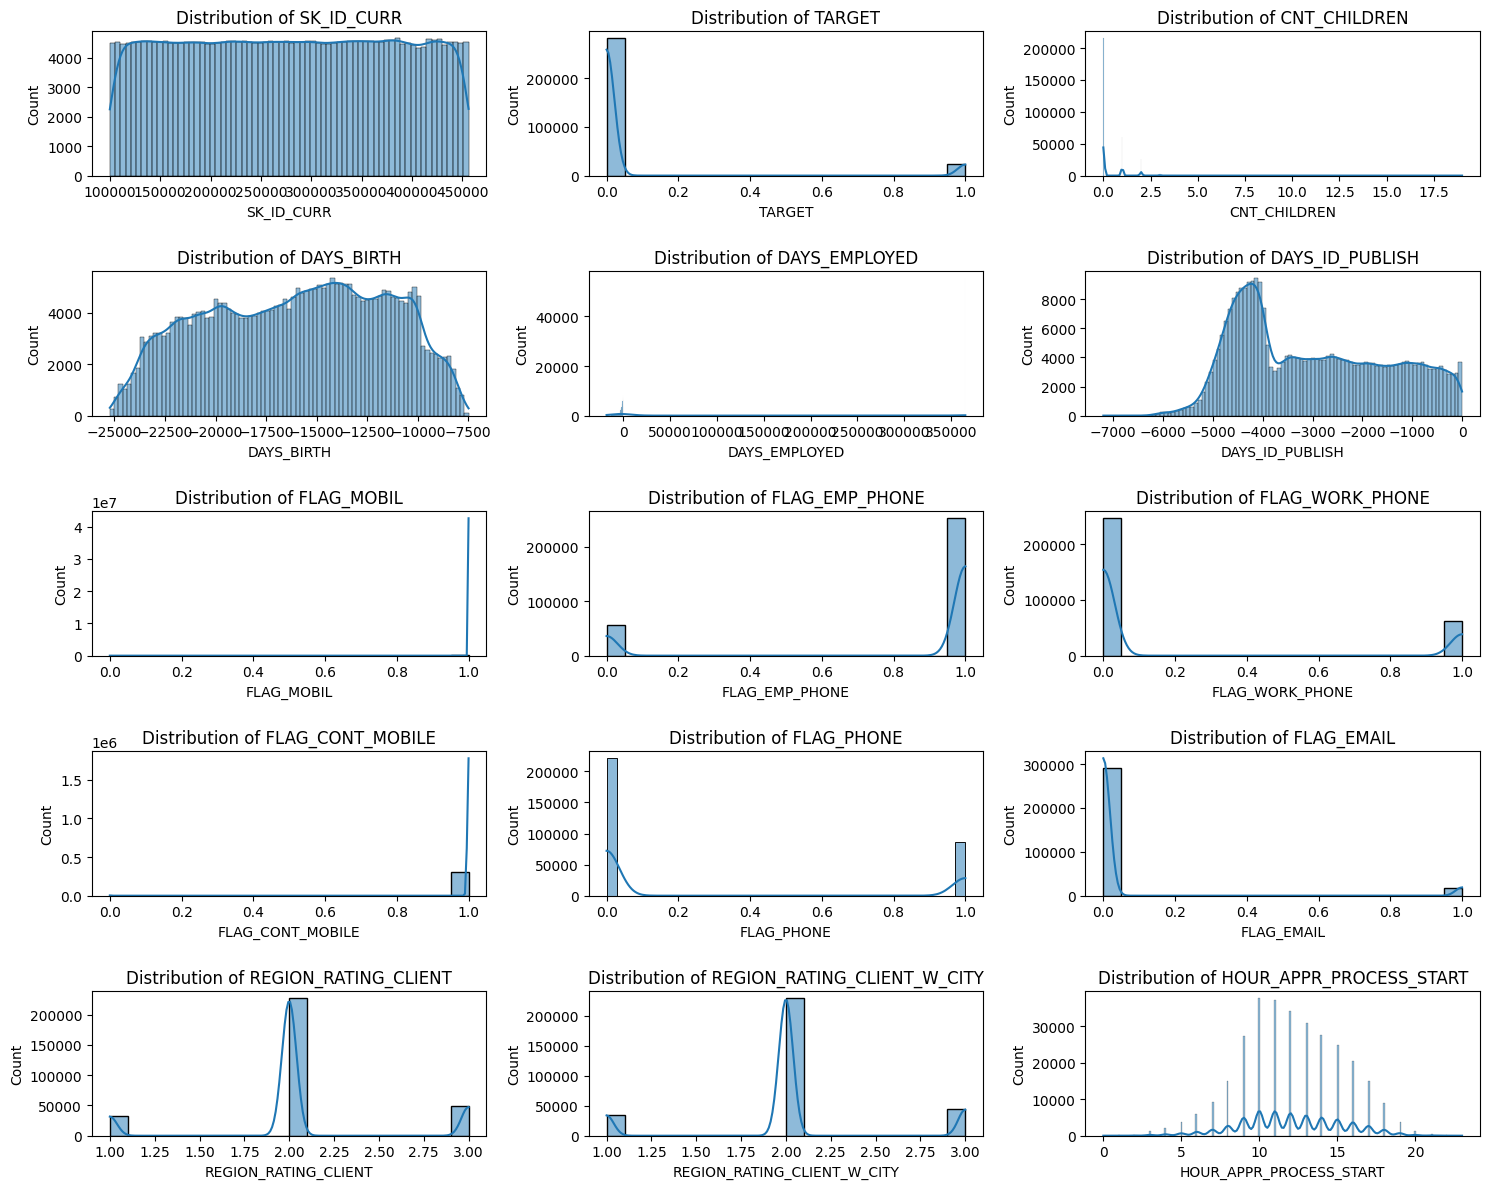

In [150]:
# Plot distributions for numeric columns (split into manageable chunks)

num_cols=list(df_new.columns[df_new.dtypes==np.int64])+list(df_new.columns[df_new.dtypes==np.float64])
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 12)) 
axes = axes.flatten()
for i, col in enumerate(num_cols[0:15]):
    sns.histplot(df_new[col], kde=True, ax=axes[i])  
    axes[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

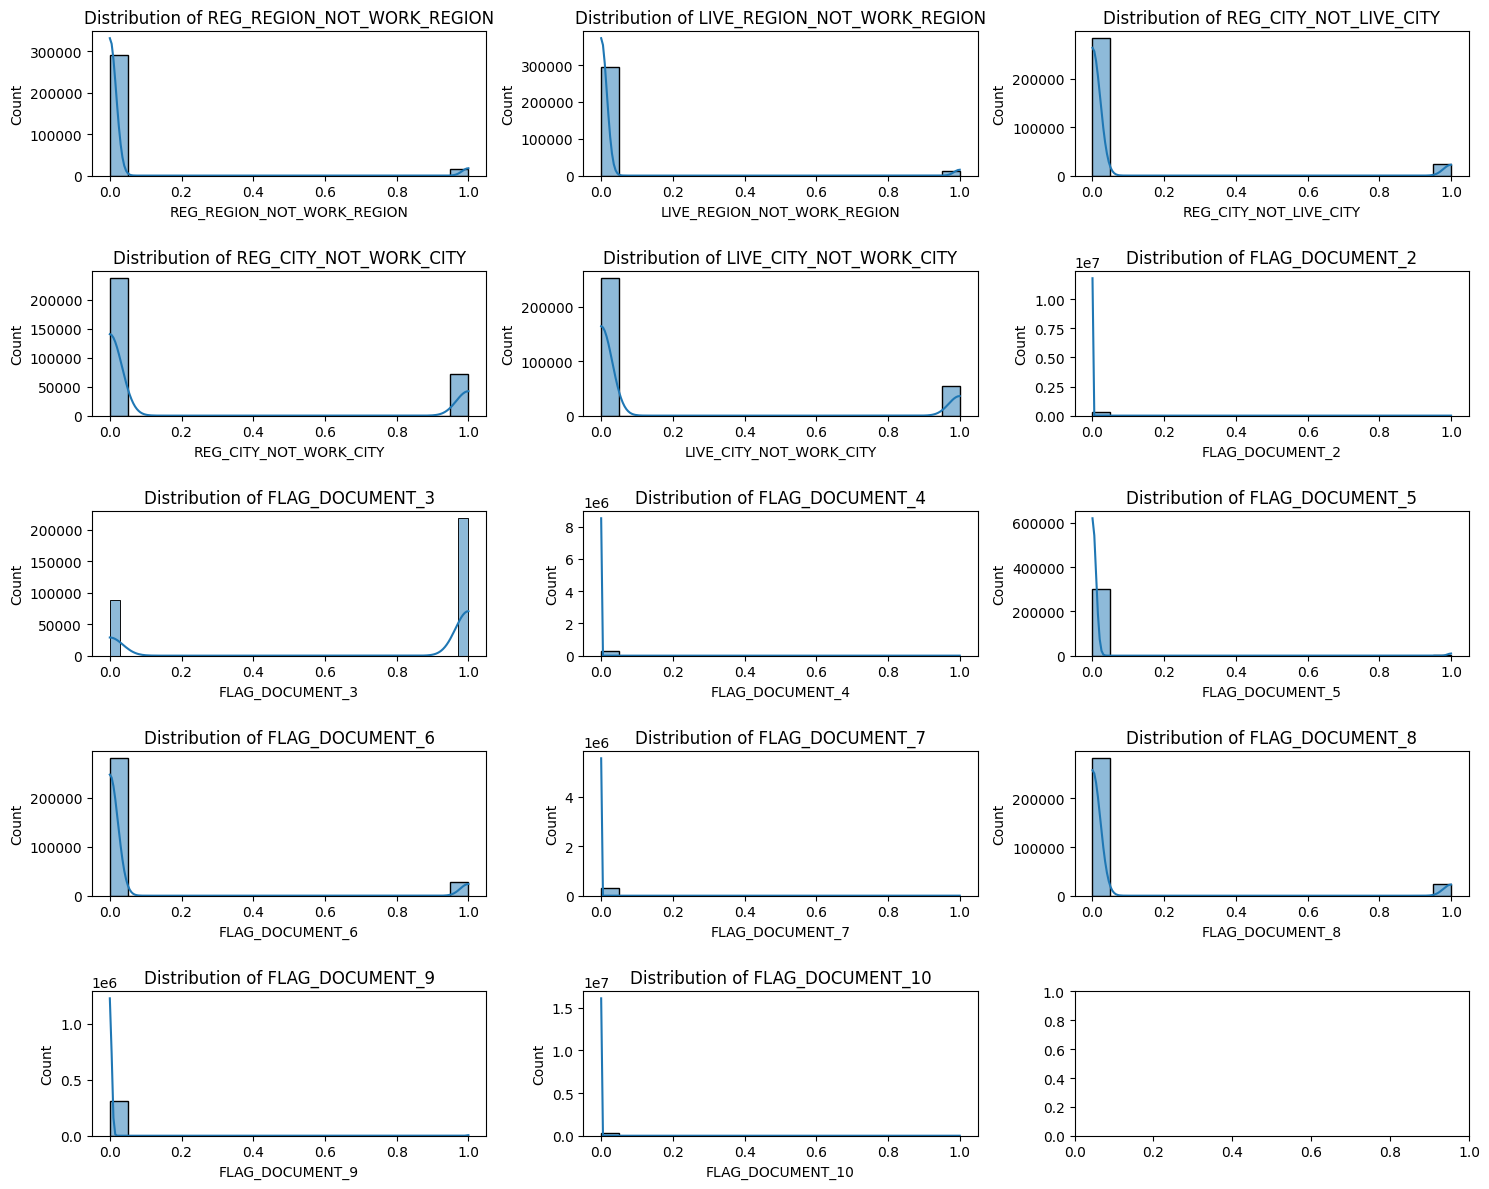

In [151]:
num_cols=list(df_new.columns[df_new.dtypes==np.int64])+list(df_new.columns[df_new.dtypes==np.float64])
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 12)) 
axes = axes.flatten()
for i, col in enumerate(num_cols[16:30]):
    sns.histplot(df_new[col], kde=True, ax=axes[i])  
    axes[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

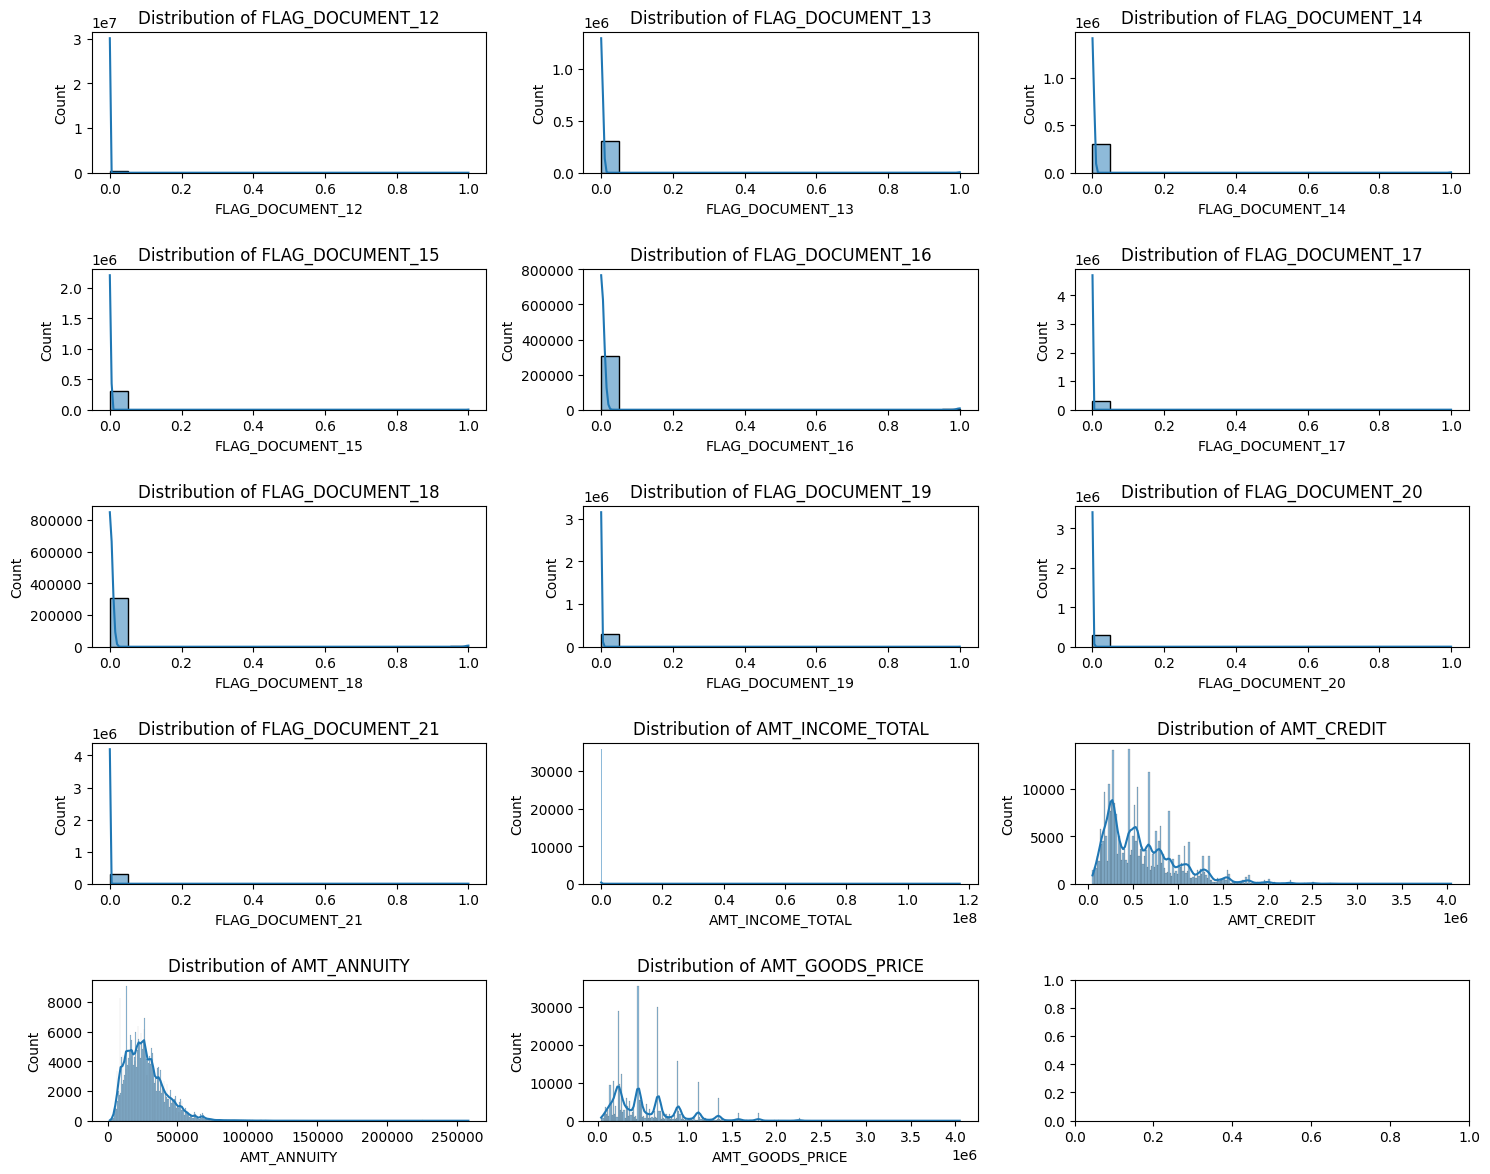

In [152]:
num_cols=list(df_new.columns[df_new.dtypes==np.int64])+list(df_new.columns[df_new.dtypes==np.float64])
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 12)) 
axes = axes.flatten()
for i, col in enumerate(num_cols[31:45]):
    sns.histplot(df_new[col], kde=True, ax=axes[i])  
    axes[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

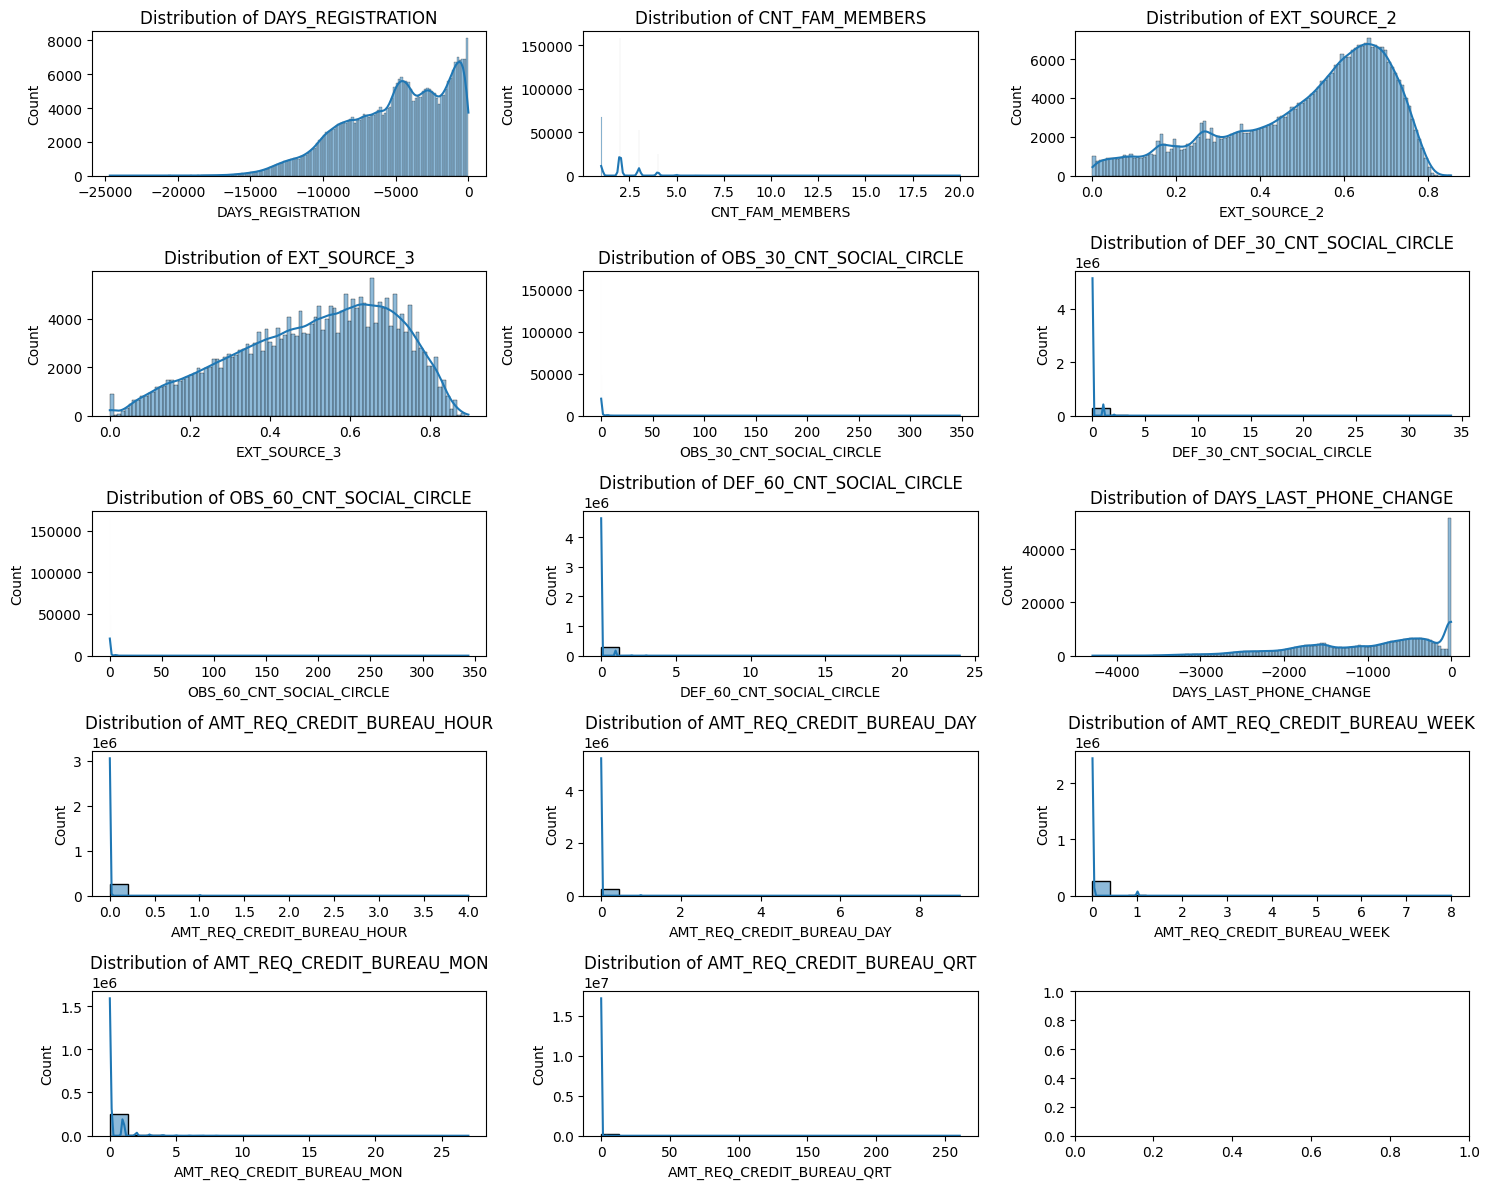

In [153]:
num_cols=list(df_new.columns[df_new.dtypes==np.int64])+list(df_new.columns[df_new.dtypes==np.float64])
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 12)) 
axes = axes.flatten()
for i, col in enumerate(num_cols[46:60]):
    sns.histplot(df_new[col], kde=True, ax=axes[i])  
    axes[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

As we are applying **logistic regression** at the end, it's feasible to send least skewed data to the model. 

Also, for filling the missing values with median, normal distribution is preferred. 

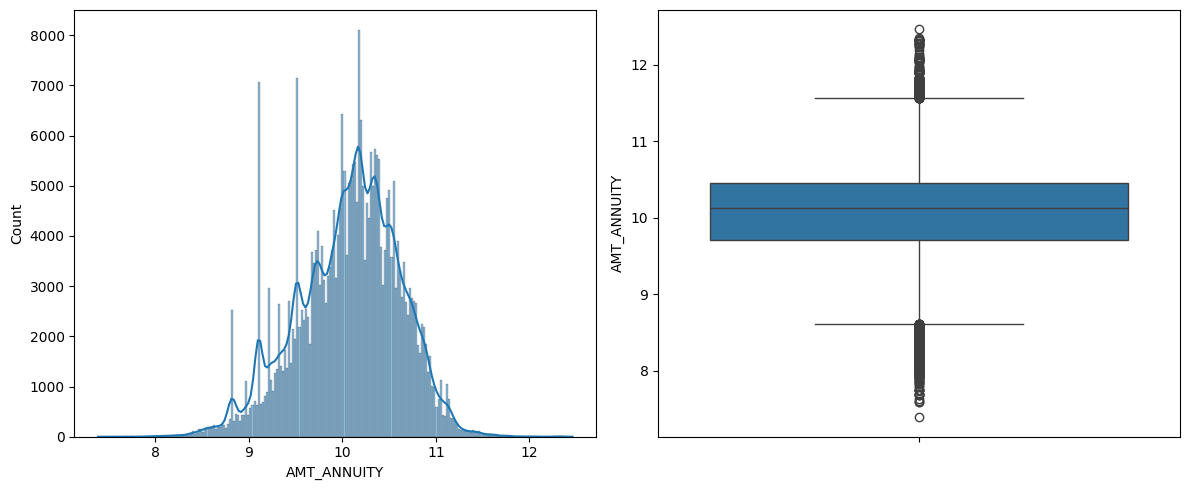

In [154]:
# Log transformation and outlier treatment for "AMT_ANNUITY"

trans_df = df_new.copy()
trans_df['AMT_ANNUITY']=np.log1p(trans_df["AMT_ANNUITY"])
# Plotting the distplot and boxplot side by side
plt.figure(figsize=(12, 5))

# Subplot 1: Distribution plot
plt.subplot(1, 2, 1)
sns.histplot(trans_df['AMT_ANNUITY'], kde=True)

# Subplot 2: Box plot
plt.subplot(1, 2, 2)
sns.boxplot(trans_df['AMT_ANNUITY'])

plt.tight_layout()
plt.show()

# Outlier detection:

Inter Quartile Range (IQR) is a good method to remove outlier from a near normal distribution data. In the given data, we have applied IQR in all columns by applying transformations to make them nearly normal

(307511,)
Lower Limit: 8.604290783673136, Upper Limit: 11.559861133131143
(307511, 73)


<Axes: xlabel='AMT_ANNUITY', ylabel='Density'>

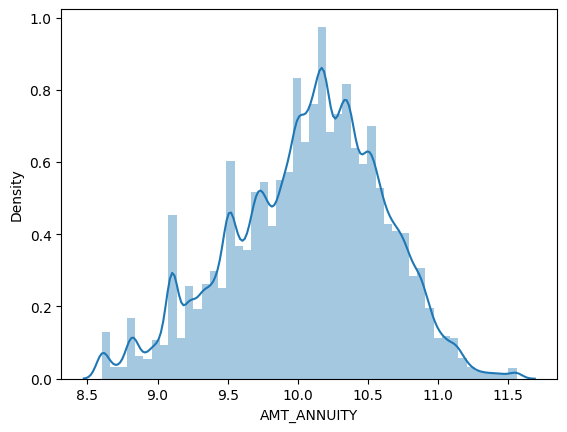

In [155]:
# Calculate the 25th and 75th percentiles
p25 = trans_df['AMT_ANNUITY'].quantile(0.25)
p75 = trans_df['AMT_ANNUITY'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
iqr = p75 - p25

# Calculate the lower and upper limits for outlier detection
lower_limit = p25 - 1.5 * iqr
upper_limit = p75 + 1.5 * iqr

# Print the shape of the original DataFrame and the limits
print(trans_df['AMT_ANNUITY'].shape)
print(f"Lower Limit: {lower_limit}, Upper Limit: {upper_limit}")

# Filter the DataFrame to exclude outliers
trans_df['AMT_ANNUITY'] = trans_df['AMT_ANNUITY'].clip(lower=lower_limit, upper=upper_limit)

# Print the filtered DataFrame
print(trans_df.shape)  # Shape of the filtered DataFrame
sns.distplot(trans_df['AMT_ANNUITY'])


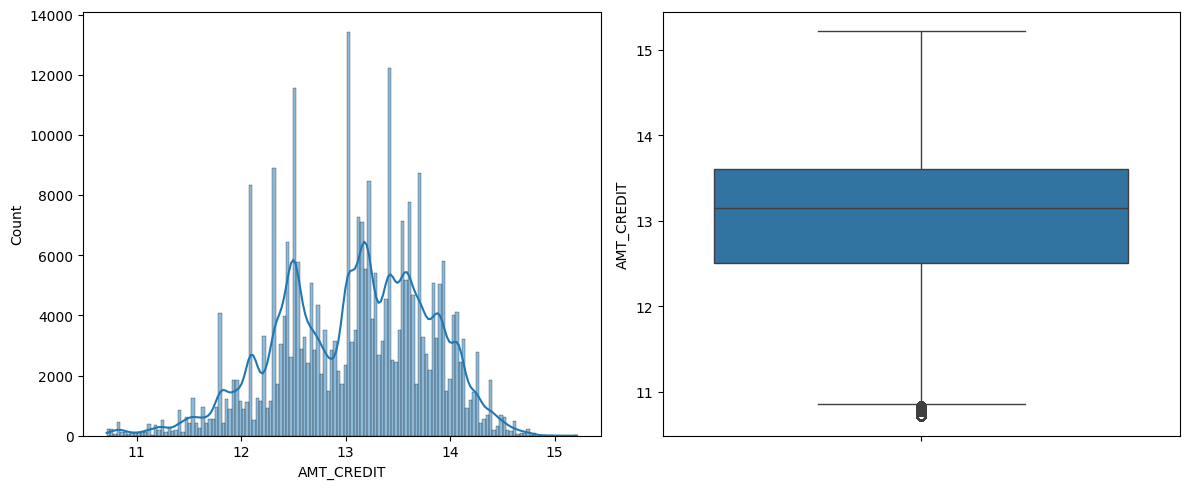

In [156]:
# Repeat similar transformations for other columns, e.g., "AMT_CREDIT"

trans_df_1 = df_new.copy()
trans_df_1['AMT_CREDIT']=np.log1p(trans_df_1['AMT_CREDIT'])
# Plotting the distplot and boxplot side by side
plt.figure(figsize=(12, 5))

# Subplot 1: Distribution plot
plt.subplot(1, 2, 1)
sns.histplot(trans_df_1['AMT_CREDIT'], kde=True)

# Subplot 2: Box plot
plt.subplot(1, 2, 2)
sns.boxplot(trans_df_1['AMT_CREDIT'])

plt.tight_layout()
plt.show()

(307511,)
Lower Limit: 10.86076829492923, Upper Limit: 15.248535352924236
(307511, 73)


<Axes: xlabel='AMT_CREDIT', ylabel='Density'>

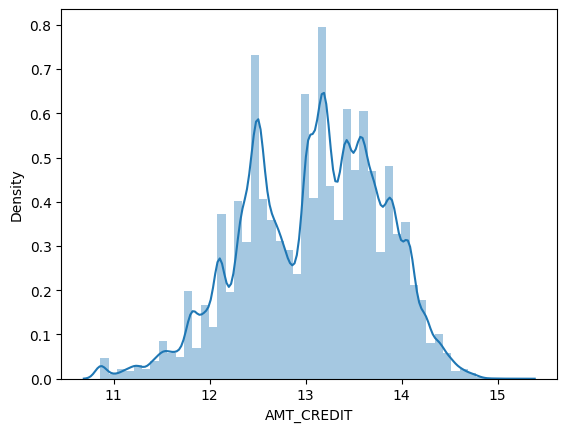

In [157]:
# Calculate the 25th and 75th percentiles
p25_1 = trans_df_1['AMT_CREDIT'].quantile(0.25)
p75_1 = trans_df_1['AMT_CREDIT'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
iqr_1 = p75_1 - p25_1

# Calculate the lower and upper limits for outlier detection
lower_limit_1 = p25_1 - 1.5 * iqr_1
upper_limit_1 = p75_1 + 1.5 * iqr_1

# Print the shape of the original DataFrame and the limits
print(trans_df_1['AMT_CREDIT'].shape)
print(f"Lower Limit: {lower_limit_1}, Upper Limit: {upper_limit_1}")

# Filter the DataFrame to exclude outliers
trans_df_1['AMT_CREDIT'] = trans_df_1['AMT_CREDIT'].clip(lower=lower_limit_1, upper=upper_limit_1)

# Print the filtered DataFrame
print(trans_df_1.shape)  # Shape of the filtered DataFrame
sns.distplot(trans_df_1['AMT_CREDIT'])

# there is a huge reduction in the number of rows, so trimming cannot be done


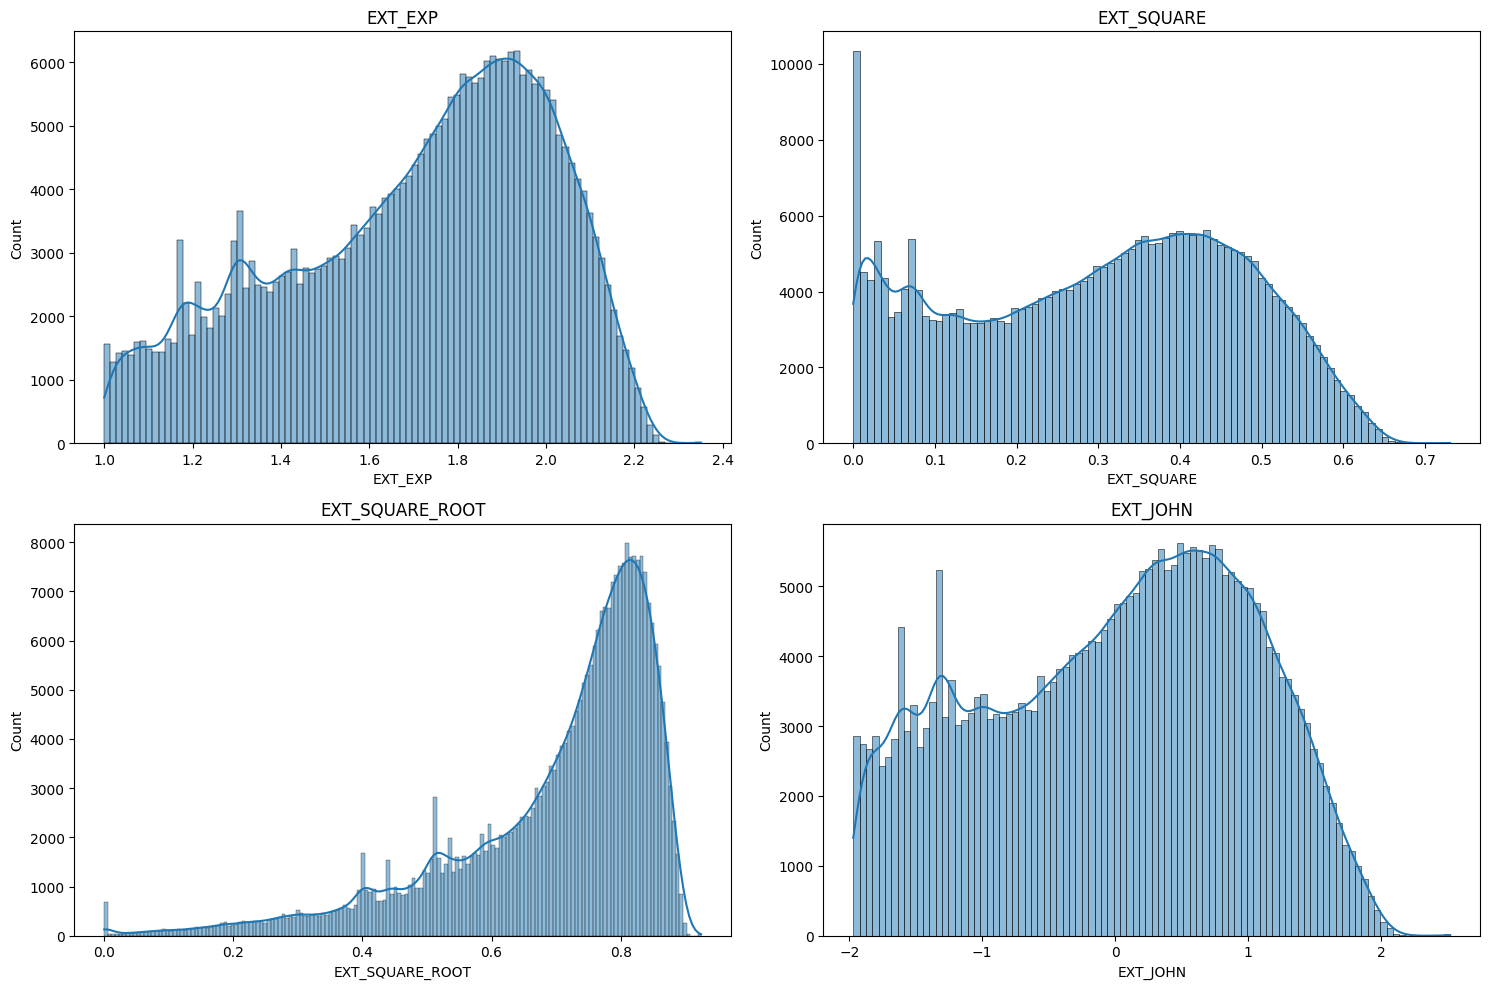

In [158]:
# applied different transformations on EXT_SOURCE_2 column.
trans_df_2 = df_new.copy()
trans_df_2['EXT_EXP'] = np.exp(trans_df_2['EXT_SOURCE_2']) 
trans_df_2['EXT_SQUARE'] = trans_df_2['EXT_SOURCE_2'] ** 2 
trans_df_2['EXT_SQUARE_ROOT'] = trans_df_2['EXT_SOURCE_2'].apply(lambda x: x**0.5 if x >= 0 else 0)  
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
trans_df_2['EXT_JOHN'] = pt.fit_transform(trans_df_2[['EXT_SOURCE_2']])
columns = ['EXT_EXP','EXT_SQUARE','EXT_SQUARE_ROOT','EXT_JOHN']
plt.figure(figsize=(15, 10))
for i, cols in enumerate(columns):
    plt.subplot(2,2,i + 1) 
    sns.histplot(trans_df_2[cols], kde=True)
    plt.title(cols)

plt.tight_layout()
plt.show()

Used **yeo-johnson** transformation to make the data less skewed as to apply IQR

(307511,)
Lower Limit: -3.239365079758393, Upper Limit: 3.222781372236753
(307511,)


<Axes: xlabel='EXT_JOHN', ylabel='Density'>

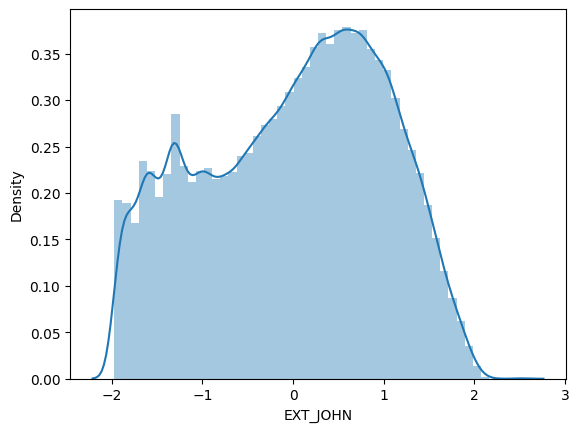

In [159]:
# Calculate the 25th and 75th percentiles
p25_1 = trans_df_2['EXT_JOHN'].quantile(0.25)
p75_1 = trans_df_2['EXT_JOHN'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
iqr_1 = p75_1 - p25_1

# Calculate the lower and upper limits for outlier detection
lower_limit_1 = p25_1 - 1.5 * iqr_1
upper_limit_1 = p75_1 + 1.5 * iqr_1

# Print the shape of the original DataFrame and the limits
print(trans_df_2['EXT_JOHN'].shape)
print(f"Lower Limit: {lower_limit_1}, Upper Limit: {upper_limit_1}")

# Filter the DataFrame to exclude outliers
trans_df_2['EXT_JOHN'] = trans_df_2['EXT_JOHN'].clip(lower=lower_limit_1, upper=upper_limit_1)

# Print the filtered DataFrame
print(trans_df_2['EXT_JOHN'].shape)  # Shape of the filtered DataFrame
sns.distplot(trans_df_2['EXT_JOHN'])

In [19]:
df_new['AMT_ANNUITY']=trans_df['AMT_ANNUITY']
df_new['AMT_CREDIT']=trans_df_1['AMT_CREDIT']
df_new['EXT_SOURCE_2']=trans_df_2['EXT_JOHN']

In [20]:
df_new.isna().mean()*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

In [21]:
# imputing - filling missing values to get maximum efficiency

<Axes: >

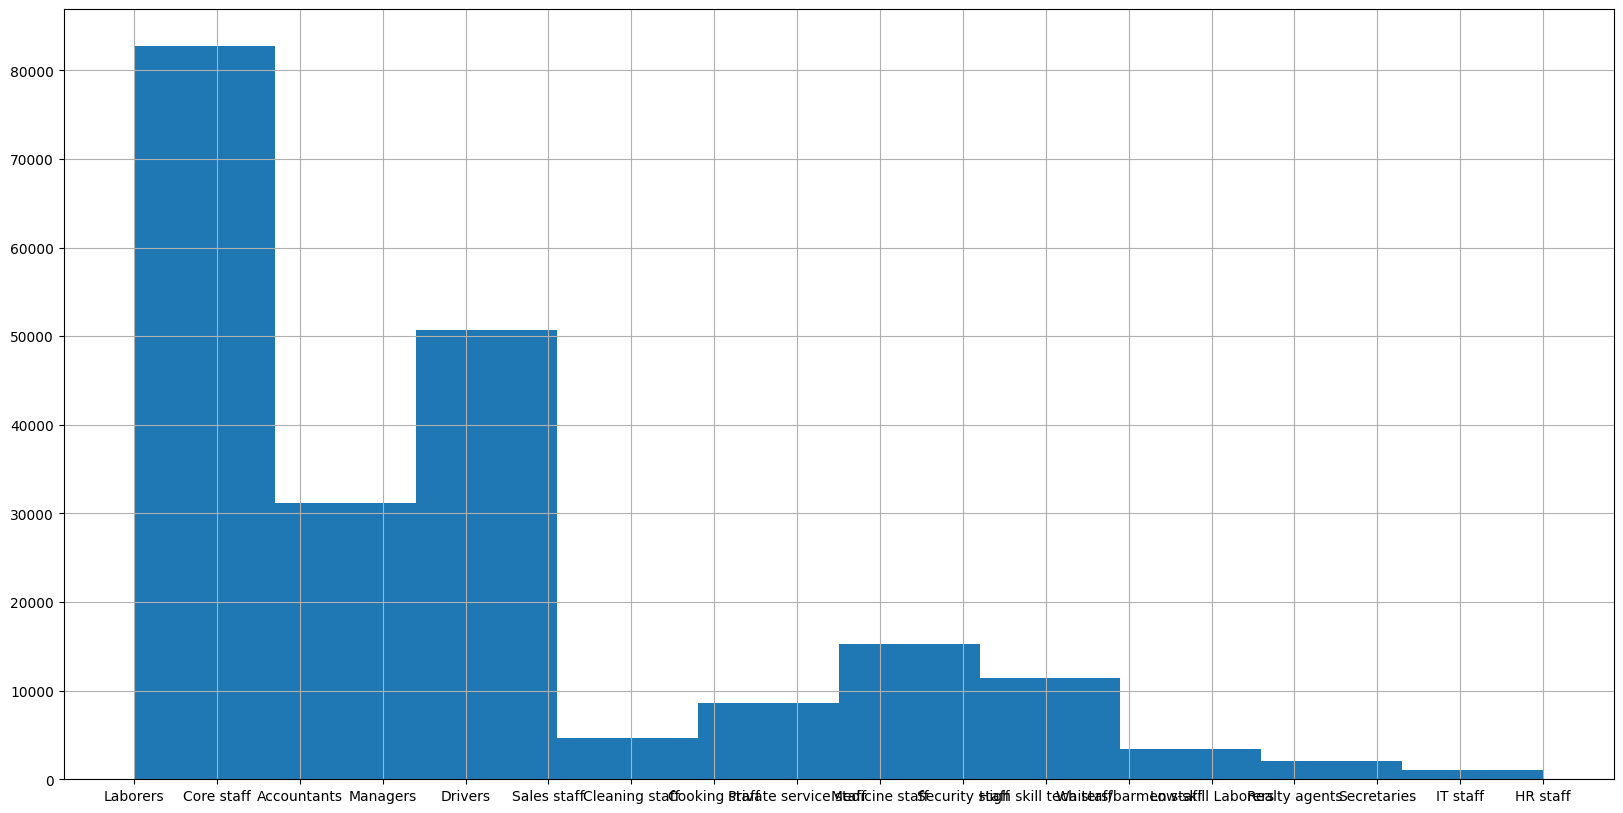

In [22]:
# how much data was blank ?
df_new.OCCUPATION_TYPE.isnull().mean()*100 
df_new.OCCUPATION_TYPE.hist(figsize=[20,10])

In [23]:
#as many values are missing, we fill it by "other"
df_new.OCCUPATION_TYPE.fillna("Others",inplace=True)
df_new.OCCUPATION_TYPE.isnull().mean()*100

0.0

Filled the column "OCCUPATION_TYPE" with Others where there were missing values. This method will help to smoothly interpret data after filling Null values.

In [24]:
df_new.EXT_SOURCE_3.isna().mean()*100

19.825307062186393

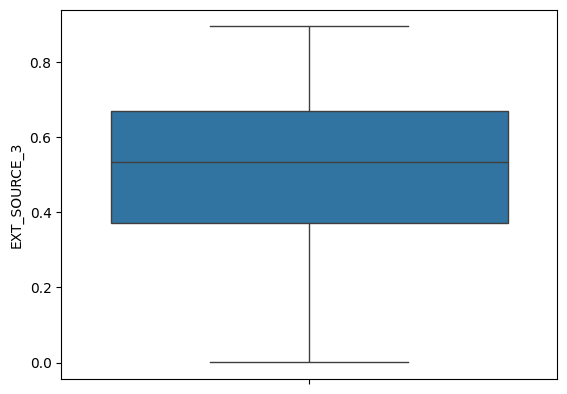

In [25]:
# We need to fill the values with mean or median so to get the value we use box plot
sns.boxplot(df_new.EXT_SOURCE_3)
plt.show()

<Axes: xlabel='EXT_SOURCE_3', ylabel='Density'>

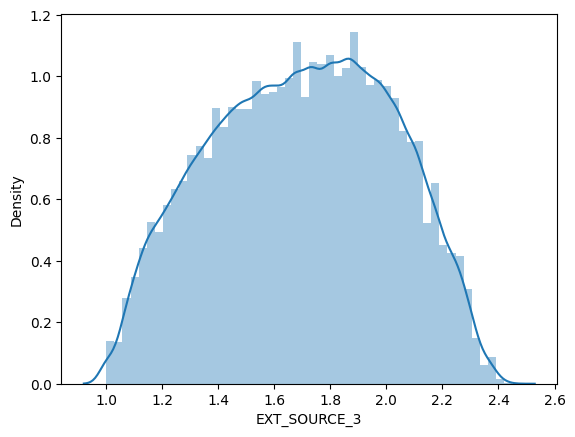

In [26]:
df_new.EXT_SOURCE_3=np.exp(df_new.EXT_SOURCE_3)
sns.distplot(df_new.EXT_SOURCE_3)

In [27]:
df_new['EXT_SOURCE_3'].isna()

0         False
1          True
2         False
3          True
4          True
          ...  
307506     True
307507     True
307508    False
307509    False
307510    False
Name: EXT_SOURCE_3, Length: 307511, dtype: bool

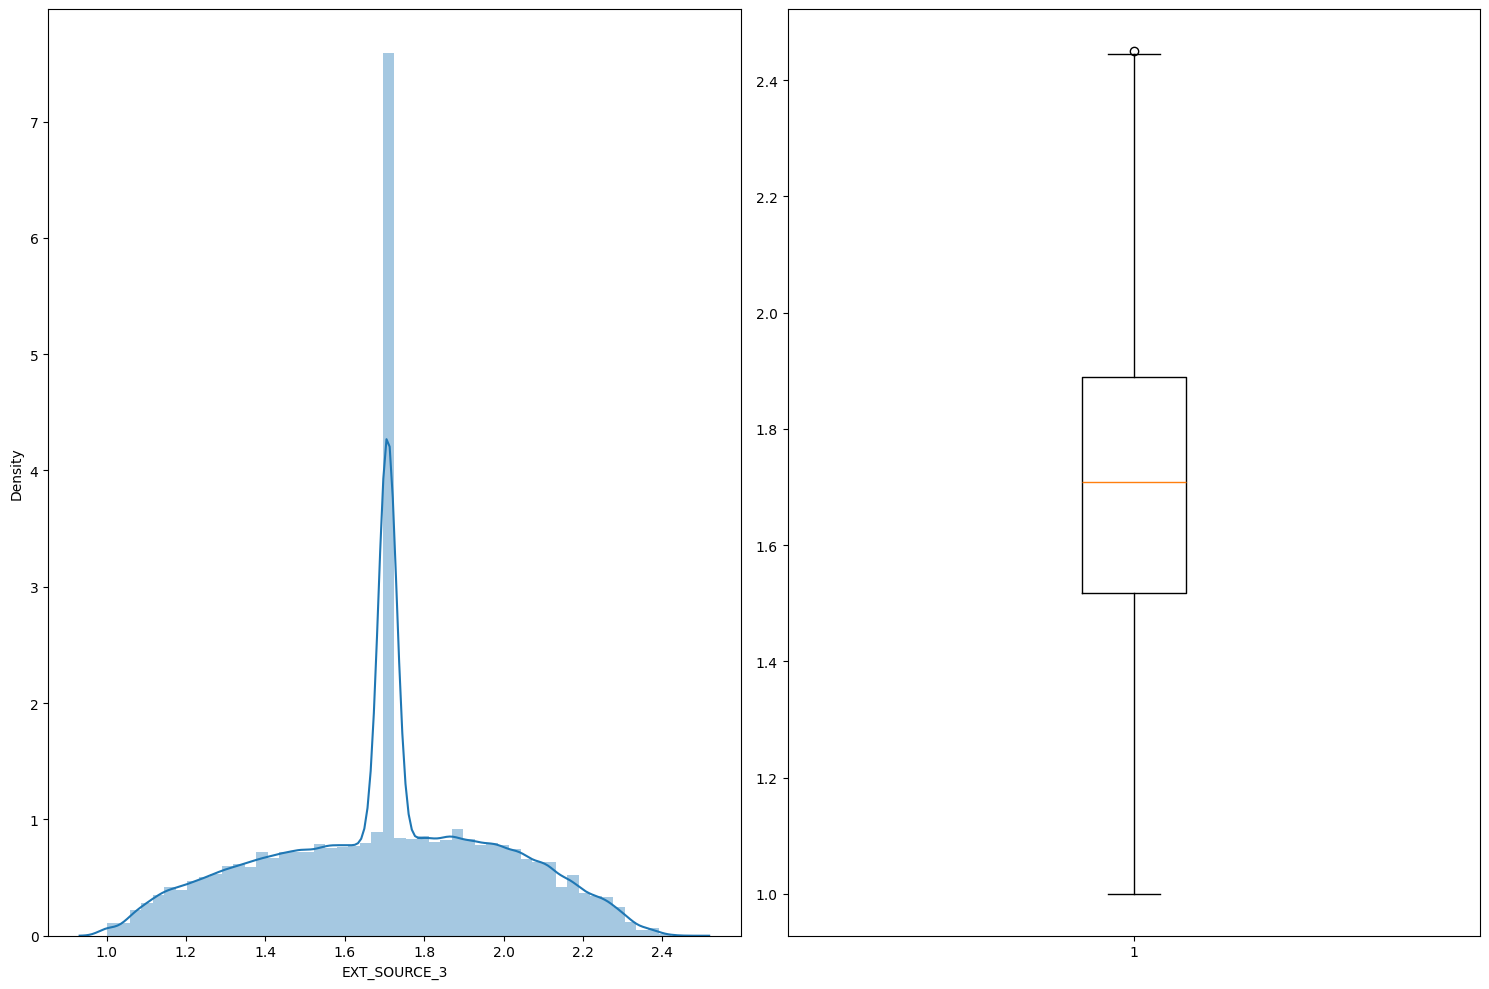

In [ ]:
df_new.EXT_SOURCE_3.fillna(df_new.EXT_SOURCE_3.median(),inplace=True)
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.distplot(df_new['EXT_SOURCE_3'],kde=True)
plt.subplot(1,2,2)
plt.boxplot(df_new.EXT_SOURCE_3)
plt.tight_layout()
plt.show()

The curve appear to be hill shaped which is somewhat **"Normal"**. As a result, missing values are filled with median. However, there are a lot of missing values in the data making the density of median extremely high. 

In [29]:
# now few columns having 13 percent null values are left to be filled
df_new.isnull().mean()*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

In [30]:
col=["AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR"]

In [ ]:
# Filling columns with mode 
df_new.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0]

0.0

In [32]:
for colms in col:
    df_new[colms].fillna(df_new[colms].mode()[0],inplace=True)

In [33]:
df_new.isnull().mean()*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000


In [ ]:
# IQR for CNT_FAM_MEMBERS
df_new_cnt = df_new.copy()
pp25=df_new_cnt['CNT_FAM_MEMBERS'].quantile(0.25)
pp75=df_new_cnt['CNT_FAM_MEMBERS'].quantile(0.75)
iqr_cnt = pp75-pp25
lower_limit_cnt = pp25 - 1.5 * iqr_cnt
upper_limit_cnt = pp75 + 1.5 * iqr_cnt
print(df_new_cnt['CNT_FAM_MEMBERS'].shape)
print(f"Lower Limit: {lower_limit}, Upper Limit: {upper_limit}")

df_new_cnt['CNT_FAM_MEMBERS'] = df_new_cnt['CNT_FAM_MEMBERS'].clip(lower=lower_limit_cnt, upper=lower_limit_cnt)

print(df_new_cnt.shape) 


(307511,)
Lower Limit: 8.604290783673136, Upper Limit: 11.559861133131143
(307511, 73)


In [37]:
df_new['CNT_FAM_MEMBERS']=df_new_cnt['CNT_FAM_MEMBERS']
df_new.NAME_TYPE_SUITE.fillna(df_new.NAME_TYPE_SUITE.mode()[0],inplace=True)

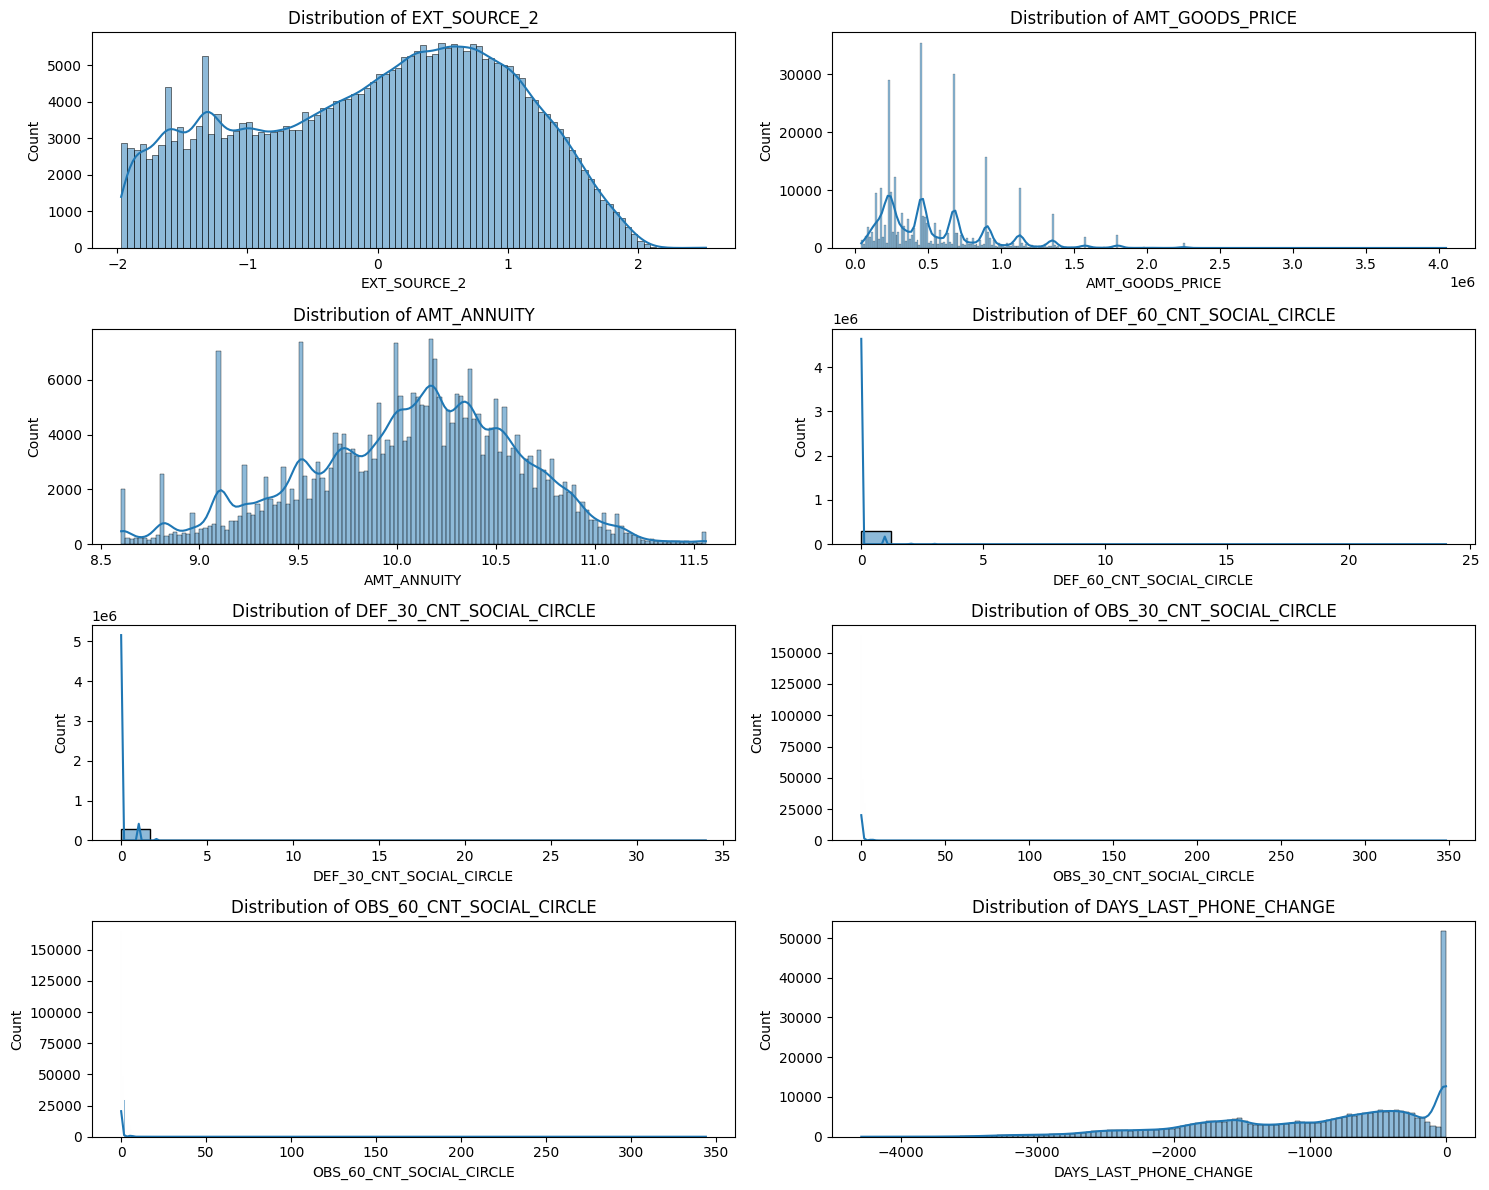

In [38]:
plot_list=['EXT_SOURCE_2','AMT_GOODS_PRICE','AMT_ANNUITY','DEF_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE']
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 12)) 
axes = axes.flatten()
for i, col in enumerate(plot_list):
    sns.histplot(df_new[col], kde=True, ax=axes[i])  
    axes[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

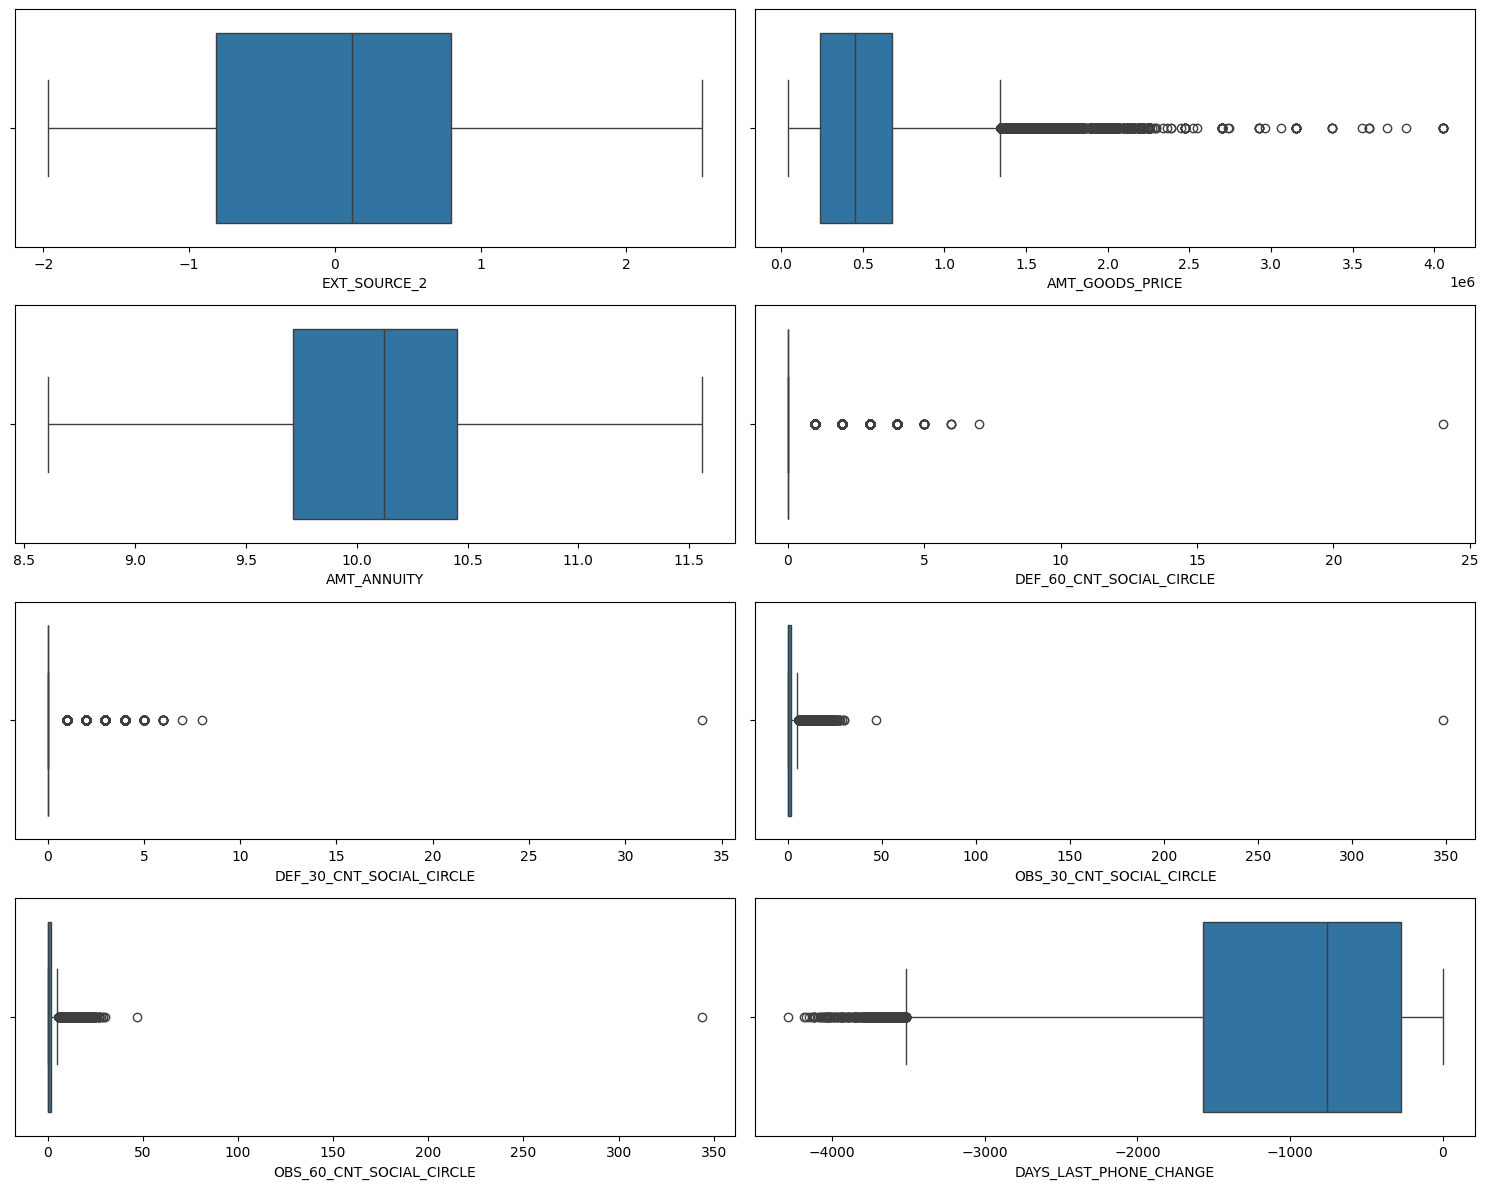

In [39]:
plot_list=['EXT_SOURCE_2','AMT_GOODS_PRICE','AMT_ANNUITY','DEF_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE']
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 12)) 
axes = axes.flatten()
for i, col in enumerate(plot_list):
    sns.boxplot(data=df_new, x=col, ax=axes[i])
plt.tight_layout()
plt.show()

In [40]:
trans_df_3=df_new.copy()
plot_list_2=['EXT_SOURCE_2','AMT_GOODS_PRICE','AMT_ANNUITY','DAYS_LAST_PHONE_CHANGE']
for x in plot_list_2:
    pp25_1 = trans_df_3[str(x)].quantile(0.25)
    pp75_1 = trans_df_3[str(x)].quantile(0.75)

    # Calculate the Interquartile Range (IQR)
    iqr_n = pp75_1 - pp25_1

    # Calculate the lower and upper limits for outlier detection
    lower_limit_n = pp25_1 - 1.5 * iqr_n
    upper_limit_n = pp75_1 + 1.5 * iqr_n

    # Print the shape of the original DataFrame and the limits
    print(trans_df_3[str(x)].shape)
    print(f"Lower Limit: {lower_limit_n}, Upper Limit: {upper_limit_n}")

    # Filter the DataFrame to exclude outliers
    trans_df_3[str(x)] = trans_df_3[str(x)].clip(lower=lower_limit_n, upper=upper_limit_n)

# Print the filtered DataFrame
print(trans_df_3.shape)  

(307511,)
Lower Limit: -3.239365079758393, Upper Limit: 3.222781372236753
(307511,)
Lower Limit: -423000.0, Upper Limit: 1341000.0
(307511,)
Lower Limit: 8.604290783673136, Upper Limit: 11.559861133131143
(307511,)
Lower Limit: -3514.0, Upper Limit: 1670.0
(307511, 73)


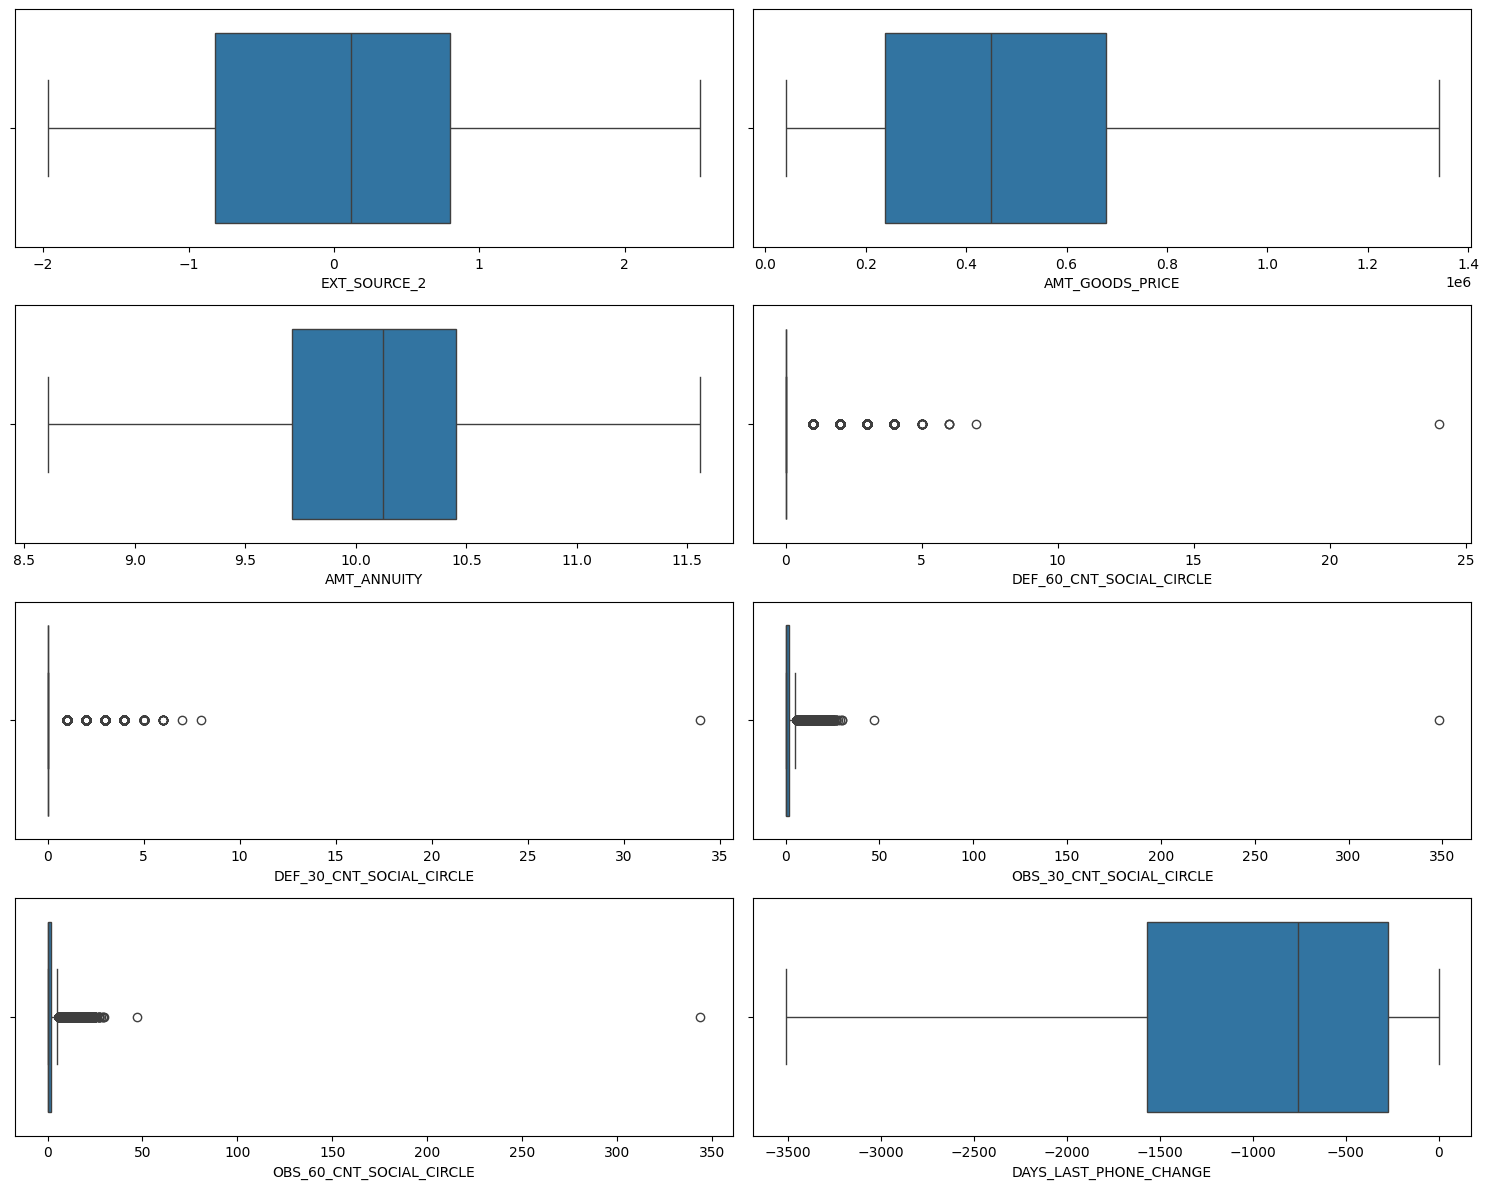

In [41]:
plot_list=['EXT_SOURCE_2','AMT_GOODS_PRICE','AMT_ANNUITY','DEF_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE']
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 12)) 
axes = axes.flatten()
for i, col in enumerate(plot_list):
    sns.boxplot(data=trans_df_3, x=col, ax=axes[i])
plt.tight_layout()
plt.show()

In [42]:
for col in plot_list:
    df_new[col]=trans_df_3[col]

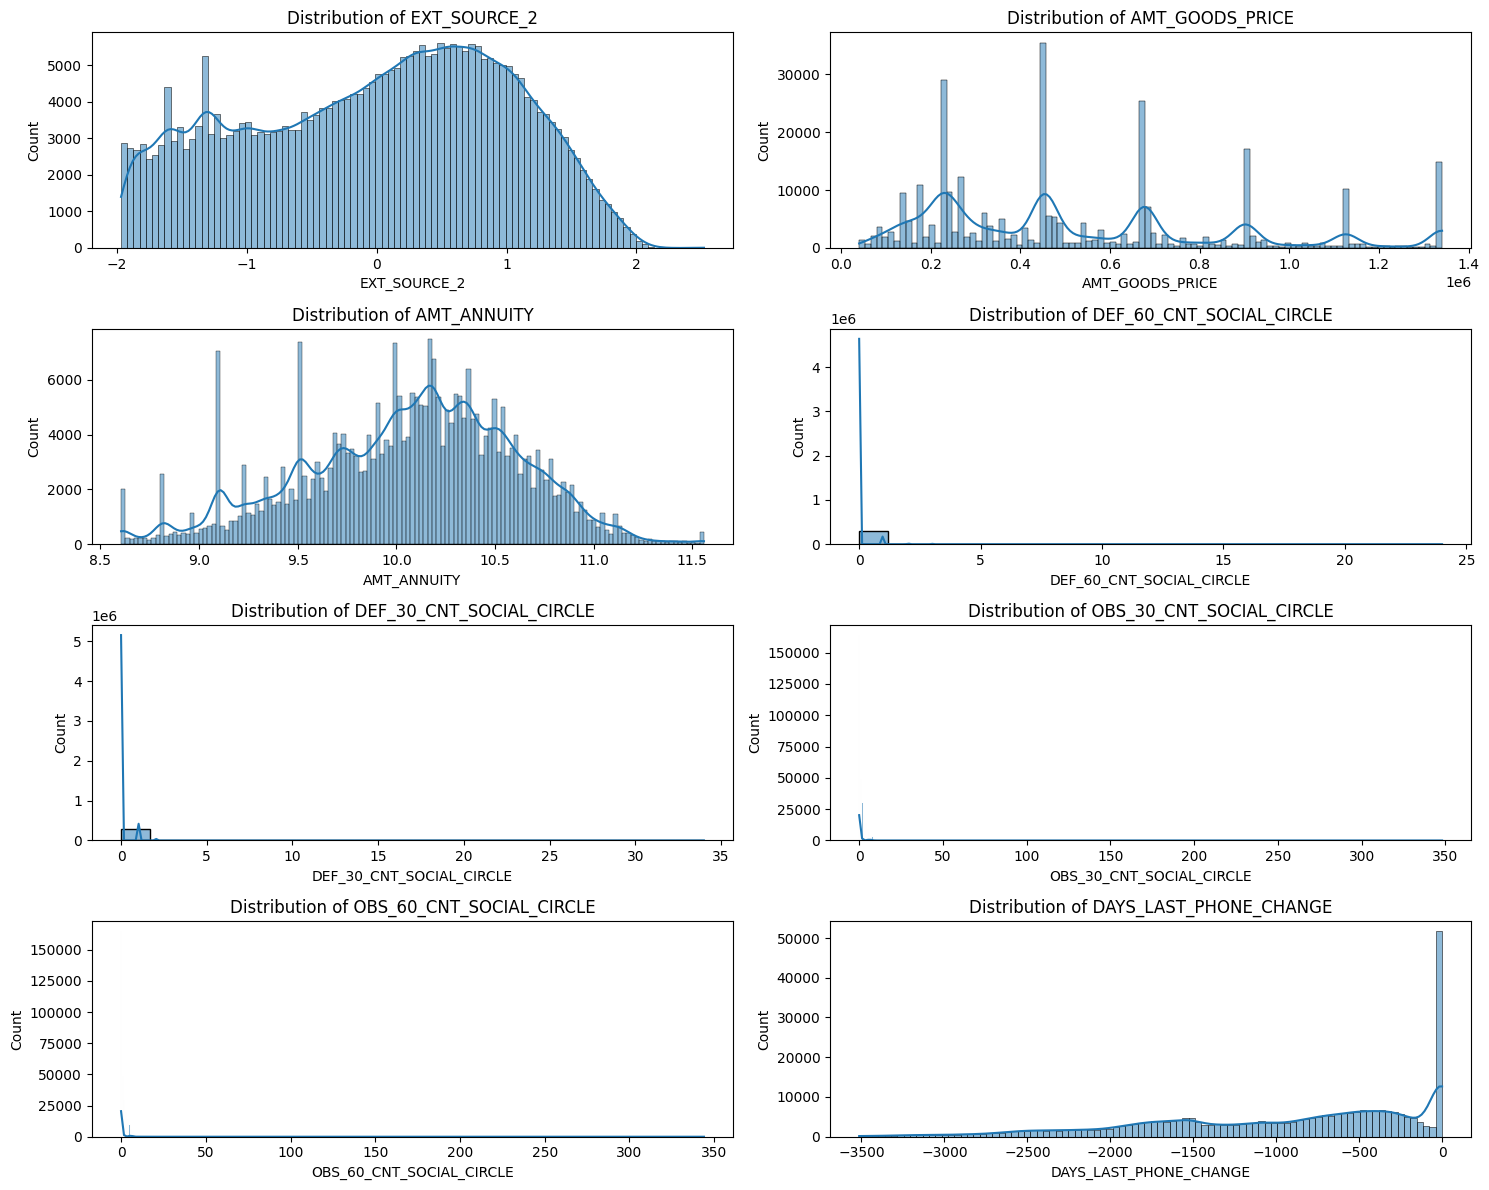

In [43]:
plot_list=['EXT_SOURCE_2','AMT_GOODS_PRICE','AMT_ANNUITY','DEF_60_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE']
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 12)) 
axes = axes.flatten()
for i, col in enumerate(plot_list):
    sns.histplot(df_new[col], kde=True, ax=axes[i])  
    axes[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [ ]:
# Final list of Null Values

df_new.isnull().mean()*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.000000
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000


In [45]:
# Binning of continuous data to improve the efficiency of the program
# BINNING days into years 
df_new["YEARS_BIRTH"]=df_new.DAYS_BIRTH.apply(lambda x:abs(int(x//365)))
df_new["YEARS_EMPLOYED"]=df_new.DAYS_EMPLOYED.apply(lambda x:abs(int(x//365)))
df_new["YEARS_REGISTRATION"]=df_new.DAYS_REGISTRATION.apply(lambda x:abs(int(x//365)))
df_new["YEARS_ID_PUBLISH"]=df_new.DAYS_ID_PUBLISH.apply(lambda x:abs(int(x//365)))

In [46]:
print(df_new['AMT_CREDIT'].max(),df_new['AMT_CREDIT'].min())

15.214227685996272 10.86076829492923


In [47]:
# BINNING AMT_CREDIT into categories
df_new.AMT_CREDIT.value_counts()

AMT_CREDIT
13.017005    9709
13.422469    8877
12.323860    8162
12.100718    7342
12.506181    7241
             ... 
13.329352       1
13.981258       1
14.344150       1
14.289521       1
14.145628       1
Name: count, Length: 5597, dtype: int64

In [48]:
df_new["AMT_CREDIT_Category"]=pd.cut(df_new.AMT_CREDIT,[10,11,12,13,14,15],labels=["Very low","Low","Medium","High","Very High"])
df_new.AMT_CREDIT_Category.value_counts(normalize=True)*100

AMT_CREDIT_Category
High         50.415134
Medium       33.238371
Very High     9.032134
Low           6.842151
Very low      0.472209
Name: proportion, dtype: float64

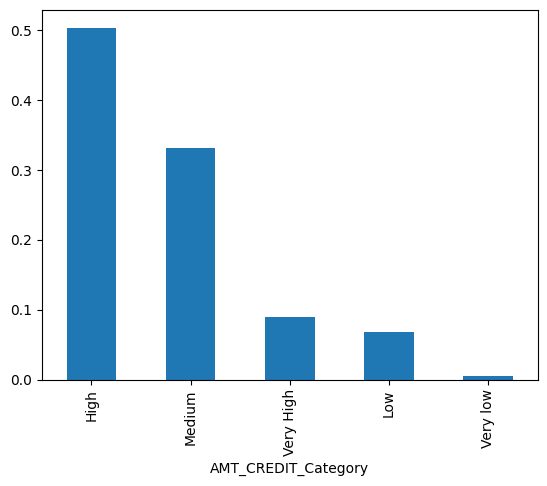

In [49]:
df_new.AMT_CREDIT_Category.value_counts(normalize=True).plot.bar()
plt.show()

In [51]:
# Binning YEARS BIRTH
df_new.YEARS_BIRTH.value_counts(normalize=True)*100

YEARS_BIRTH
39    2.889002
38    2.861036
40    2.850955
37    2.804127
41    2.802501
28    2.759251
42    2.749495
32    2.722504
44    2.702993
43    2.667547
29    2.592102
33    2.571941
45    2.542348
31    2.541698
36    2.535194
34    2.508853
30    2.495195
35    2.480562
55    2.460075
54    2.421702
47    2.371948
46    2.343981
48    2.284146
49    2.266911
57    2.222360
53    2.202848
58    2.201872
52    2.173906
50    2.158622
60    2.157646
56    2.154394
51    2.104315
59    2.034074
61    2.024968
63    1.790830
62    1.762539
64    1.689370
65    1.667257
27    1.482549
26    1.357350
24    1.318977
25    1.270849
66    1.008419
23    0.953787
67    0.678350
68    0.664041
22    0.410067
69    0.279014
70    0.005203
21    0.000325
Name: proportion, dtype: float64

In [ ]:
# Splitting the AGE column
df_new["AGE"]=pd.cut(df_new.YEARS_BIRTH,[0,25,45,65,85],labels=["below 25","25-45","45-65","65-85"])
df_new.AGE.value_counts(normalize=True)*100
df_new.AGE.value_counts(normalize=True)

AGE
25-45       0.509172
45-65       0.424938
below 25    0.039540
65-85       0.026350
Name: proportion, dtype: float64

In [54]:
df_new.TARGET.value_counts(normalize=True)*100

TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64

In [55]:
# Univarient Analysis
cat_cols=list(df_new.columns[df_new.dtypes==np.object_])
num_cols=list(df_new.columns[df_new.dtypes==np.int64])+list(df_new.columns[df_new.dtypes==np.float64])

In [56]:
cat_cols

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [57]:
len(num_cols)

65

NAME_CONTRACT_TYPE
Cash loans         0.904787
Revolving loans    0.095213
Name: proportion, dtype: float64


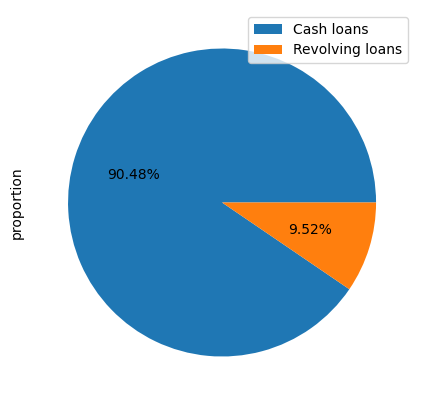

CODE_GENDER
F      0.658344
M      0.341643
XNA    0.000013
Name: proportion, dtype: float64


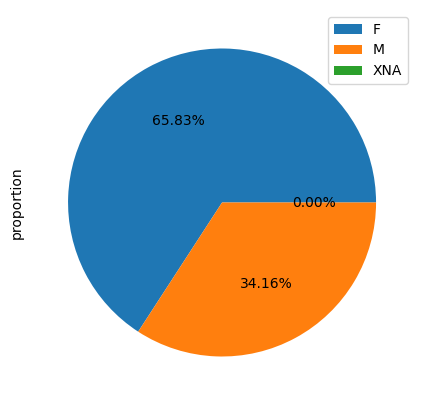

FLAG_OWN_CAR
N    0.659892
Y    0.340108
Name: proportion, dtype: float64


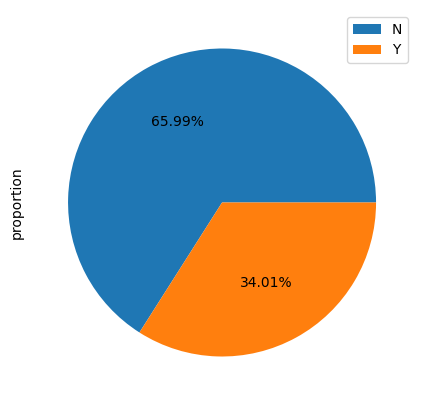

FLAG_OWN_REALTY
Y    0.693673
N    0.306327
Name: proportion, dtype: float64


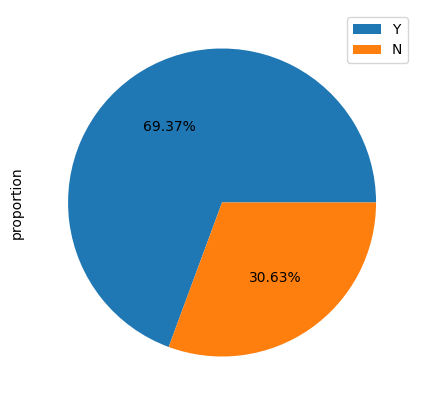

NAME_TYPE_SUITE
Unaccompanied      0.812387
Family             0.130561
Spouse, partner    0.036974
Children           0.010624
Other_B            0.005756
Other_A            0.002816
Group of people    0.000881
Name: proportion, dtype: float64


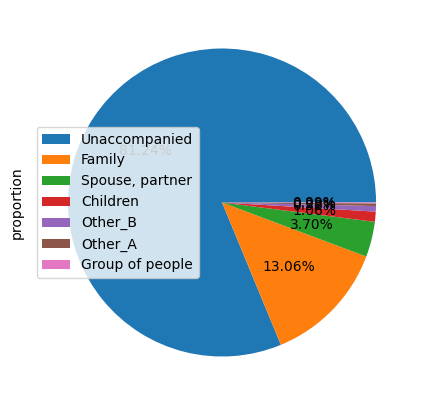

NAME_INCOME_TYPE
Working                 0.516320
Commercial associate    0.232892
Pensioner               0.180033
State servant           0.070576
Unemployed              0.000072
Student                 0.000059
Businessman             0.000033
Maternity leave         0.000016
Name: proportion, dtype: float64


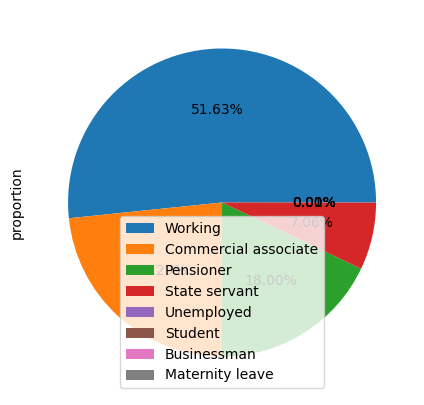

NAME_EDUCATION_TYPE
Secondary / secondary special    0.710189
Higher education                 0.243448
Incomplete higher                0.033420
Lower secondary                  0.012409
Academic degree                  0.000533
Name: proportion, dtype: float64


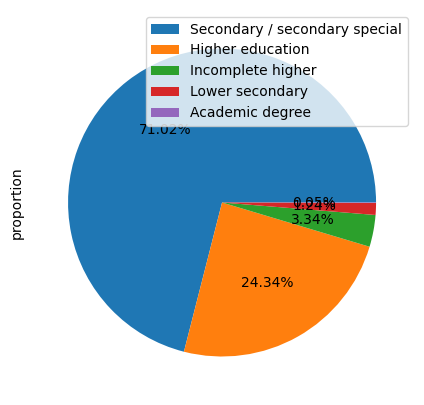

NAME_FAMILY_STATUS
Married                 0.638780
Single / not married    0.147780
Civil marriage          0.096826
Separated               0.064290
Widow                   0.052317
Unknown                 0.000007
Name: proportion, dtype: float64


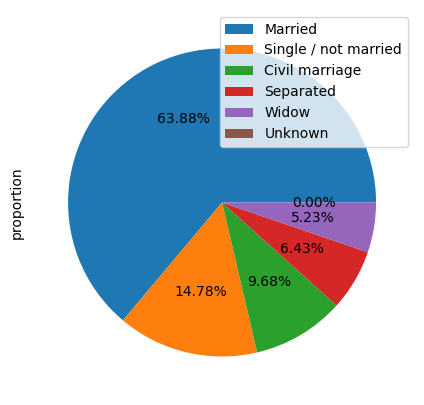

NAME_HOUSING_TYPE
House / apartment      0.887344
With parents           0.048258
Municipal apartment    0.036366
Rented apartment       0.015873
Office apartment       0.008510
Co-op apartment        0.003649
Name: proportion, dtype: float64


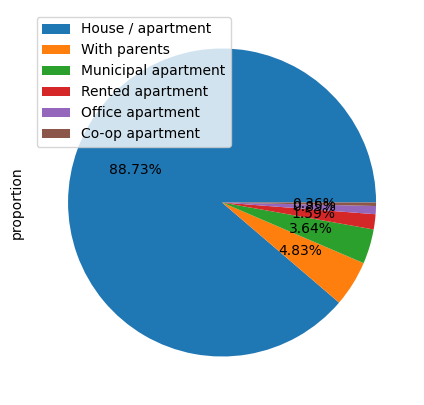

OCCUPATION_TYPE
Others                   0.313455
Laborers                 0.179460
Sales staff              0.104393
Core staff               0.089655
Managers                 0.069497
Drivers                  0.060495
High skill tech staff    0.037007
Accountants              0.031911
Medicine staff           0.027762
Security staff           0.021856
Cooking staff            0.019336
Cleaning staff           0.015131
Private service staff    0.008624
Low-skill Laborers       0.006806
Waiters/barmen staff     0.004384
Secretaries              0.004244
Realty agents            0.002442
HR staff                 0.001831
IT staff                 0.001711
Name: proportion, dtype: float64


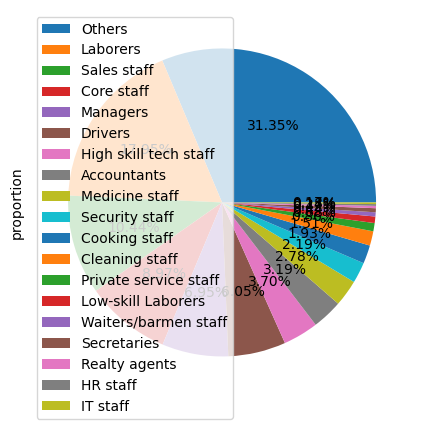

WEEKDAY_APPR_PROCESS_START
TUESDAY      0.175282
WEDNESDAY    0.168885
MONDAY       0.164918
THURSDAY     0.164518
FRIDAY       0.163695
SATURDAY     0.110084
SUNDAY       0.052619
Name: proportion, dtype: float64


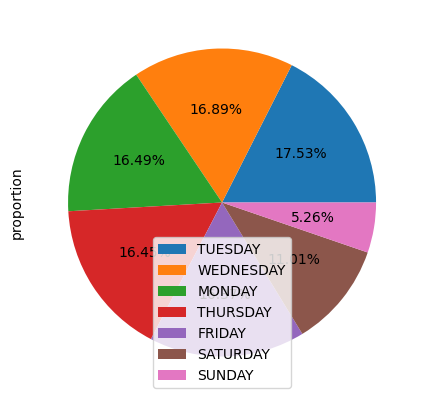

ORGANIZATION_TYPE
Business Entity Type 3    0.221104
XNA                       0.180072
Self-employed             0.124913
Other                     0.054252
Medicine                  0.036399
Business Entity Type 2    0.034317
Government                0.033833
School                    0.028919
Trade: type 7             0.025466
Kindergarten              0.022373
Construction              0.021856
Business Entity Type 1    0.019459
Transport: type 4         0.017554
Trade: type 3             0.011356
Industry: type 9          0.010952
Industry: type 3          0.010660
Security                  0.010559
Housing                   0.009619
Industry: type 11         0.008793
Military                  0.008566
Bank                      0.008153
Agriculture               0.007980
Police                    0.007613
Transport: type 2         0.007167
Postal                    0.007014
Security Ministries       0.006419
Trade: type 2             0.006179
Restaurant                0.005889
Se

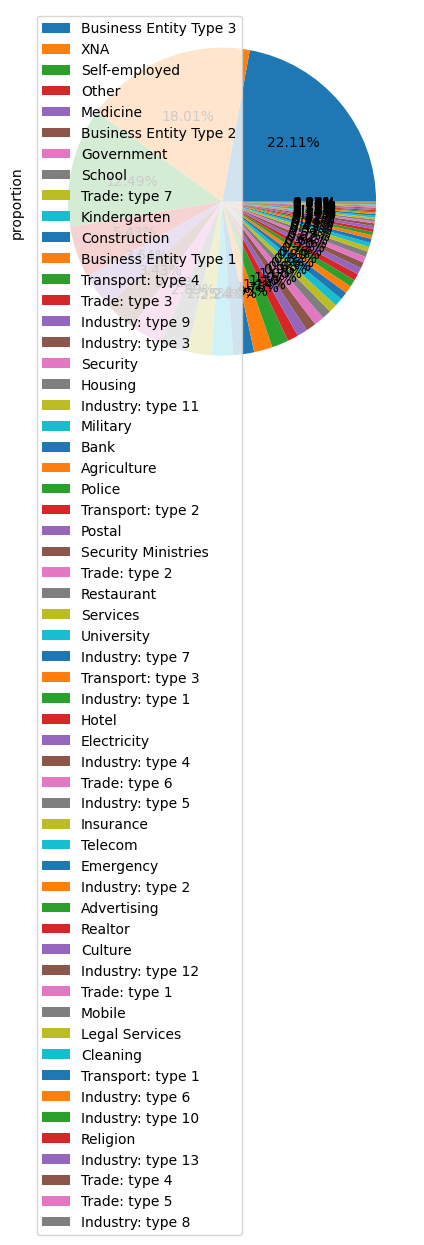

In [58]:
#plot for categorical columns
for cols in cat_cols:
    print(df_new[cols].value_counts(normalize=True))
    plt.figure(figsize=[5,5])
    df_new[cols].value_counts(normalize=True).plot.pie(labeldistance=None,autopct='%1.2f%%')
    plt.legend()
    plt.show()

# Conclusions:
1. Mostly all the data are skewely distributed
2. Most applications are for cash loans
3. Around 66% donot own a car
4. Almost half of the applicants are married
5. Nearly half of them are working people
6. Many of the applicants are labourers 
7. Around 70% have just attained till seconday education

In [59]:
#plot for numerical columns 
num_cols_withflags=[]
num_cols_withoutflags=[]
for col in num_cols:
    if col.startswith("FLAG"):
        num_cols_withflags.append(col)
    else:
        num_cols_withoutflags.append(col)

count    307511.000000
mean     278180.518577
std      102790.175348
min      100002.000000
25%      189145.500000
50%      278202.000000
75%      367142.500000
max      456255.000000
Name: SK_ID_CURR, dtype: float64


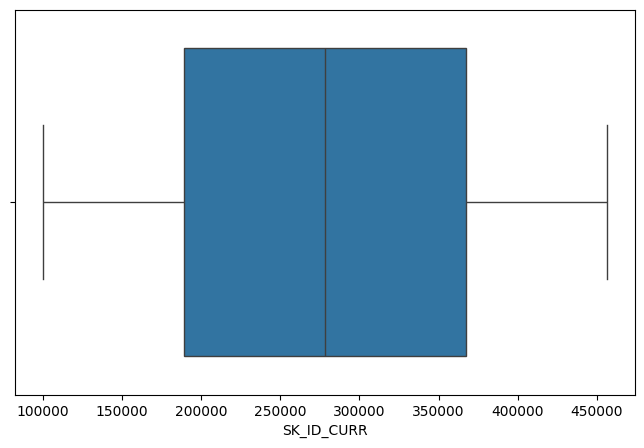

--------------
count    307511.000000
mean          0.080729
std           0.272419
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64


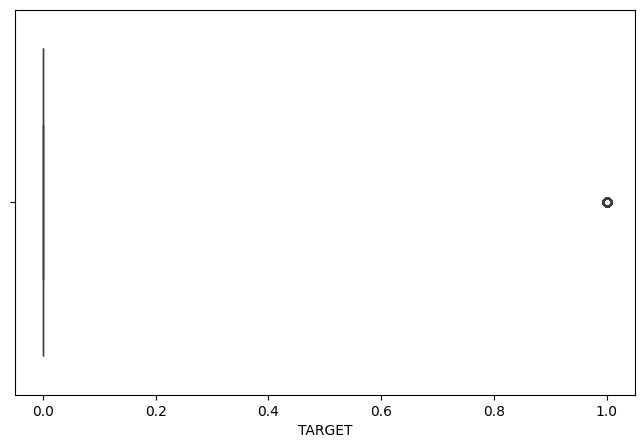

--------------
count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64


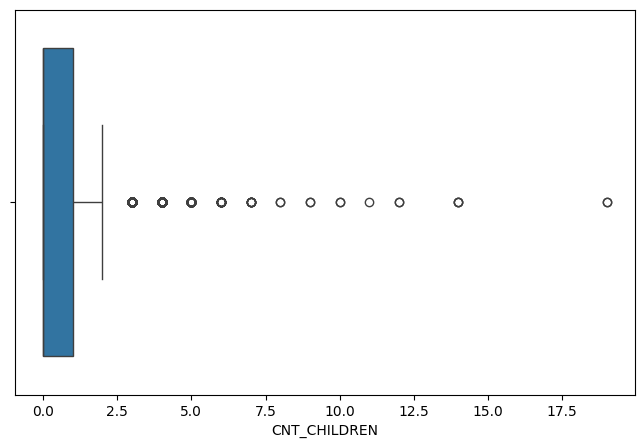

--------------
count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64


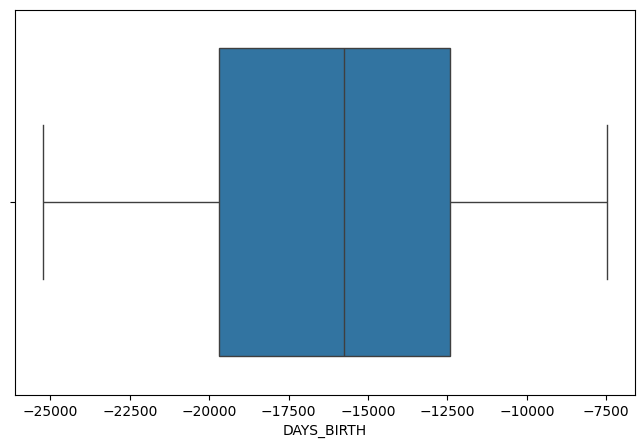

--------------
count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64


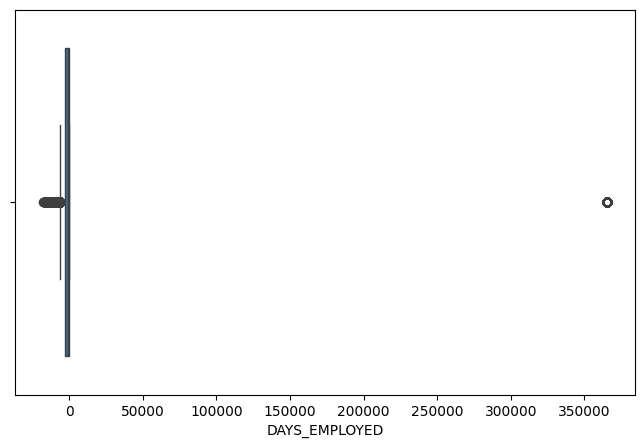

--------------
count    307511.000000
mean      -2994.202373
std        1509.450419
min       -7197.000000
25%       -4299.000000
50%       -3254.000000
75%       -1720.000000
max           0.000000
Name: DAYS_ID_PUBLISH, dtype: float64


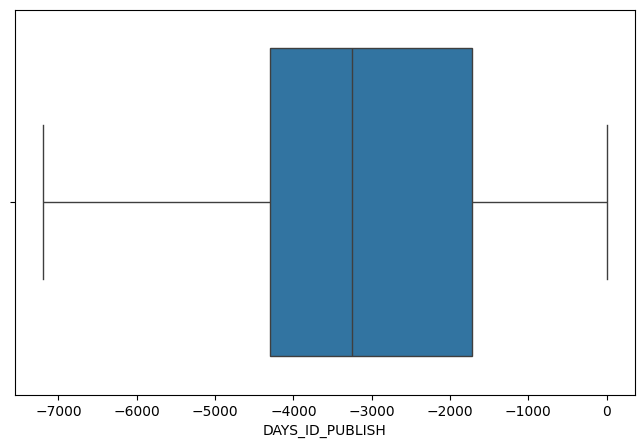

--------------
count    307511.000000
mean          2.052463
std           0.509034
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: REGION_RATING_CLIENT, dtype: float64


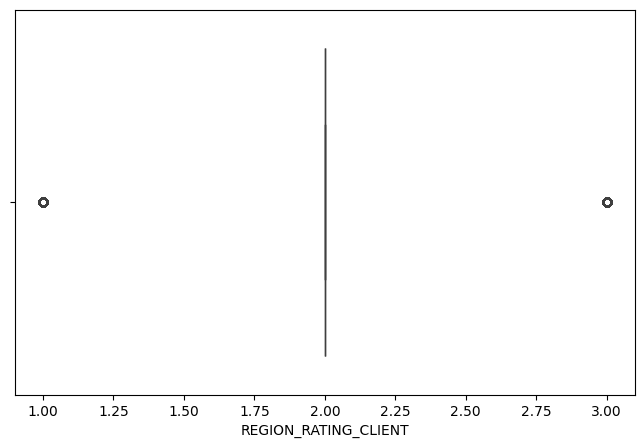

--------------
count    307511.000000
mean          2.031521
std           0.502737
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max           3.000000
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64


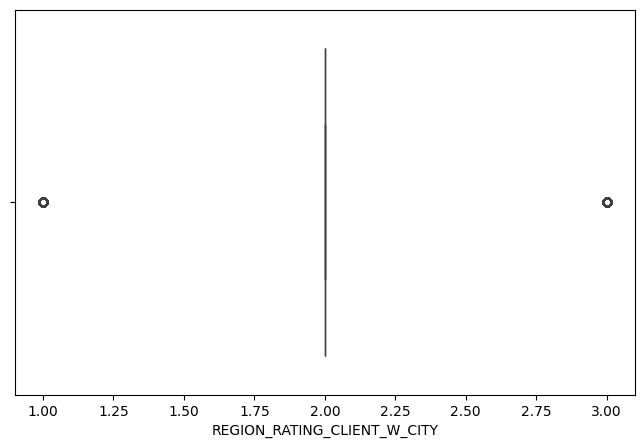

--------------
count    307511.000000
mean         12.063419
std           3.265832
min           0.000000
25%          10.000000
50%          12.000000
75%          14.000000
max          23.000000
Name: HOUR_APPR_PROCESS_START, dtype: float64


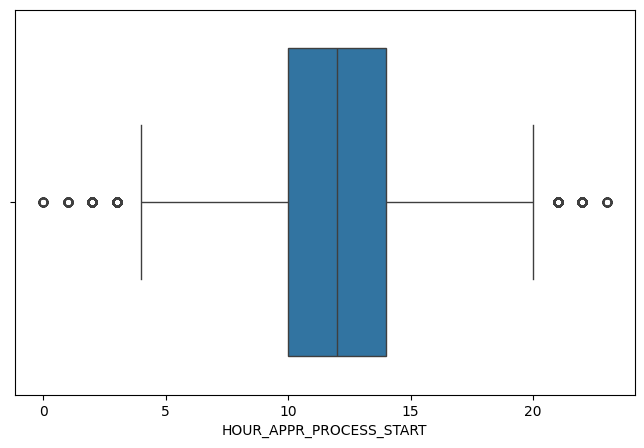

--------------
count    307511.000000
mean          0.015144
std           0.122126
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_REGION_NOT_LIVE_REGION, dtype: float64


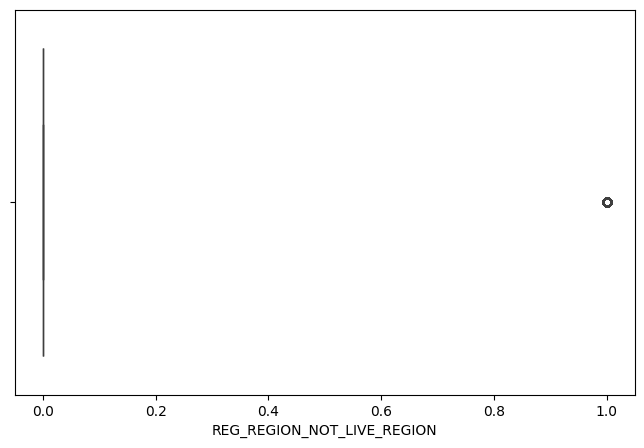

--------------
count    307511.000000
mean          0.050769
std           0.219526
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_REGION_NOT_WORK_REGION, dtype: float64


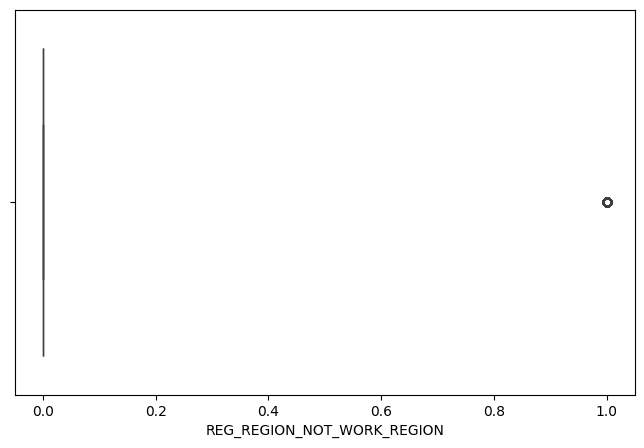

--------------
count    307511.000000
mean          0.040659
std           0.197499
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: LIVE_REGION_NOT_WORK_REGION, dtype: float64


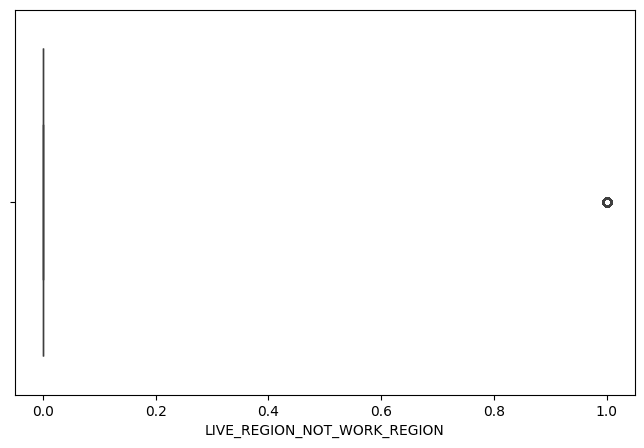

--------------
count    307511.000000
mean          0.078173
std           0.268444
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_CITY_NOT_LIVE_CITY, dtype: float64


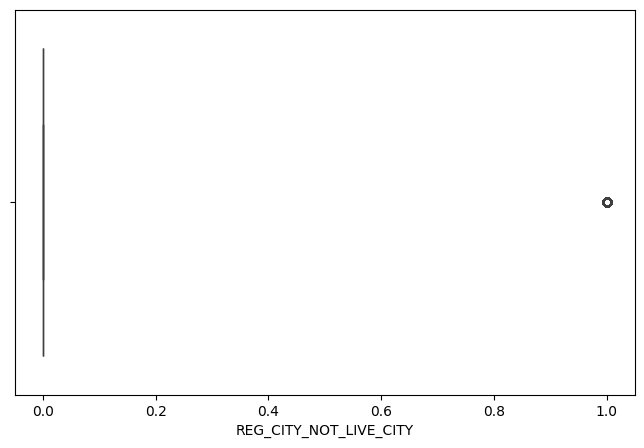

--------------
count    307511.000000
mean          0.230454
std           0.421124
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: REG_CITY_NOT_WORK_CITY, dtype: float64


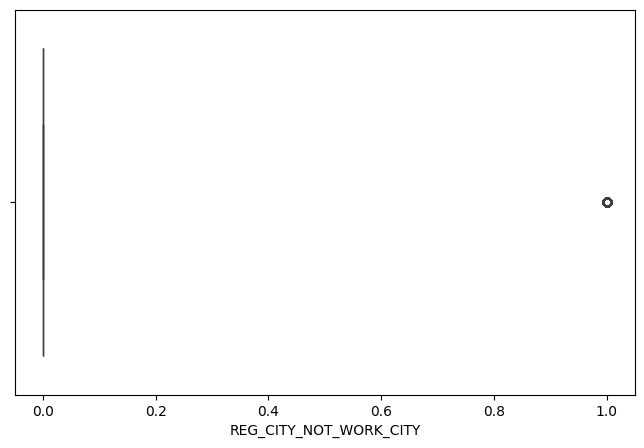

--------------
count    307511.000000
mean          0.179555
std           0.383817
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: LIVE_CITY_NOT_WORK_CITY, dtype: float64


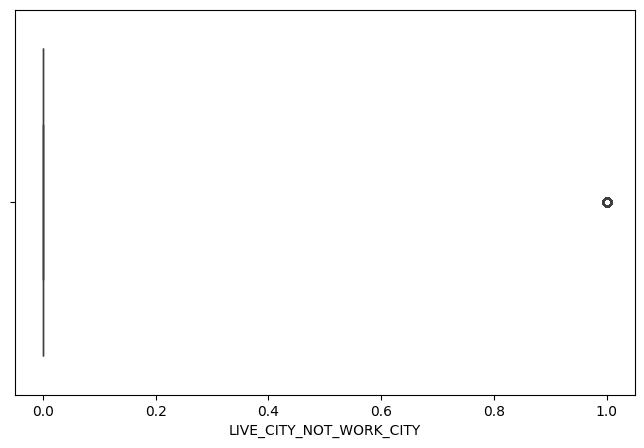

--------------
count    307511.000000
mean         44.433090
std          11.954493
min          21.000000
25%          35.000000
50%          44.000000
75%          54.000000
max          70.000000
Name: YEARS_BIRTH, dtype: float64


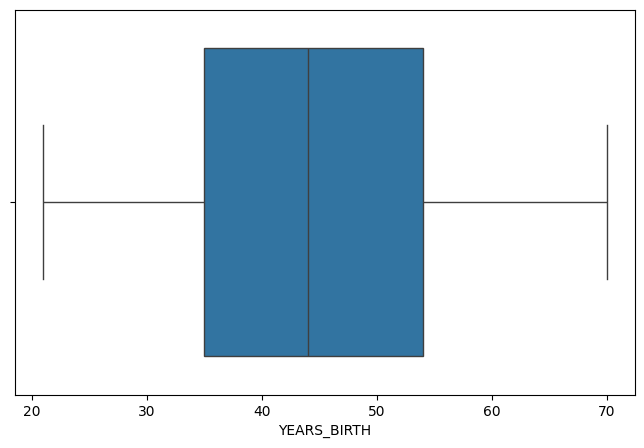

--------------
count    307511.000000
mean        185.839472
std         381.588910
min           0.000000
25%           3.000000
50%           7.000000
75%          16.000000
max        1000.000000
Name: YEARS_EMPLOYED, dtype: float64


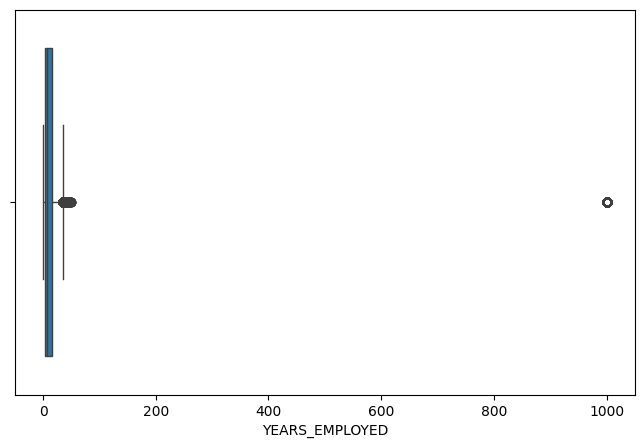

--------------
count    307511.000000
mean         14.165721
std           9.647134
min           0.000000
25%           6.000000
50%          13.000000
75%          21.000000
max          68.000000
Name: YEARS_REGISTRATION, dtype: float64


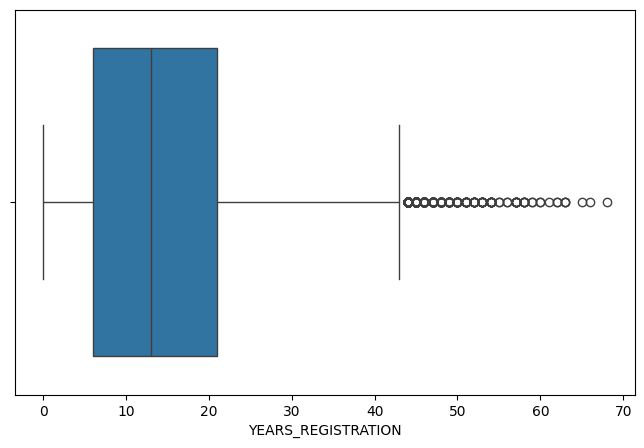

--------------
count    307511.000000
mean          8.710732
std           4.134511
min           0.000000
25%           5.000000
50%           9.000000
75%          12.000000
max          20.000000
Name: YEARS_ID_PUBLISH, dtype: float64


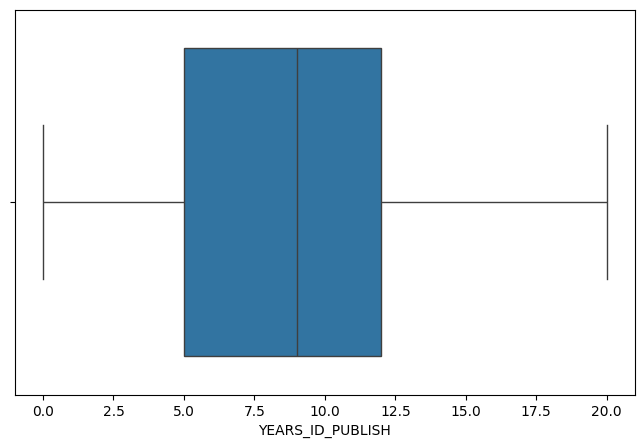

--------------
count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


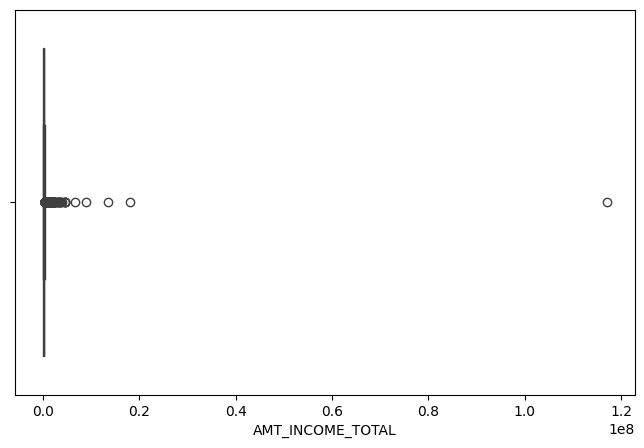

--------------
count    307511.000000
mean         13.070322
std           0.714515
min          10.860768
25%          12.506181
50%          13.149068
75%          13.603123
max          15.214228
Name: AMT_CREDIT, dtype: float64


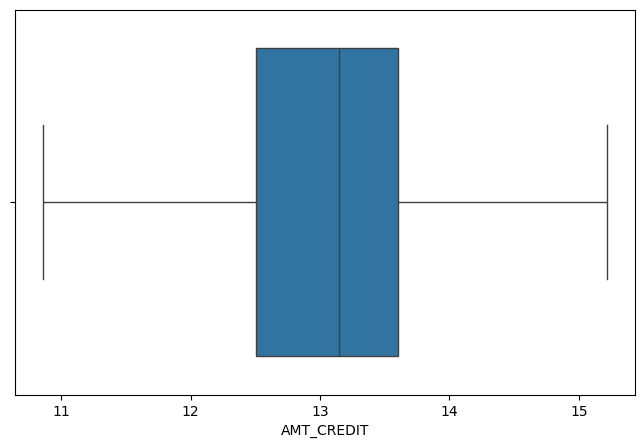

--------------
count    307499.000000
mean         10.068472
std           0.541839
min           8.604291
25%           9.712630
50%          10.122784
75%          10.451522
max          11.559861
Name: AMT_ANNUITY, dtype: float64


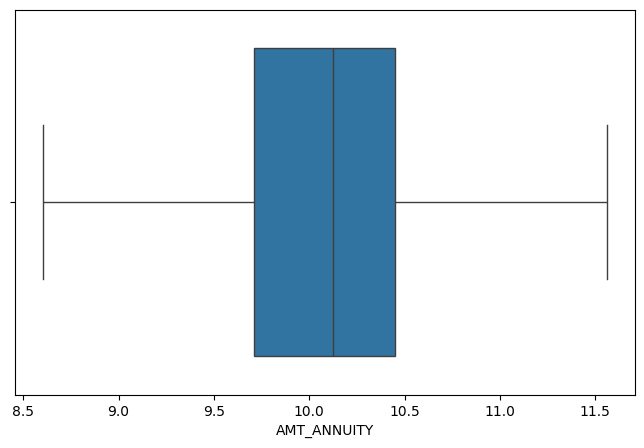

--------------
count    3.072330e+05
mean     5.279258e+05
std      3.371547e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      1.341000e+06
Name: AMT_GOODS_PRICE, dtype: float64


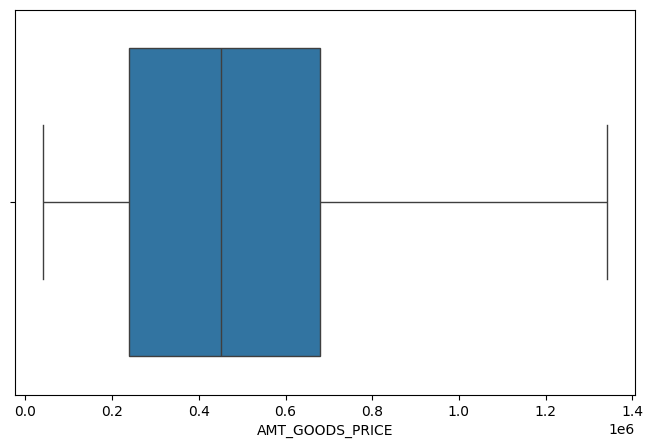

--------------
count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


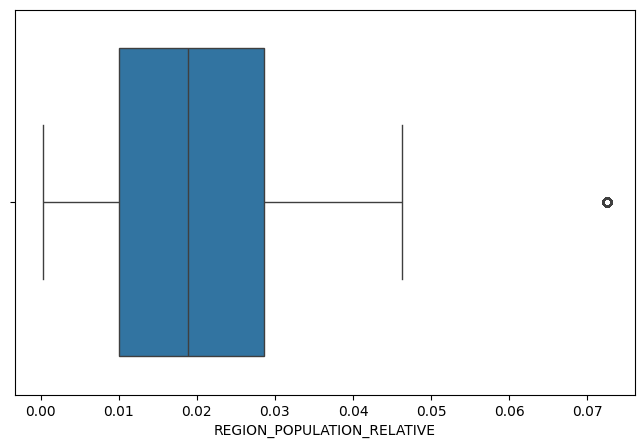

--------------
count    307511.000000
mean      -4986.120328
std        3522.886321
min      -24672.000000
25%       -7479.500000
50%       -4504.000000
75%       -2010.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: float64


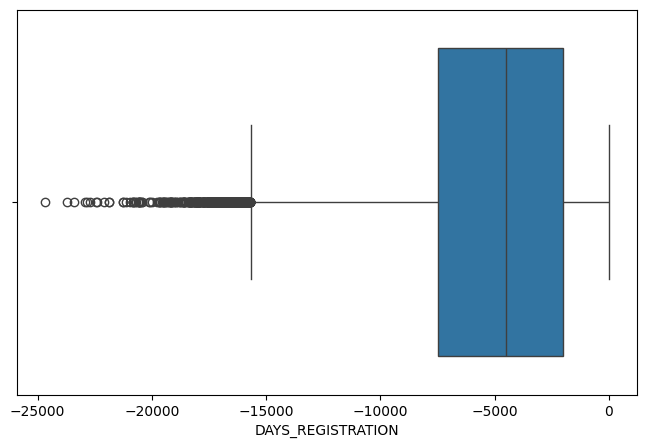

--------------
count    307509.0
mean          0.5
std           0.0
min           0.5
25%           0.5
50%           0.5
75%           0.5
max           0.5
Name: CNT_FAM_MEMBERS, dtype: float64


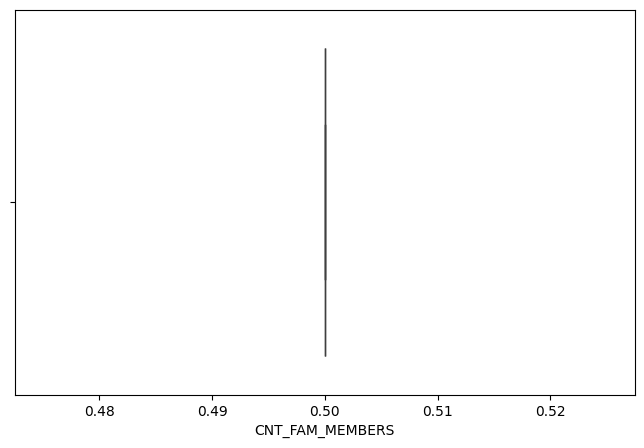

--------------
count    3.068510e+05
mean     2.297997e-16
std      1.000002e+00
min     -1.970376e+00
25%     -8.160602e-01
50%      1.190137e-01
75%      7.994765e-01
max      2.521134e+00
Name: EXT_SOURCE_2, dtype: float64


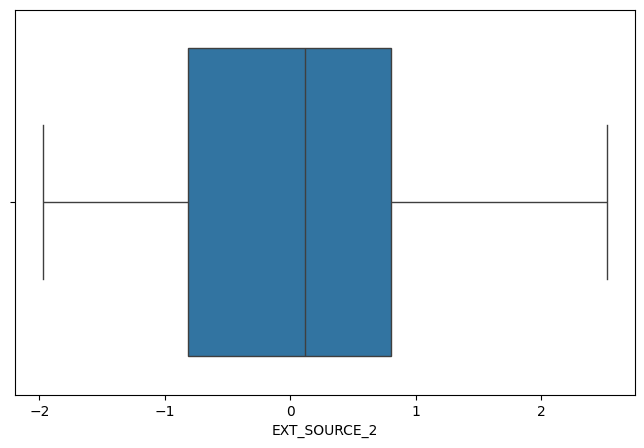

--------------
count    307511.000000
mean          1.699754
std           0.284852
min           1.000527
25%           1.517554
50%           1.707920
75%           1.889621
max           2.449808
Name: EXT_SOURCE_3, dtype: float64


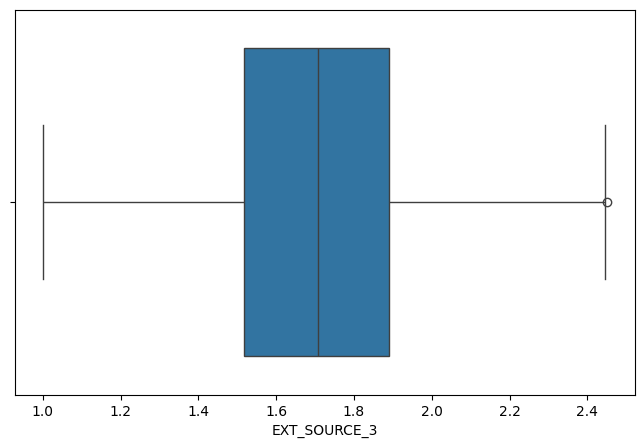

--------------
count    306490.000000
mean          1.422245
std           2.400989
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         348.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64


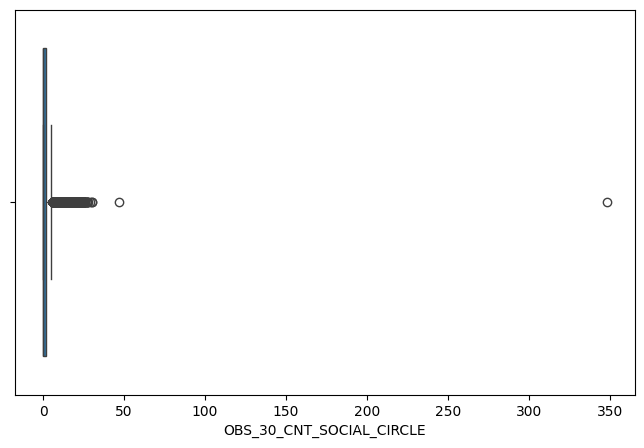

--------------
count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64


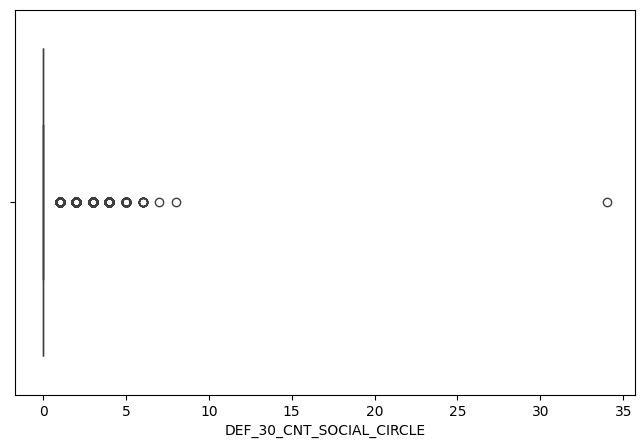

--------------
count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


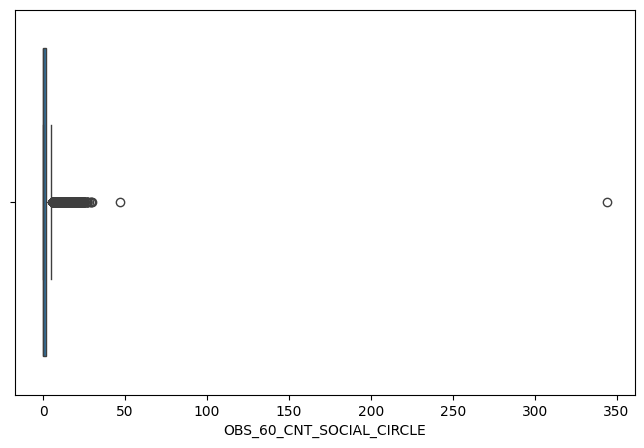

--------------
count    306490.000000
mean          0.100049
std           0.362291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64


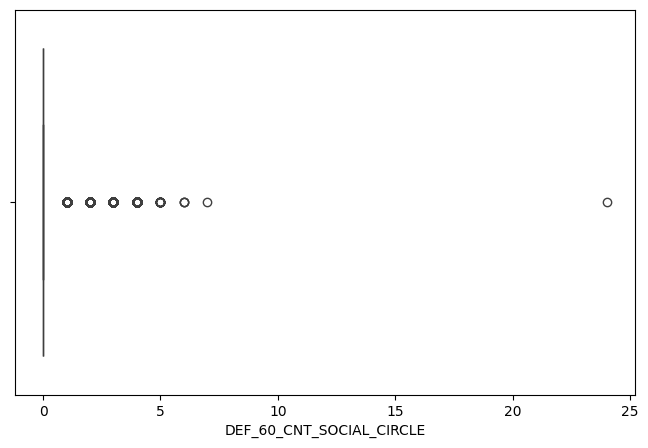

--------------
count    307510.000000
mean       -962.606637
std         825.982133
min       -3514.000000
25%       -1570.000000
50%        -757.000000
75%        -274.000000
max           0.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64


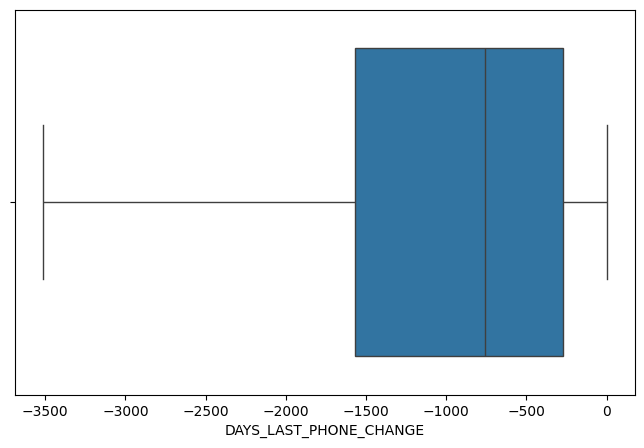

--------------
count    307511.000000
mean          0.005538
std           0.078014
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64


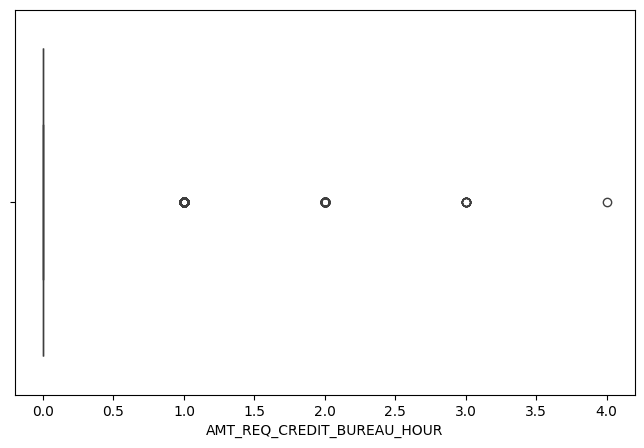

--------------
count    307511.000000
mean          0.006055
std           0.103037
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64


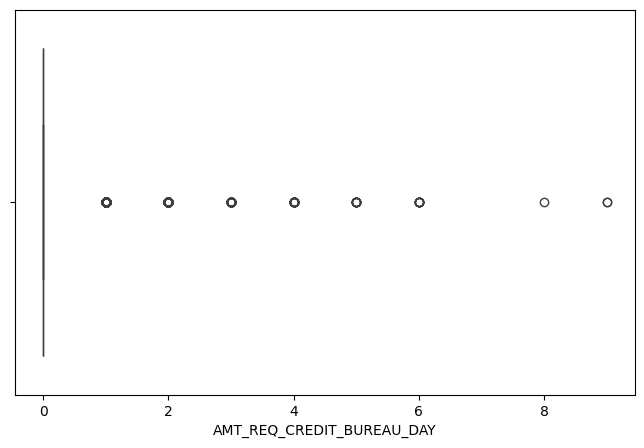

--------------
count    307511.000000
mean          0.029723
std           0.190728
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64


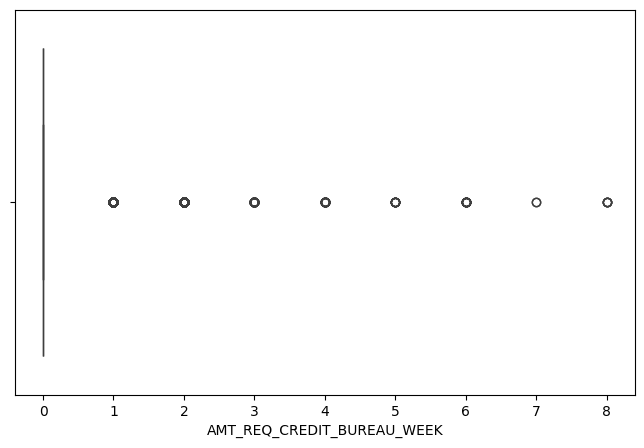

--------------
count    307511.000000
mean          0.231293
std           0.856810
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64


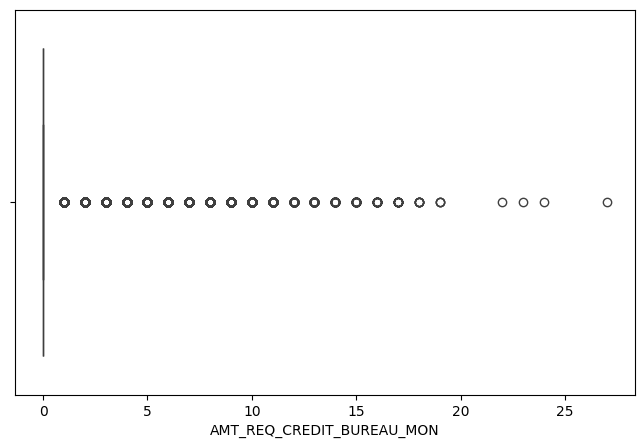

--------------
count    307511.000000
mean          0.229631
std           0.744059
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64


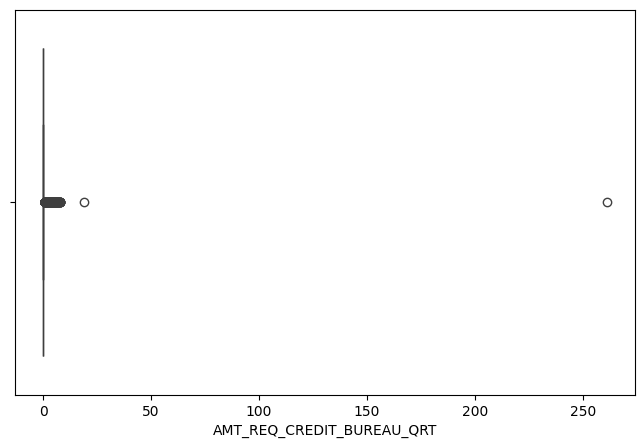

--------------
count    307511.000000
mean          1.643447
std           1.855821
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64


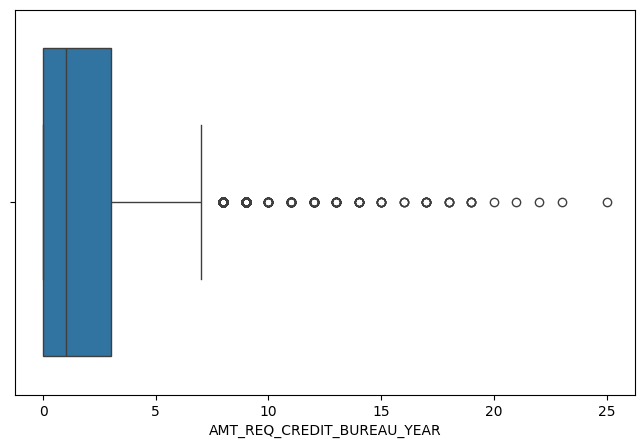

--------------


In [60]:
for col in num_cols_withoutflags:
    print(df_new[col].describe())
    plt.figure(figsize=[8,5])
    sns.boxplot(data=df_new,x=col)
    plt.show()
    print("--------------")

# Conclusions:
1. Almost 40% of the data is just yes/No answer so we can't conclude much from that.
2. A lot of data is scaled, so we make assumptions about relative comparisions but not absolute comparisons just from graph. 
3. The mean age of application is about 45
4. Mean income is 169K. 

In [ ]:
# IQR for some columns 

test_df_1 = df_new.copy()
col_obs = ['HOUR_APPR_PROCESS_START','YEARS_REGISTRATION','AMT_REQ_CREDIT_BUREAU_YEAR']
for x in col_obs:
    pp25=test_df_1[str(x)].quantile(0.25)
    pp75=test_df_1[str(x)].quantile(0.75)
    iqr_cnt = pp75-pp25
    lower_limit_cnt = pp25 - 1.5 * iqr_cnt
    upper_limit_cnt = pp75 + 1.5 * iqr_cnt
    print(test_df_1[str(x)].shape)
    print(f"Lower Limit: {lower_limit_cnt}, Upper Limit: {upper_limit_cnt}")
    test_df_1[str(x)] = test_df_1[str(x)].clip(lower=lower_limit_cnt, upper=upper_limit_cnt)

(307511,)
Lower Limit: 4.0, Upper Limit: 20.0
(307511,)
Lower Limit: -16.5, Upper Limit: 43.5
(307511,)
Lower Limit: -4.5, Upper Limit: 7.5


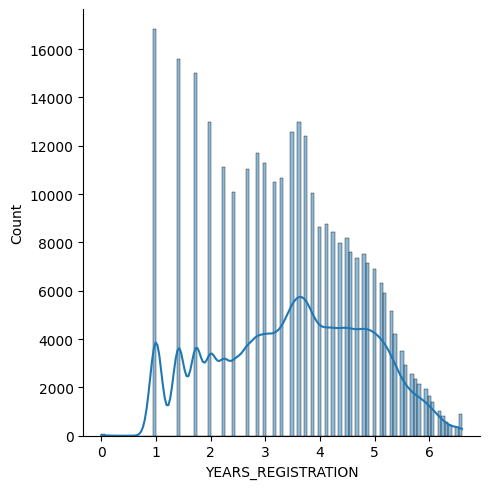

In [62]:
test_df_1['YEARS_REGISTRATION']=np.sqrt(test_df_1['YEARS_REGISTRATION'])
sns.displot(test_df_1['YEARS_REGISTRATION'],kde=True)

In [63]:
for x in col_obs:
    df_new[str(x)]=test_df_1[str(x)]

Plot on NAME_CONTRACT_TYPE for Target 0 and 1


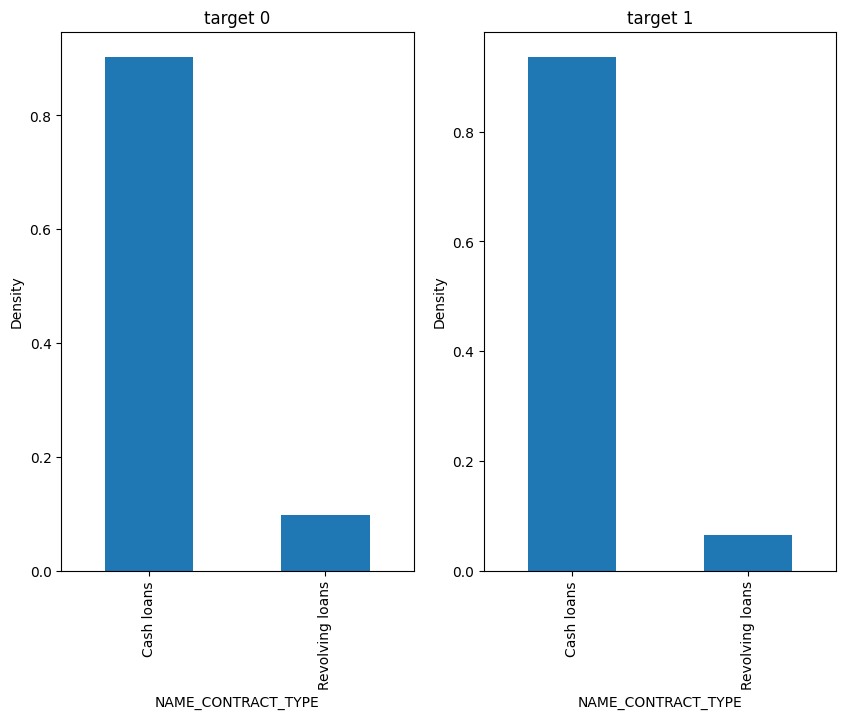

---------------------------------
Plot on CODE_GENDER for Target 0 and 1


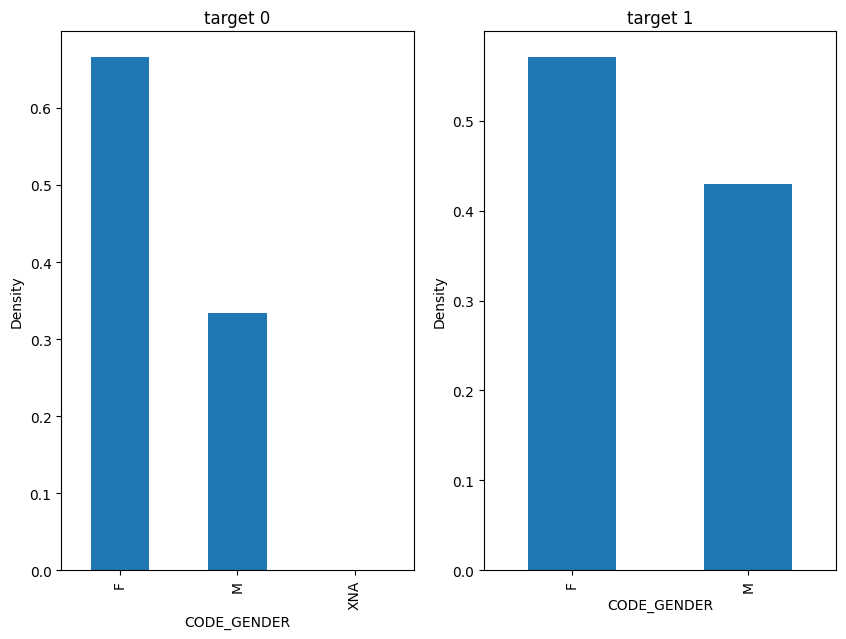

---------------------------------
Plot on FLAG_OWN_CAR for Target 0 and 1


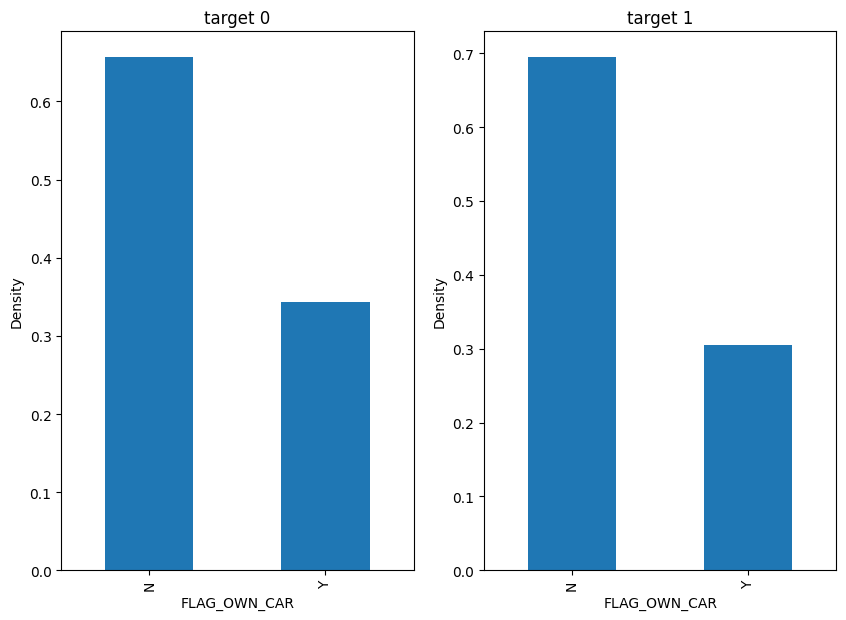

---------------------------------
Plot on FLAG_OWN_REALTY for Target 0 and 1


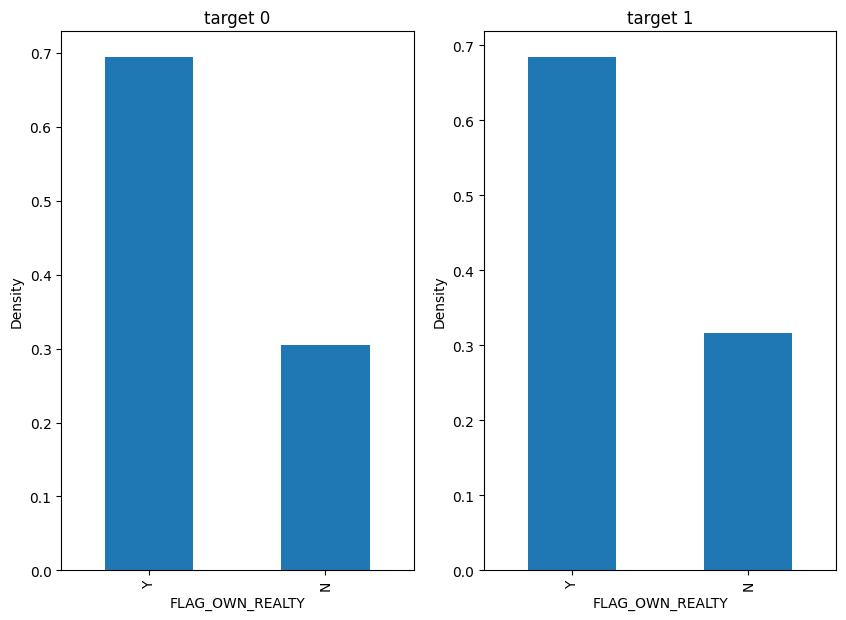

---------------------------------
Plot on NAME_TYPE_SUITE for Target 0 and 1


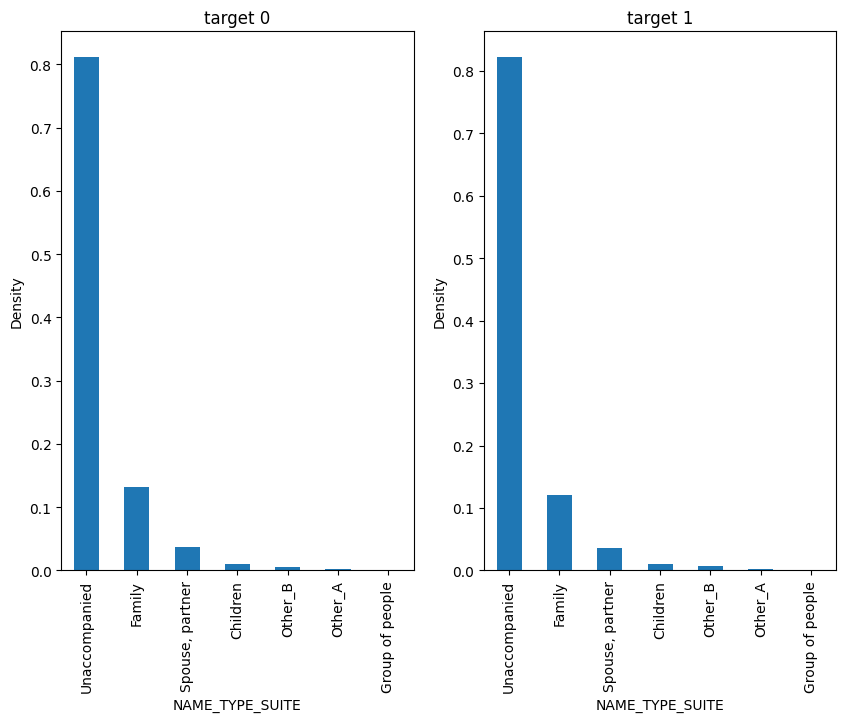

---------------------------------
Plot on NAME_INCOME_TYPE for Target 0 and 1


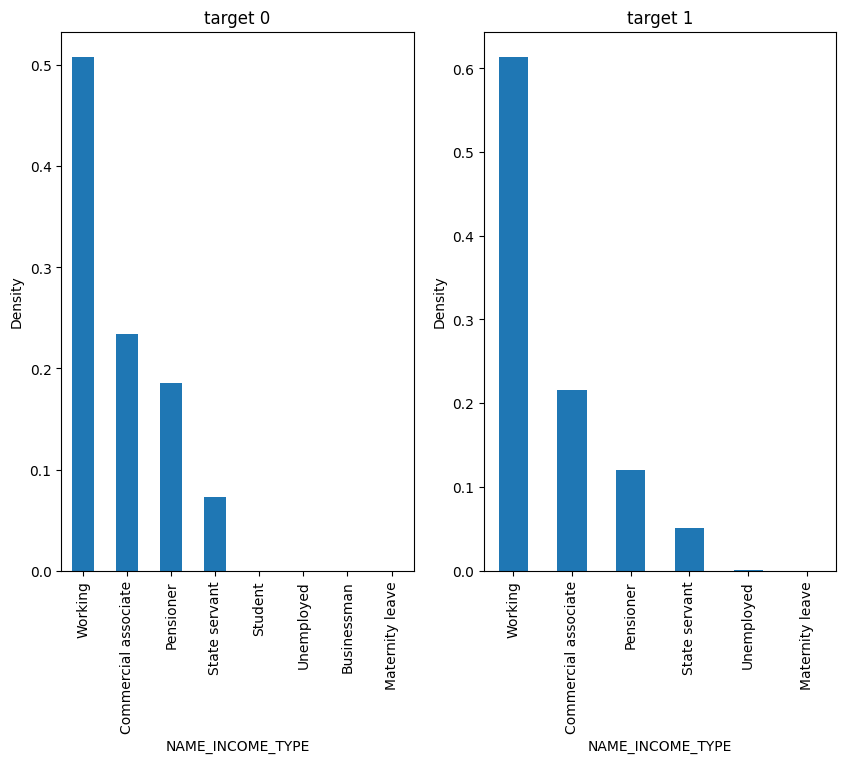

---------------------------------
Plot on NAME_EDUCATION_TYPE for Target 0 and 1


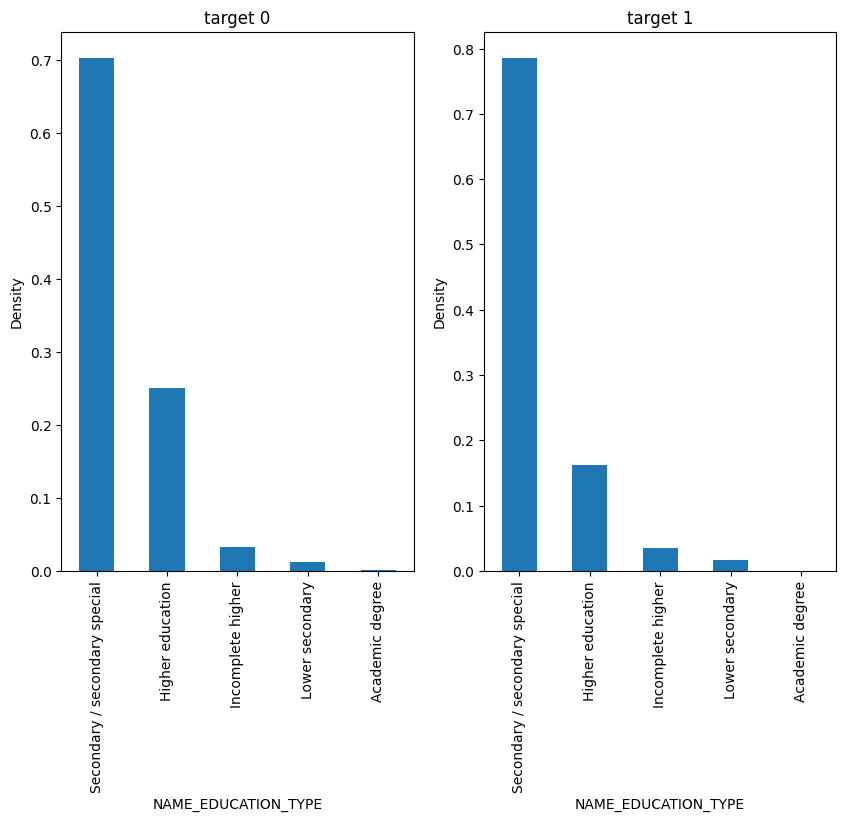

---------------------------------
Plot on NAME_FAMILY_STATUS for Target 0 and 1


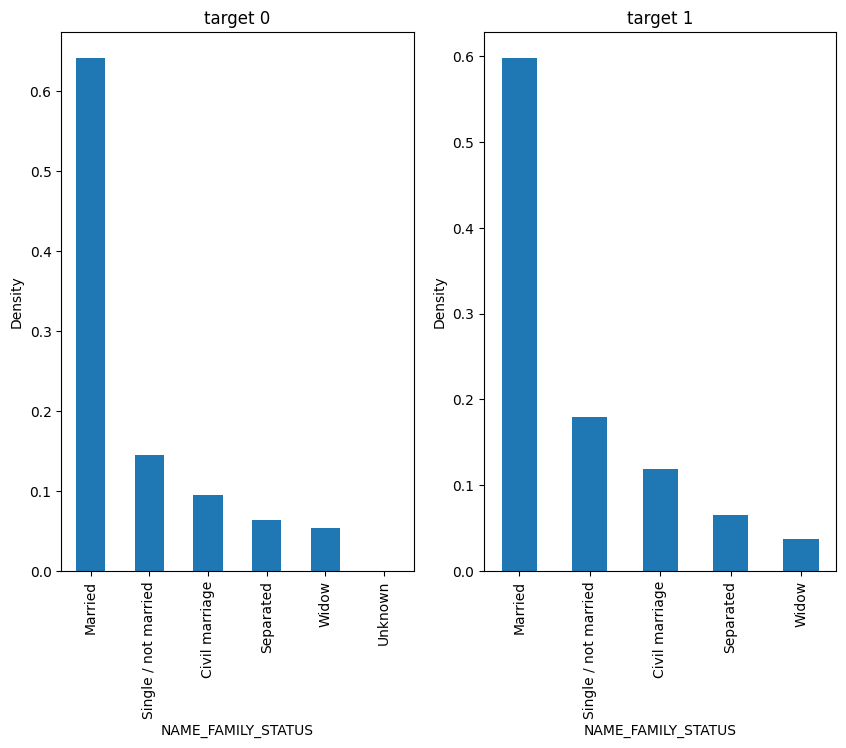

---------------------------------
Plot on NAME_HOUSING_TYPE for Target 0 and 1


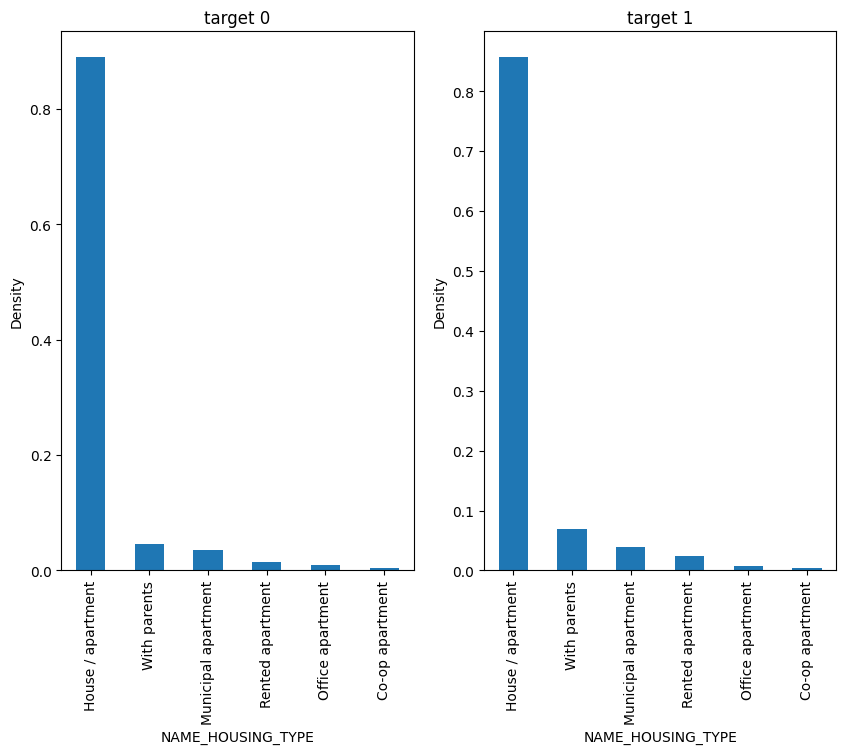

---------------------------------
Plot on OCCUPATION_TYPE for Target 0 and 1


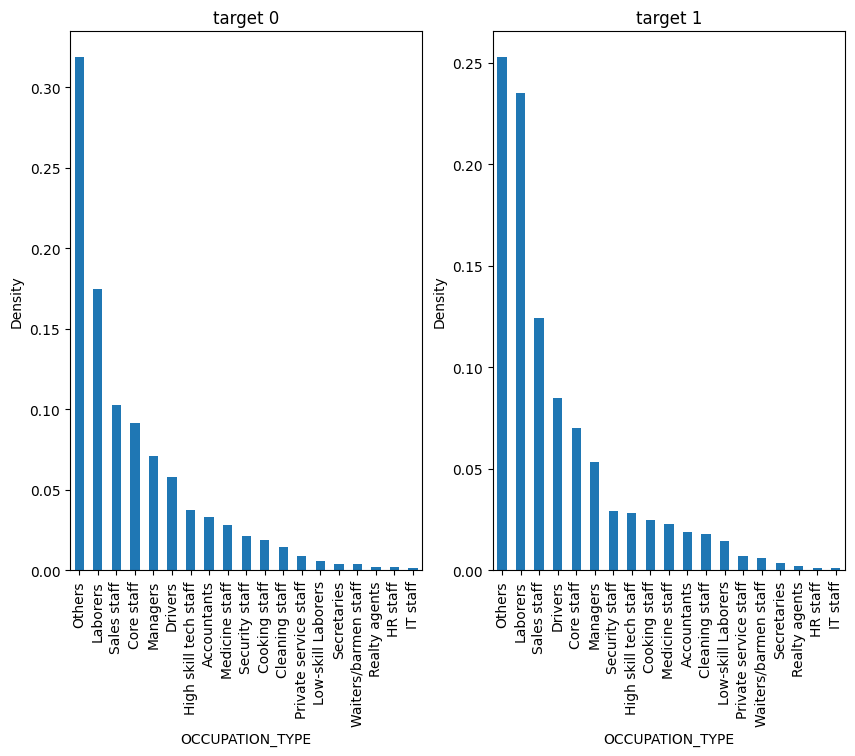

---------------------------------
Plot on WEEKDAY_APPR_PROCESS_START for Target 0 and 1


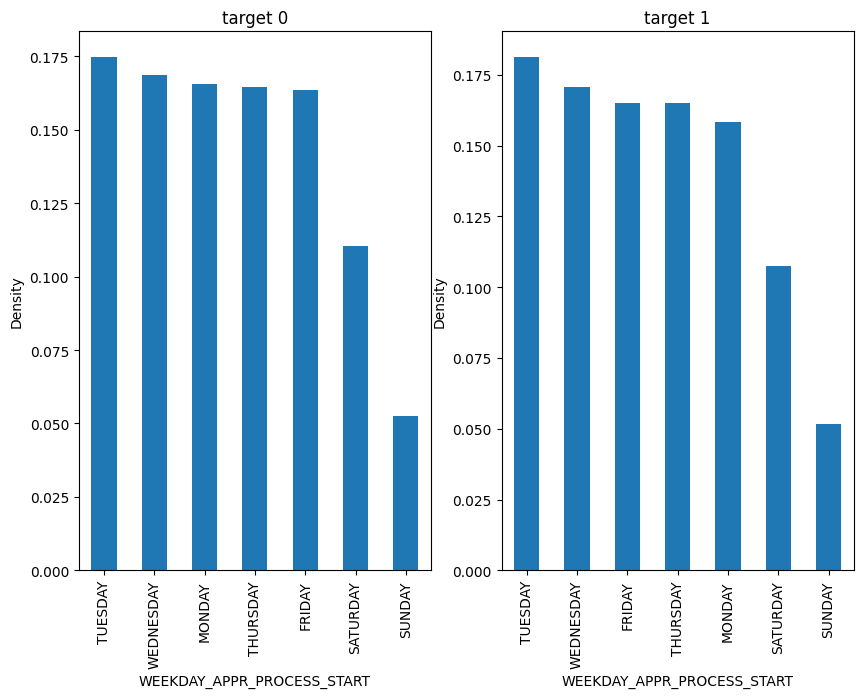

---------------------------------
Plot on ORGANIZATION_TYPE for Target 0 and 1


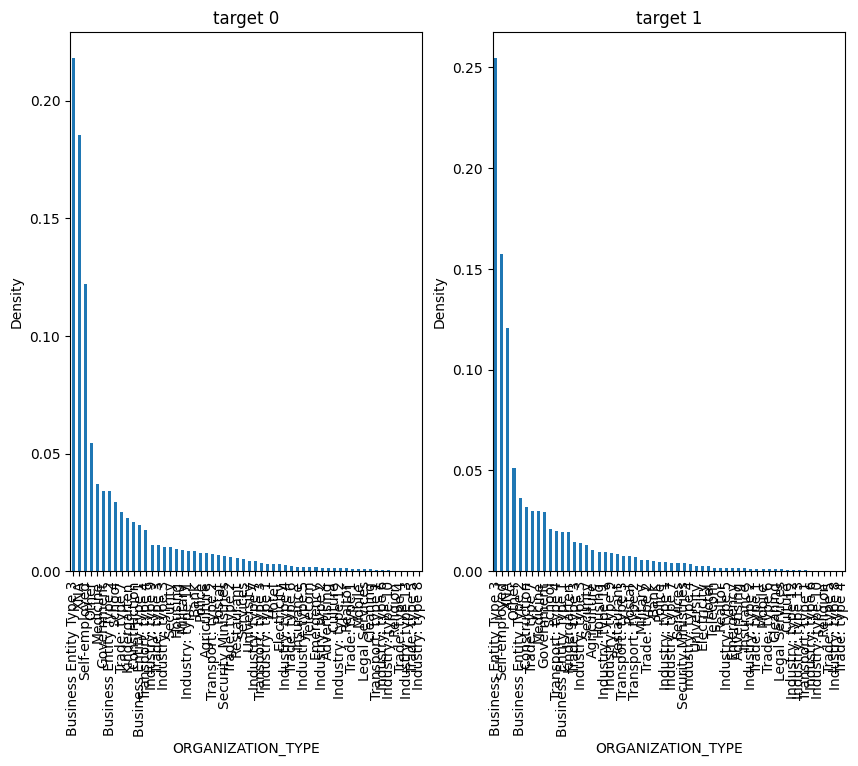

---------------------------------


In [64]:
#bivarient analysis with target 1 and target 0
tar_0=df_new[df_new.TARGET==0]
tar_1=df_new[df_new.TARGET==1]

for col in cat_cols:
    print(f"Plot on {col} for Target 0 and 1")
    plt.figure(figsize=[10,7])
    plt.subplot(1,2,1)
    tar_0[col].value_counts(normalize=True).plot.bar()
    plt.title("target 0")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.subplot(1,2,2)
    tar_1[col].value_counts(normalize=True).plot.bar()
    plt.title("target 1")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()
    print("---------------------------------")

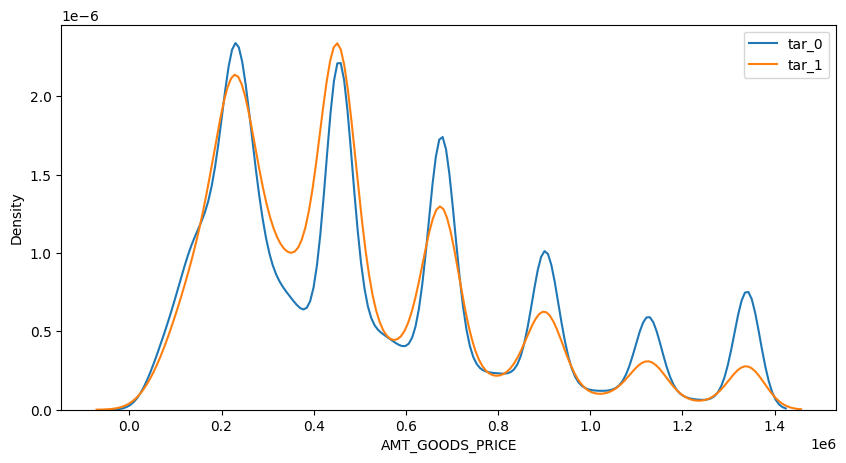

In [65]:
# Analysis on AMT_GOODS_PRICE using Target 0 and 1
plt.figure(figsize=[10,5])
sns.distplot(tar_0["AMT_GOODS_PRICE"],label='tar_0',hist=False)
sns.distplot(tar_1["AMT_GOODS_PRICE"],label='tar_1',hist=False)
plt.legend()
plt.show()

Amount of Goods Price is almost always lower for target_1 candidates. 

<Axes: xlabel='WEEKDAY_APPR_PROCESS_START', ylabel='HOUR_APPR_PROCESS_START'>

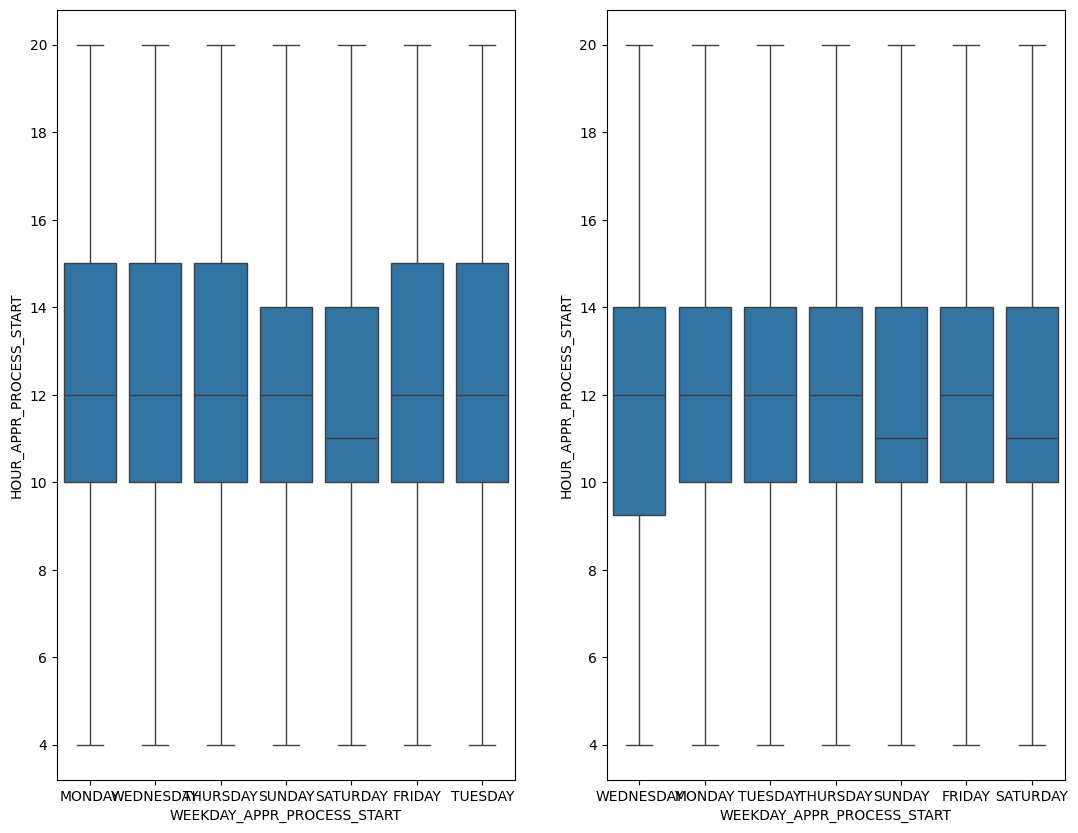

In [ ]:
# Bivarient between WEEKDAY_APPR_PROCESS_START vs HOUR_APPR_PROCESS_START

plt.figure(figsize=(13,10))
plt.subplot(1,2,1)
sns.boxplot(x="WEEKDAY_APPR_PROCESS_START", y="HOUR_APPR_PROCESS_START",data=tar_0)
plt.subplot(1,2,2)
sns.boxplot(x="WEEKDAY_APPR_PROCESS_START", y="HOUR_APPR_PROCESS_START",data=tar_1)


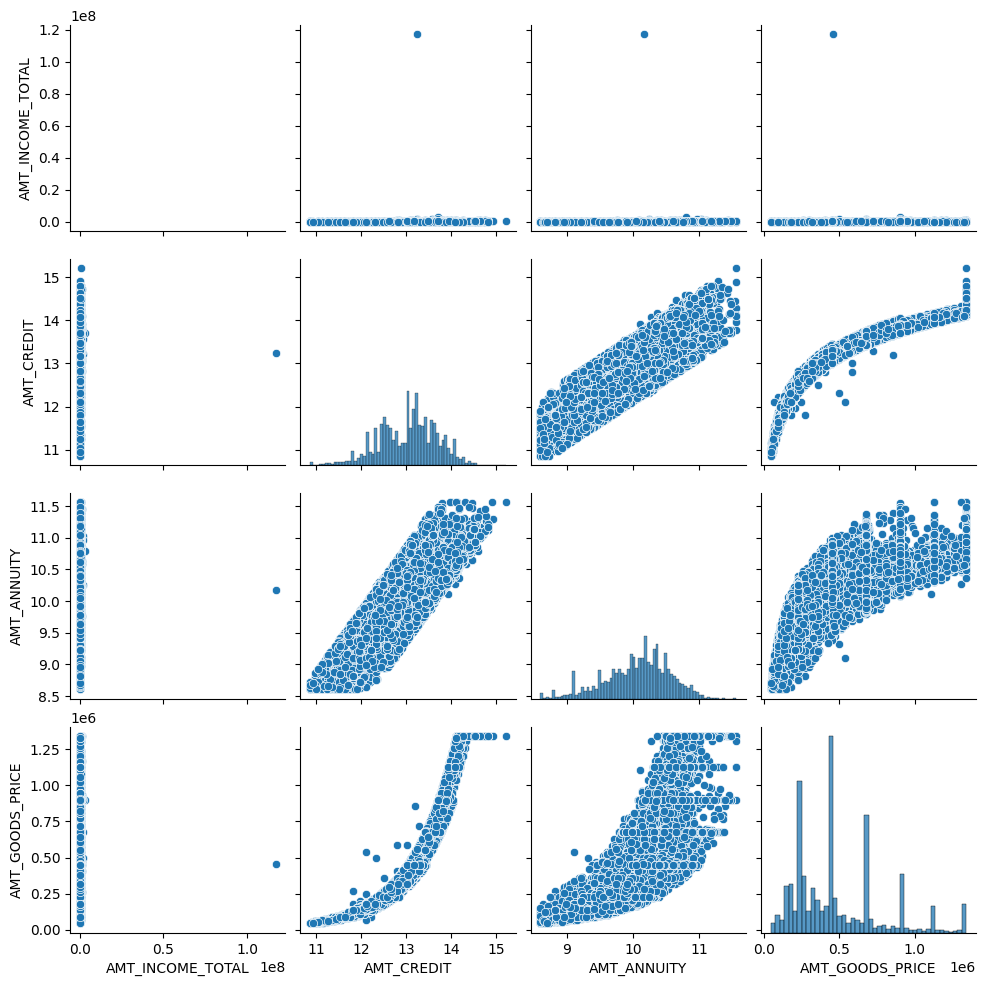

In [67]:
#Pair Plot for amount columns for target 1
sns.pairplot(tar_1[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']])
plt.show()

- Amount Credit and Amount Annuity have a high positive correlation. 
- Amount Goods Price also increases with Amount Annuity but not linearly. 

In [68]:
# Multivarient analysis
# Co-relation between Numeric Columns
co_rel = df_new[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','YEARS_BIRTH','YEARS_EMPLOYED','YEARS_REGISTRATION','YEARS_ID_PUBLISH']]
co_rel.head()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  YEARS_BIRTH  \
0          202500.0   12.915581    10.114619         351000.0           26   
1          270000.0   14.072865    10.482892        1129500.0           46   
2           67500.0   11.813037     8.817446         135000.0           53   
3          135000.0   12.652947    10.298481         297000.0           53   
4          121500.0   13.148033     9.992711         513000.0           55   

   YEARS_EMPLOYED  YEARS_REGISTRATION  YEARS_ID_PUBLISH  
0               2            3.162278                 6  
1               4            2.000000                 1  
2               1            3.464102                 7  
3               9            5.196152                 7  
4               9            3.464102                10

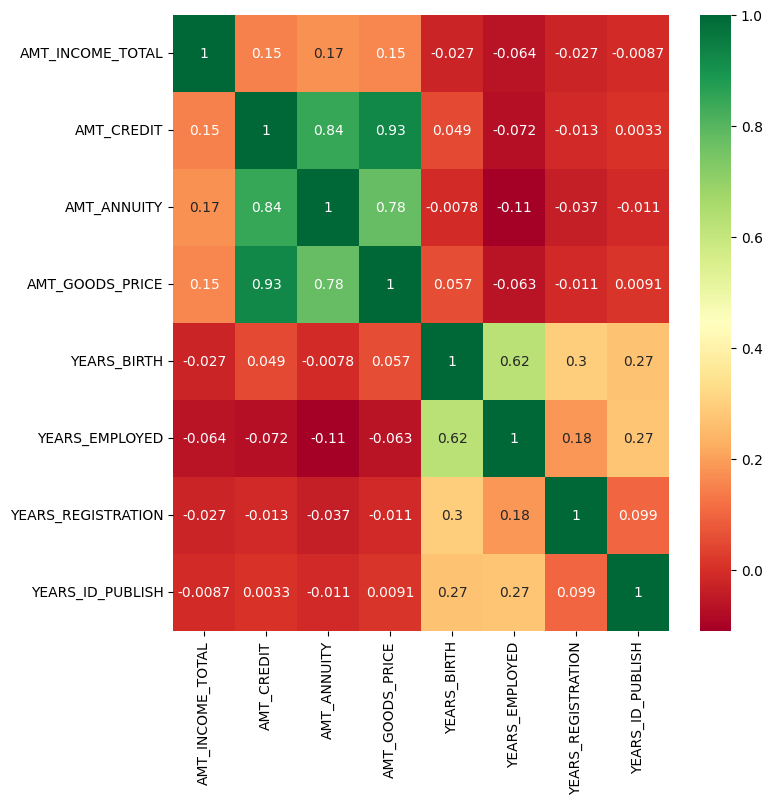

In [69]:
# analyse multvarient for above data
plt.figure(figsize=(8,8))
sns.heatmap(co_rel.corr(),annot=True,cmap="RdYlGn")
plt.show()

- High correlation can be seen between the **Credit, Annuity, Goods Price** can be seen. 
- There is a good correlation between Year Birth and Year Employed.

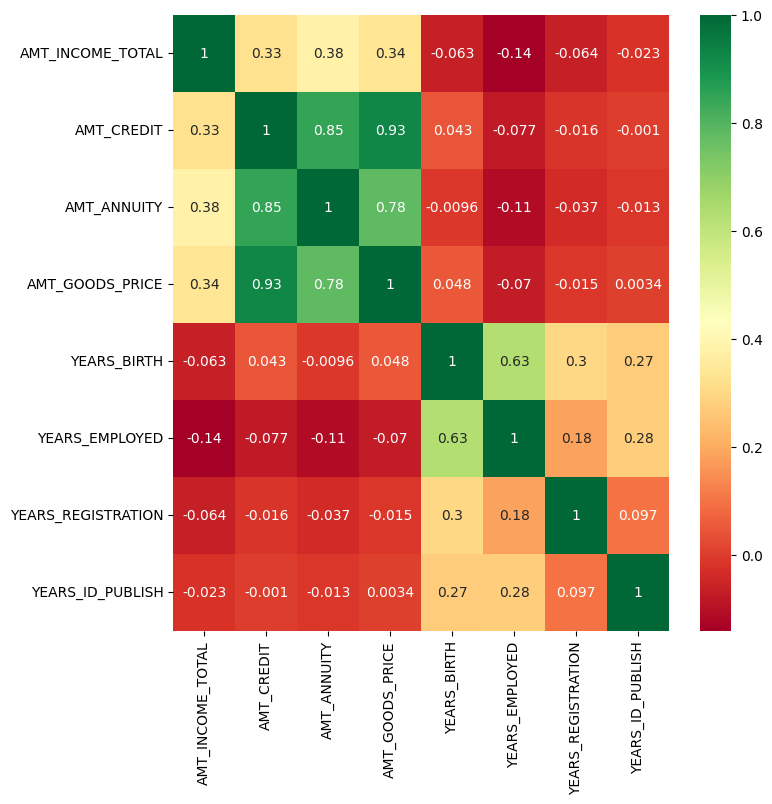

In [ ]:
# Splitting the numeric colms in target 0 and target 1 and finding the correlation between them
co_rel_0 = tar_0[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','YEARS_BIRTH','YEARS_EMPLOYED','YEARS_REGISTRATION','YEARS_ID_PUBLISH']]
plt.figure(figsize=(8,8))
sns.heatmap(co_rel_0.corr(),annot=True,cmap="RdYlGn")
plt.show()

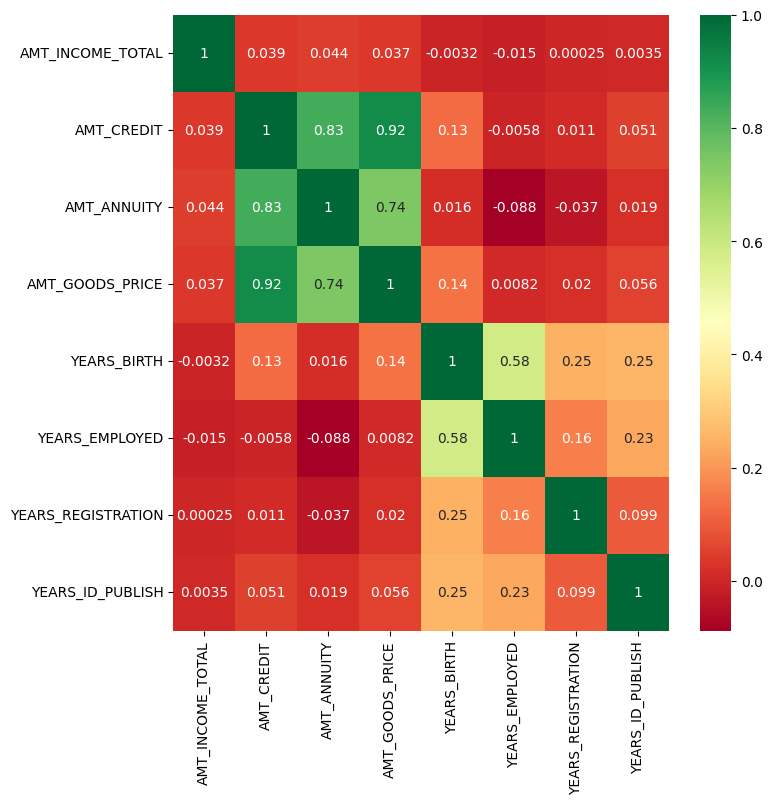

In [71]:
co_rel_1 = tar_1[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','YEARS_BIRTH','YEARS_EMPLOYED','YEARS_REGISTRATION','YEARS_ID_PUBLISH']]
plt.figure(figsize=(8,8))
sns.heatmap(co_rel_1.corr(),annot=True,cmap="RdYlGn")
plt.show()

**Note:**
There is slightly higher correlation between columnns of target_0 group compared to that between columns of target_1

In [72]:
# operations on previous data
p_data=pd.read_csv('/Users/niramaypatel/Desktop/previous_application.csv')
p_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [73]:
p_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [74]:
p_data.shape

(1670214, 37)

In [75]:
p_data.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [76]:
# Drop columns will more than 49% null values
percentage=49
thresholdp = int(((100-percentage)/100)*p_data.shape[0]+1)
p_data_new= p_data.dropna(axis=1,thresh=thresholdp) 

In [77]:
numerical_cols = list(p_data_new.columns[p_data_new.dtypes==np.int64])+list(p_data_new.columns[p_data_new.dtypes==np.float64])
numerical_cols

['SK_ID_PREV',
 'SK_ID_CURR',
 'HOUR_APPR_PROCESS_START',
 'NFLAG_LAST_APPL_IN_DAY',
 'DAYS_DECISION',
 'SELLERPLACE_AREA',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'CNT_PAYMENT',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [78]:
for col in p_data_new:
    if p_data_new[col].dtypes == np.int64 or p_data_new[col].dtypes == np.float64:
        p_data_new[col] = p_data_new[col].apply(lambda x:abs(x))

In [79]:
p_data_new.AMT_GOODS_PRICE.fillna(p_data_new.AMT_GOODS_PRICE.median(),inplace=True)
p_data_new.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                 0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

In [80]:
# BINNING AMT_CREDIT into categories
p_data_new.AMT_CREDIT.describe()

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

In [81]:
p_data_new["AMT_CREDIT_Category"]=pd.cut(p_data_new.AMT_CREDIT,[0,200000,400000,600000,800000,1000000],labels=["Very low","Low","Medium","High","Very High"])
p_data_new.AMT_CREDIT_Category.value_counts(normalize=True)*100

AMT_CREDIT_Category
Very low     70.479908
Low          15.356801
Medium        7.887385
High          3.822743
Very High     2.453164
Name: proportion, dtype: float64

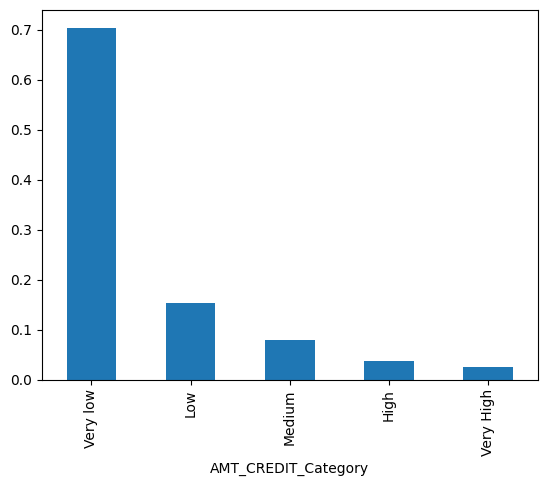

In [82]:
p_data_new.AMT_CREDIT_Category.value_counts(normalize=True).plot.bar()
plt.show()

In [83]:
p_data_new.AMT_GOODS_PRICE.describe()

count    1.670214e+06
mean     2.011815e+05
std      2.808629e+05
min      0.000000e+00
25%      6.750000e+04
50%      1.123200e+05
75%      1.804050e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

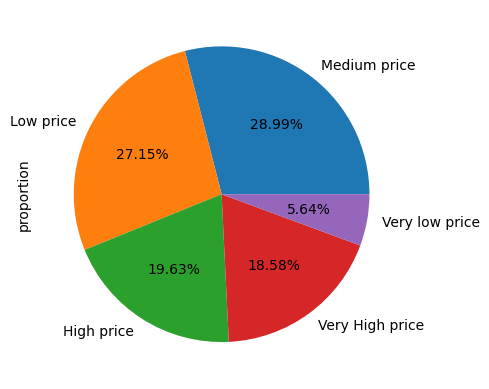

In [84]:
p_data_new["AMT_GOODS_PRICE"]=pd.cut(p_data_new.AMT_GOODS_PRICE,[0,20000,40000,60000,80000,100000],labels=["Very low price","Low price","Medium price","High price","Very High price"])
p_data_new["AMT_GOODS_PRICE"].value_counts(normalize=True).plot.pie(autopct="%1.2f%%")
plt.show()

In [85]:
p_data_new.isna().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                64.336247
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

0.0

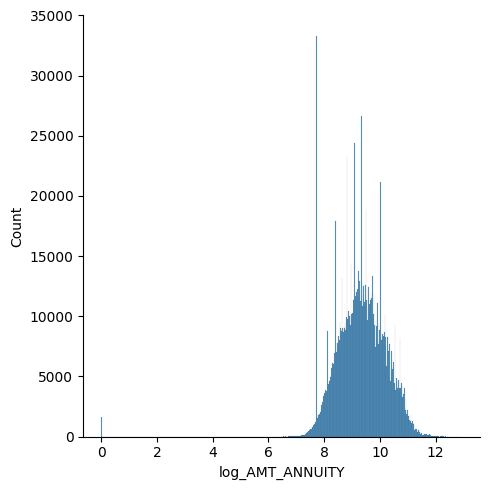

In [ ]:
# log transformation on AMT_ANNUITY for better data visualisation
p_data_new['log_AMT_ANNUITY'] = np.log1p(p_data_new['AMT_ANNUITY'])
sns.displot(p_data_new['log_AMT_ANNUITY'])
p_data_new['log_AMT_ANNUITY'].fillna(p_data_new['log_AMT_ANNUITY'].median(),inplace=True)
p_data_new['log_AMT_ANNUITY'].isna().mean()*100

In [88]:
miss_cols = ['DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION']
for cols in miss_cols:
    p_data_new[str(cols)].fillna(value=p_data_new[str(cols)].mode,inplace=True)
p_data_new.isna().mean()*100
p_data_new.AMT_ANNUITY.fillna(p_data_new.AMT_ANNUITY.median(),inplace=True)

In [89]:
p_data_new.isna().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                     0.000000
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                64.336247
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

In [ ]:
# splitting data based on Contract Status
approved=p_data_new[p_data_new.NAME_CONTRACT_STATUS =='Approved']
cancelled=p_data_new[p_data_new.NAME_CONTRACT_STATUS =='Canceled']
refused=p_data_new[p_data_new.NAME_CONTRACT_STATUS =='Refused']
unused=p_data_new[p_data_new.NAME_CONTRACT_STATUS =='Unused offer']

In [91]:
p_data_new["NAME_CONTRACT_STATUS"].value_counts(normalize=True)*100

NAME_CONTRACT_STATUS
Approved        62.074740
Canceled        18.938831
Refused         17.403638
Unused offer     1.582791
Name: proportion, dtype: float64

<Axes: ylabel='proportion'>

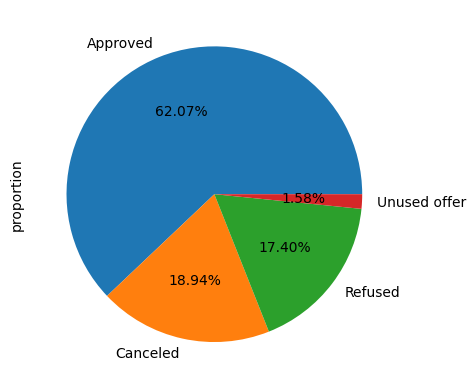

In [92]:
p_data_new["NAME_CONTRACT_STATUS"].value_counts(normalize=True).plot.pie(autopct="%1.2f%%")

In [93]:
cat_cols=list(p_data_new.columns[p_data_new.dtypes==np.object_])
num_cols=list(p_data_new.columns[p_data_new.dtypes==np.int64])+list(p_data_new.columns[p_data_new.dtypes==np.float64])

In [94]:
cat_cols

['NAME_CONTRACT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION']

In [95]:
# #PLOT ON CATEGORICAL COLUMNS
# for cols in cat_cols:
#     print(p_data_new[cols].value_counts(normalize=True))
#     plt.figure(figsize=[5,5])
#     p_data_new[cols].value_counts(normalize=True).plot.pie(labeldistance=None,autopct='%1.2f%%')
#     plt.legend()
#     plt.show()

count    1.670214e+06
mean     1.923089e+06
std      5.325980e+05
min      1.000001e+06
25%      1.461857e+06
50%      1.923110e+06
75%      2.384280e+06
max      2.845382e+06
Name: SK_ID_PREV, dtype: float64


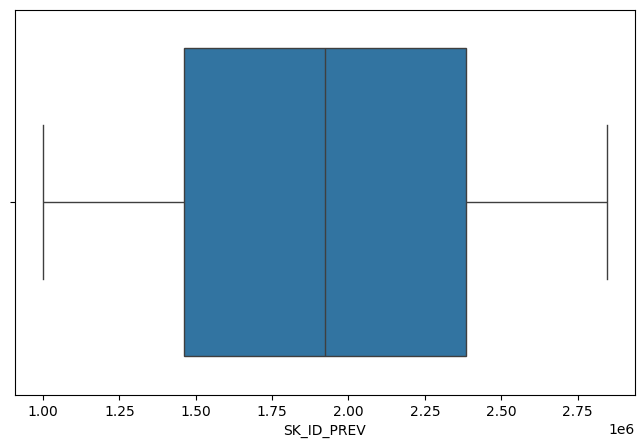

--------------
count    1.670214e+06
mean     2.783572e+05
std      1.028148e+05
min      1.000010e+05
25%      1.893290e+05
50%      2.787145e+05
75%      3.675140e+05
max      4.562550e+05
Name: SK_ID_CURR, dtype: float64


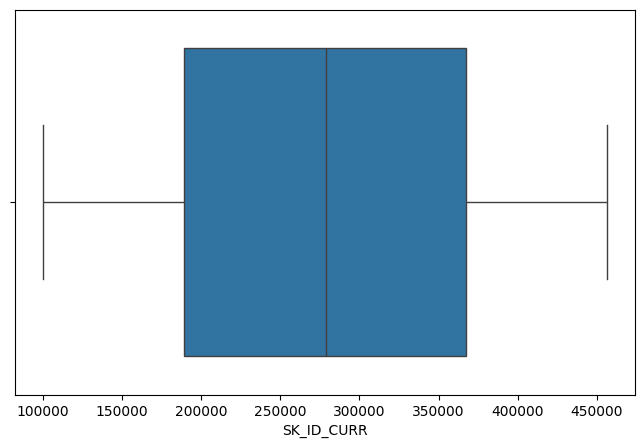

--------------
count    1.670214e+06
mean     1.248418e+01
std      3.334028e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.200000e+01
75%      1.500000e+01
max      2.300000e+01
Name: HOUR_APPR_PROCESS_START, dtype: float64


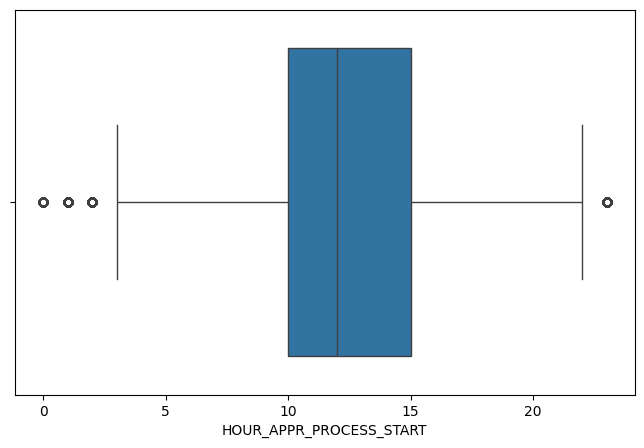

--------------
count    1.670214e+06
mean     9.964675e-01
std      5.932963e-02
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: NFLAG_LAST_APPL_IN_DAY, dtype: float64


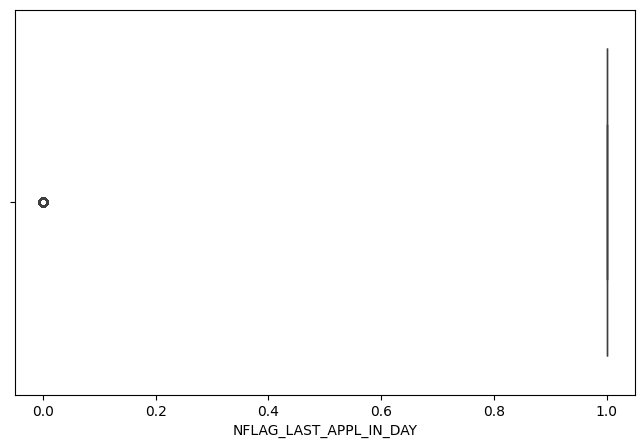

--------------
count    1.670214e+06
mean     8.806797e+02
std      7.790997e+02
min      1.000000e+00
25%      2.800000e+02
50%      5.810000e+02
75%      1.300000e+03
max      2.922000e+03
Name: DAYS_DECISION, dtype: float64


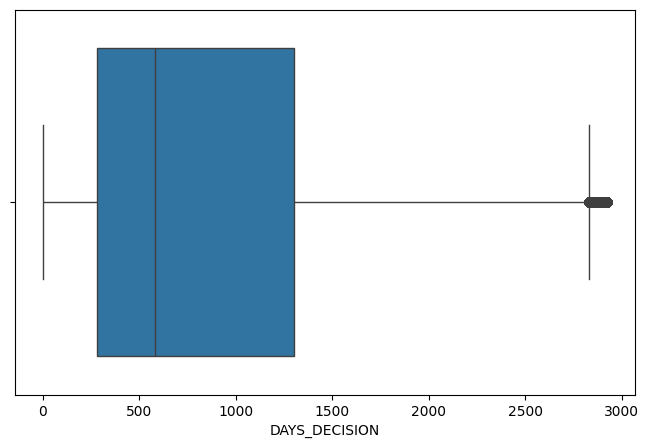

--------------
count    1.670214e+06
mean     3.148644e+02
std      7.127403e+03
min      0.000000e+00
25%      1.000000e+00
50%      3.000000e+00
75%      8.200000e+01
max      4.000000e+06
Name: SELLERPLACE_AREA, dtype: float64


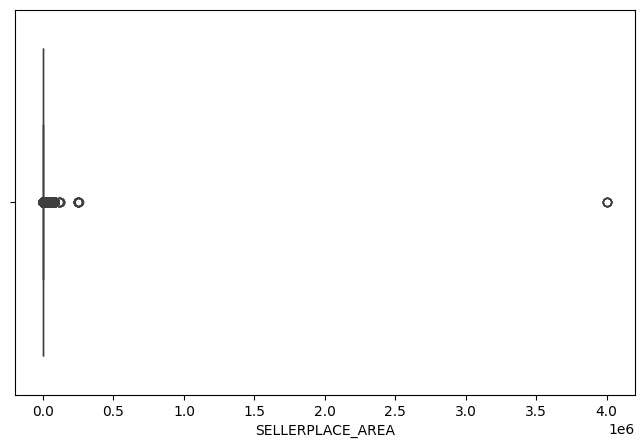

--------------
count    1.670214e+06
mean     1.490651e+04
std      1.317751e+04
min      0.000000e+00
25%      7.547096e+03
50%      1.125000e+04
75%      1.682403e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64


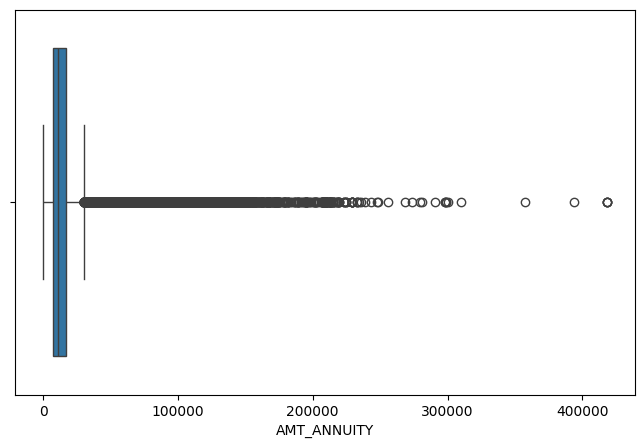

--------------
count    1.670214e+06
mean     1.752339e+05
std      2.927798e+05
min      0.000000e+00
25%      1.872000e+04
50%      7.104600e+04
75%      1.803600e+05
max      6.905160e+06
Name: AMT_APPLICATION, dtype: float64


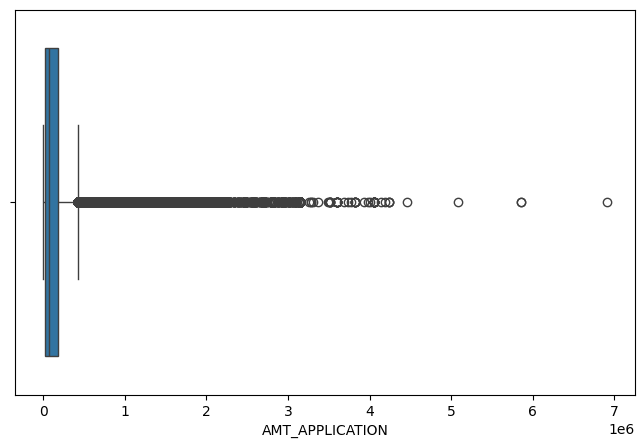

--------------
count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64


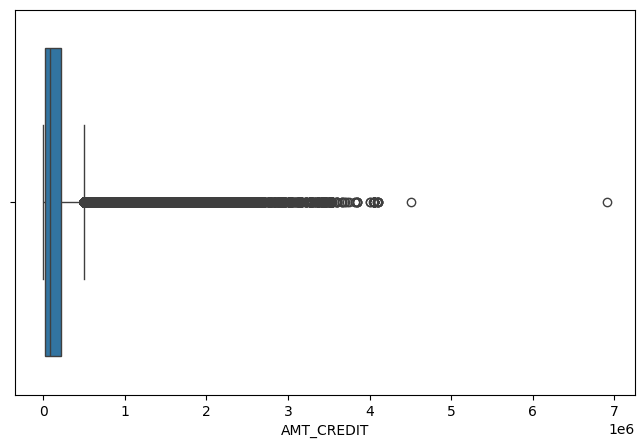

--------------
count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64


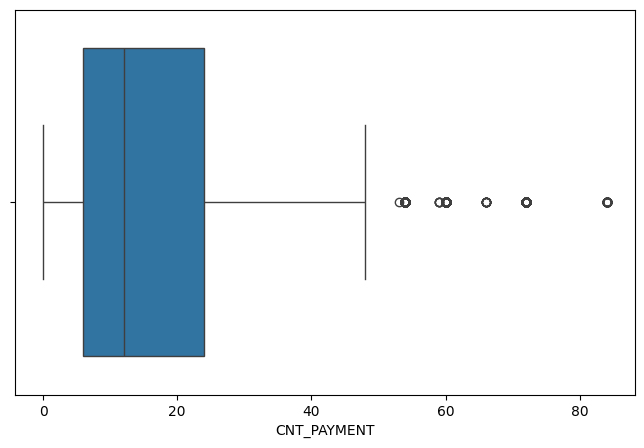

--------------
count    1.670214e+06
mean     3.515695e+05
std      6.923193e+04
min      2.000000e+00
25%      3.652430e+05
50%      3.652430e+05
75%      3.652430e+05
max      3.652430e+05
Name: DAYS_FIRST_DRAWING, dtype: float64


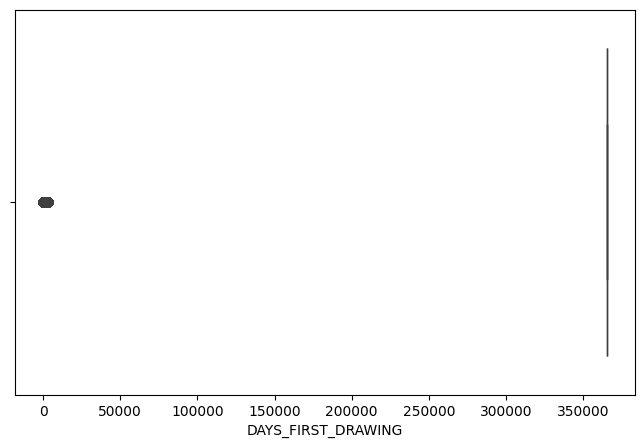

--------------
count    997149.000000
mean          0.332570
std           0.471134
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: NFLAG_INSURED_ON_APPROVAL, dtype: float64


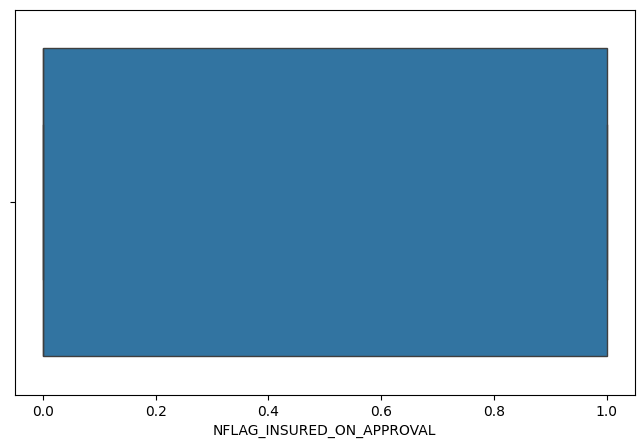

--------------
count    1.670214e+06
mean     9.326700e+00
std      7.878390e-01
min      0.000000e+00
25%      8.929051e+00
50%      9.328212e+00
75%      9.730623e+00
max      1.294338e+01
Name: log_AMT_ANNUITY, dtype: float64


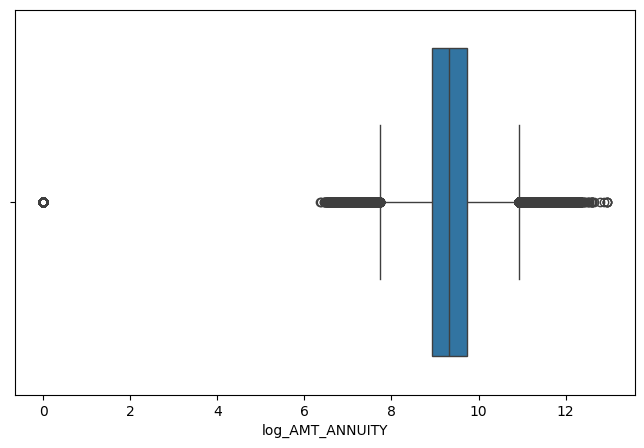

--------------


In [96]:
for col in num_cols:
    print(p_data_new[col].describe())
    plt.figure(figsize=[8,5])
    sns.boxplot(data=p_data_new,x=col)
    plt.show()
    print("--------------")

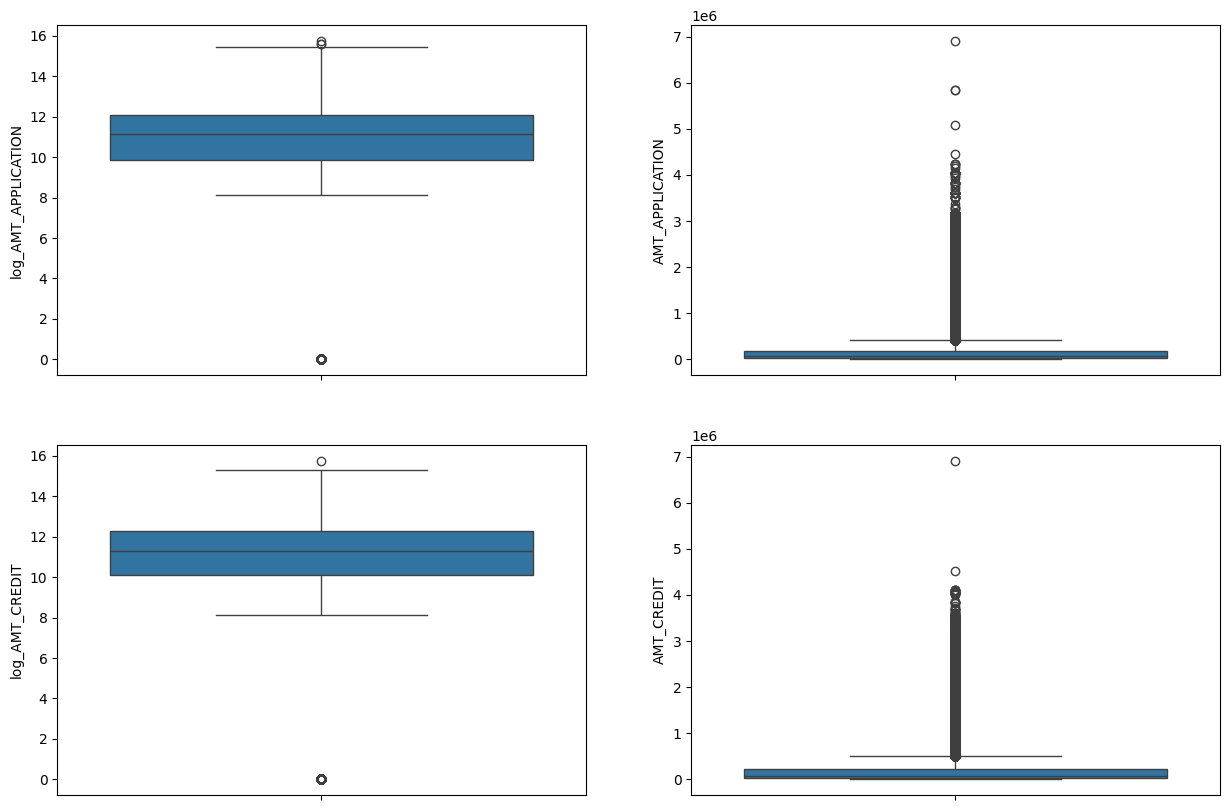

In [ ]:
# Log transformed columns vs initial columns

p_data_new['log_AMT_APPLICATION'] = np.log1p(p_data_new['AMT_APPLICATION'])
p_data_new['log_AMT_CREDIT']=np.log1p(p_data_new['AMT_CREDIT'])
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(p_data_new['log_AMT_APPLICATION'])
plt.subplot(2,2,2)
sns.boxplot(p_data_new['AMT_APPLICATION'])
plt.subplot(2,2,3)
sns.boxplot(p_data_new['log_AMT_CREDIT'])
plt.subplot(2,2,4)
sns.boxplot(p_data_new['AMT_CREDIT'])
plt.show()

In [98]:
p_data_copy_1=p_data_new.copy()
plot_list_3=['log_AMT_CREDIT','log_AMT_APPLICATION','AMT_CREDIT','AMT_APPLICATION']
for x in plot_list_3:
    pp25_n = p_data_copy_1[str(x)].quantile(0.25)
    pp75_n = p_data_copy_1[str(x)].quantile(0.75)

    # Calculate the Interquartile Range (IQR)
    iqr_nn = pp75_n - pp25_n

    # Calculate the lower and upper limits for outlier detection
    lower_limit_nn = pp25_n - 1.5 * iqr_nn
    upper_limit_nn = pp75_n + 1.5 * iqr_nn

    # Print the shape of the original DataFrame and the limits
    print(p_data_copy_1[str(x)].shape)
    print(f"Lower Limit: {lower_limit_nn}, Upper Limit: {upper_limit_nn}")

    # Filter the DataFrame to exclude outliers
    p_data_copy_1[str(x)] = p_data_copy_1[str(x)].clip(lower=lower_limit_nn, upper=upper_limit_nn)
    # Print the filtered DataFrame
    print(p_data_copy_1[str(x)].shape)  

(1670214,)
Lower Limit: 6.803828441334838, Upper Limit: 15.573661227679816
(1670214,)
(1670214,)
Lower Limit: 6.439429403041261, Upper Limit: 15.50068744135328
(1670214,)
(1670214,)
Lower Limit: -264226.5, Upper Limit: 504805.5
(1670214,)
(1670214,)
Lower Limit: -223740.0, Upper Limit: 422820.0
(1670214,)


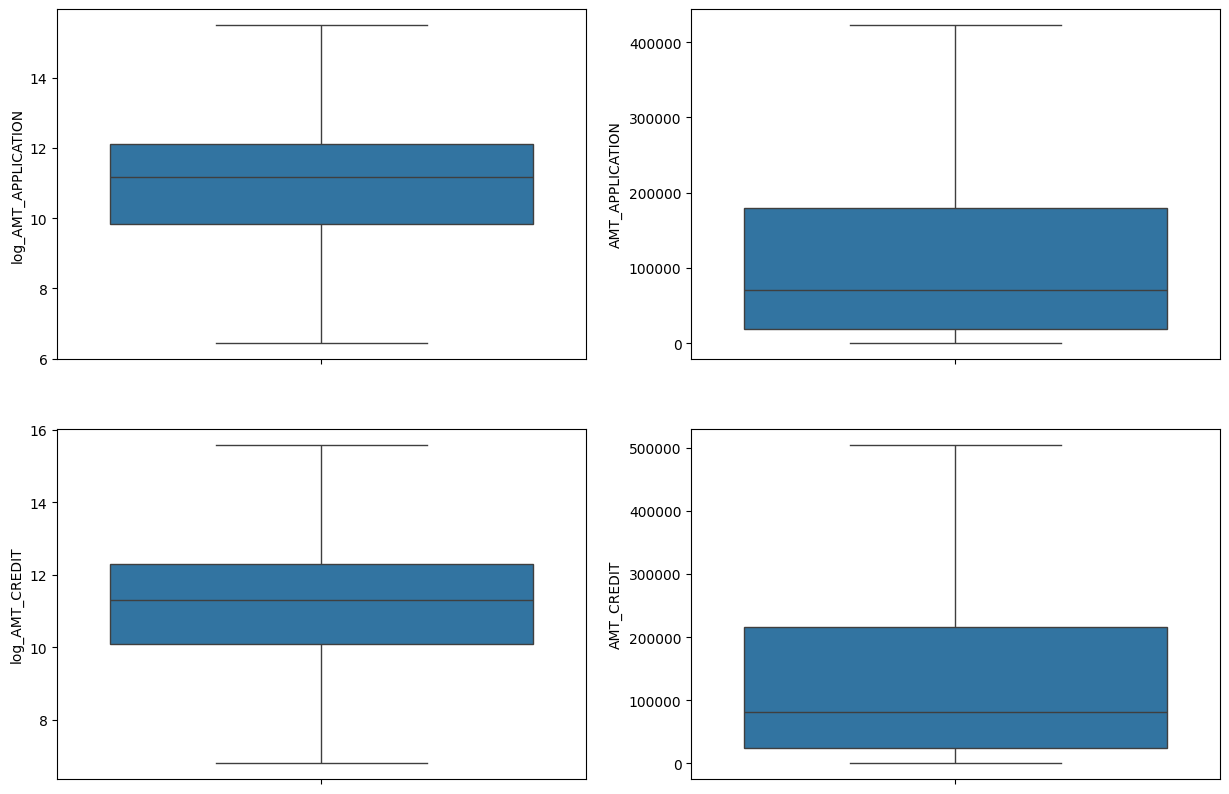

In [99]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(p_data_copy_1['log_AMT_APPLICATION'])
plt.subplot(2,2,2)
sns.boxplot(p_data_copy_1['AMT_APPLICATION'])
plt.subplot(2,2,3)
sns.boxplot(p_data_copy_1['log_AMT_CREDIT'])
plt.subplot(2,2,4)
sns.boxplot(p_data_copy_1['AMT_CREDIT'])
plt.show()

In [100]:
p_data_new['log_AMT_APPLICATION'] = p_data_copy_1['log_AMT_APPLICATION']
p_data_new['log_AMT_CREDIT'] = p_data_copy_1['log_AMT_CREDIT']

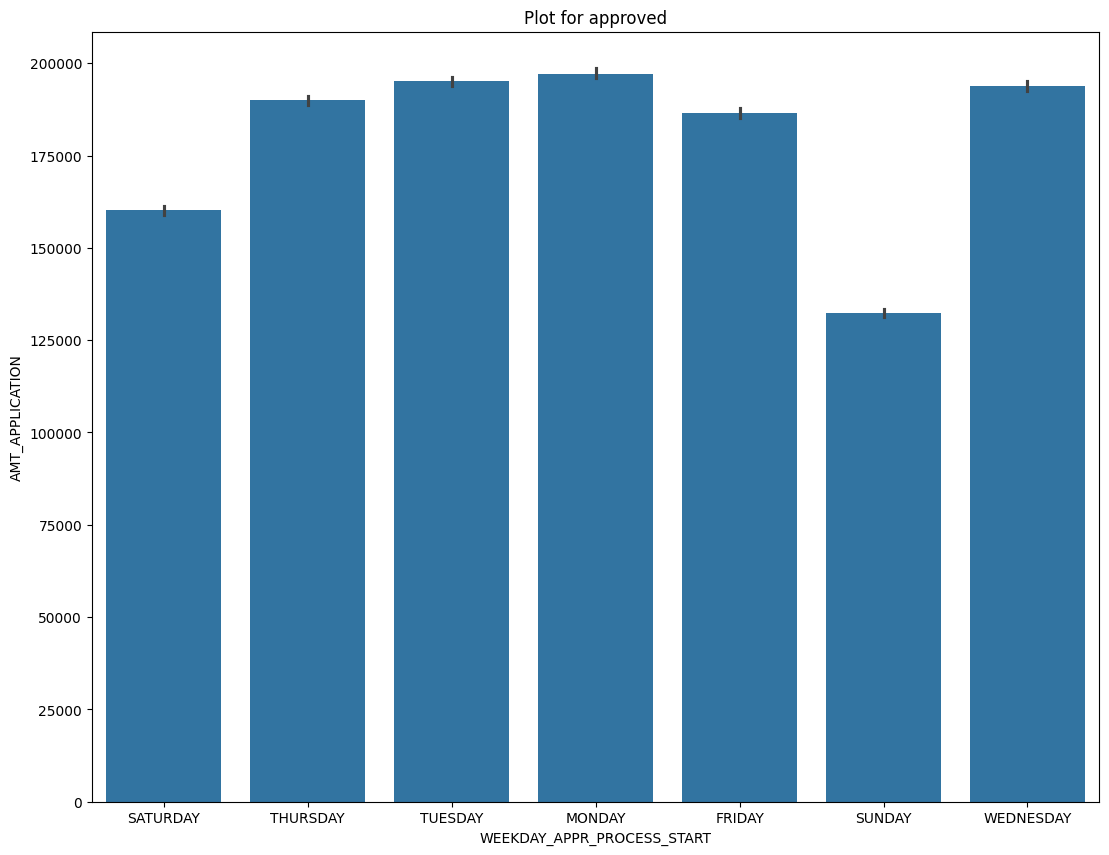

In [101]:
plt.figure(figsize=(13,10))
sns.barplot(x="WEEKDAY_APPR_PROCESS_START", y="AMT_APPLICATION",data=approved)
plt.title("Plot for approved")
plt.show()

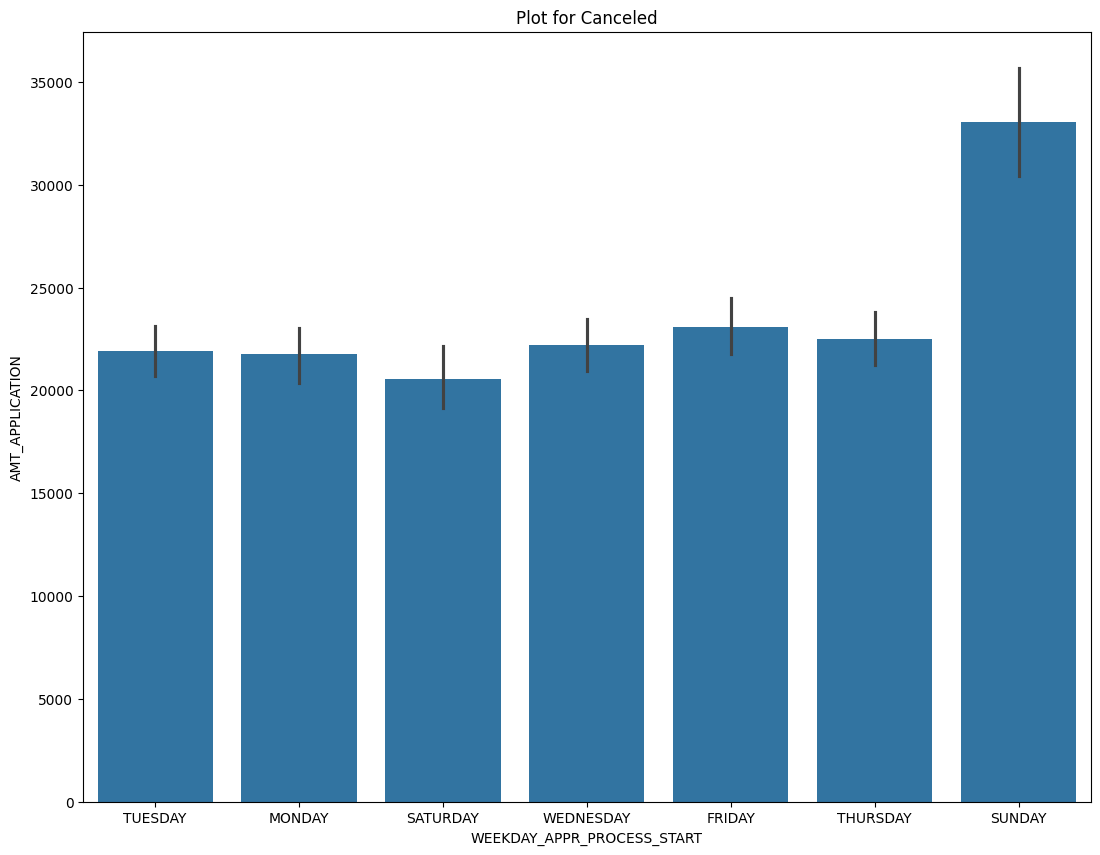

In [102]:
plt.figure(figsize=(13,10))
sns.barplot(x="WEEKDAY_APPR_PROCESS_START", y="AMT_APPLICATION",data=cancelled)
plt.title("Plot for Canceled")
plt.show()

In [103]:
mapping = {
    'Very low price': 1,
    'Low price': 2,
    'Medium price': 3,
    'High price': 4,
    'Very High price': 5
}
approved['AMT_GOODS_PRICE'] = approved['AMT_GOODS_PRICE'].map(mapping)
refused['AMT_GOODS_PRICE'] = refused['AMT_GOODS_PRICE'].map(mapping)
cancelled['AMT_GOODS_PRICE'] = cancelled['AMT_GOODS_PRICE'].map(mapping)
unused['AMT_GOODS_PRICE'] = unused['AMT_GOODS_PRICE'].map(mapping)

In [ ]:
# correlation matrices for selected columns

corr_approved=approved[['DAYS_DECISION','AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','CNT_PAYMENT']]
corr_refused=refused[['DAYS_DECISION','AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','CNT_PAYMENT']]
corr_cancelled=cancelled[['DAYS_DECISION','AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','CNT_PAYMENT']]
corr_unused=unused[['DAYS_DECISION','AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','CNT_PAYMENT']]

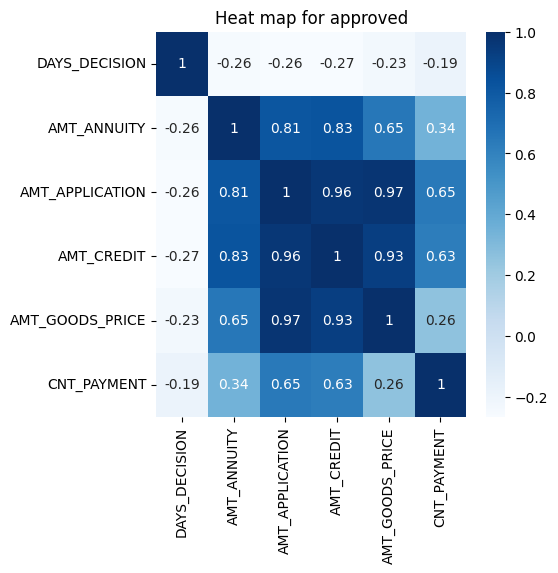

In [105]:
plt.figure(figsize=[5,5])
sns.heatmap(corr_approved.corr(),annot=True,cmap="Blues")
plt.title("Heat map for approved")
plt.show()

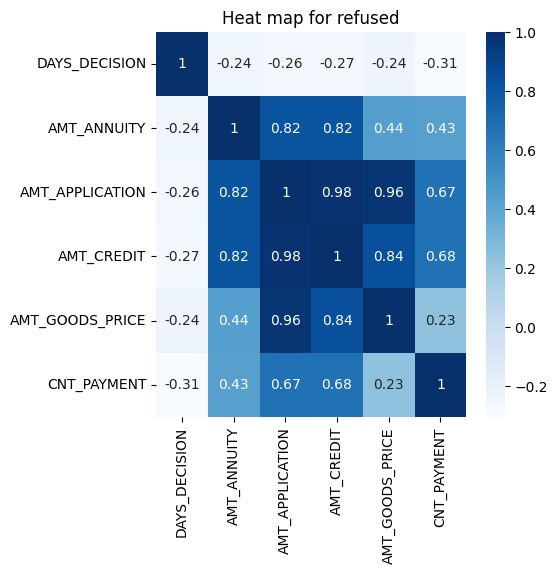

In [106]:
plt.figure(figsize=[5,5])
sns.heatmap(corr_refused.corr(),annot=True,cmap="Blues")
plt.title("Heat map for refused")
plt.show()

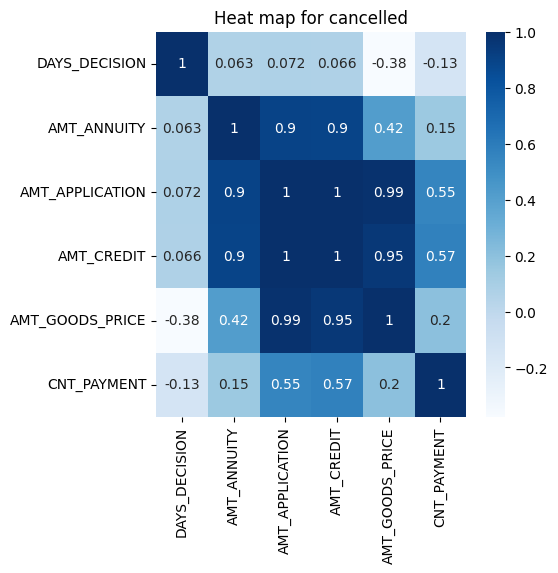

In [107]:
plt.figure(figsize=[5,5])
sns.heatmap(corr_cancelled.corr(),annot=True,cmap="Blues")
plt.title("Heat map for cancelled")
plt.show()

In [108]:
merge_df=df_new.merge(p_data_new,on=["SK_ID_CURR"],how='inner')
merge_df.shape

(1413701, 114)

In [109]:
for col in merge_df.columns:
    if col.startswith("FLAG"):
        merge_df.drop(columns=col,axis=1,inplace=True)

In [110]:
res1=pd.pivot_table(data=merge_df,index=["NAME_INCOME_TYPE","NAME_CLIENT_TYPE"],columns=["NAME_CONTRACT_STATUS"],values="TARGET",aggfunc="mean")

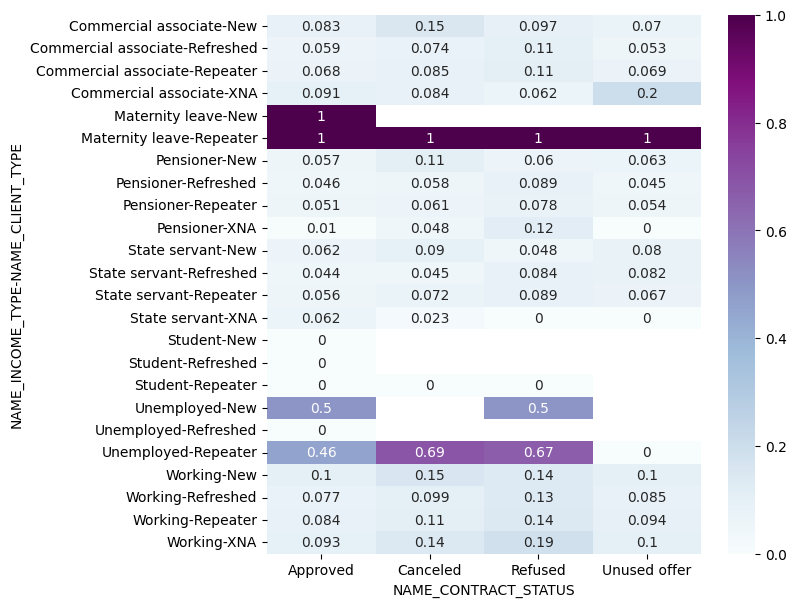

In [111]:
plt.figure(figsize=[7,7])
sns.heatmap(res1,annot=True,cmap="BuPu")
plt.show()

In [112]:
res2=pd.pivot_table(data=merge_df,index=["CODE_GENDER","NAME_SELLER_INDUSTRY"],columns=["TARGET"],values="AMT_GOODS_PRICE_x",aggfunc="sum")

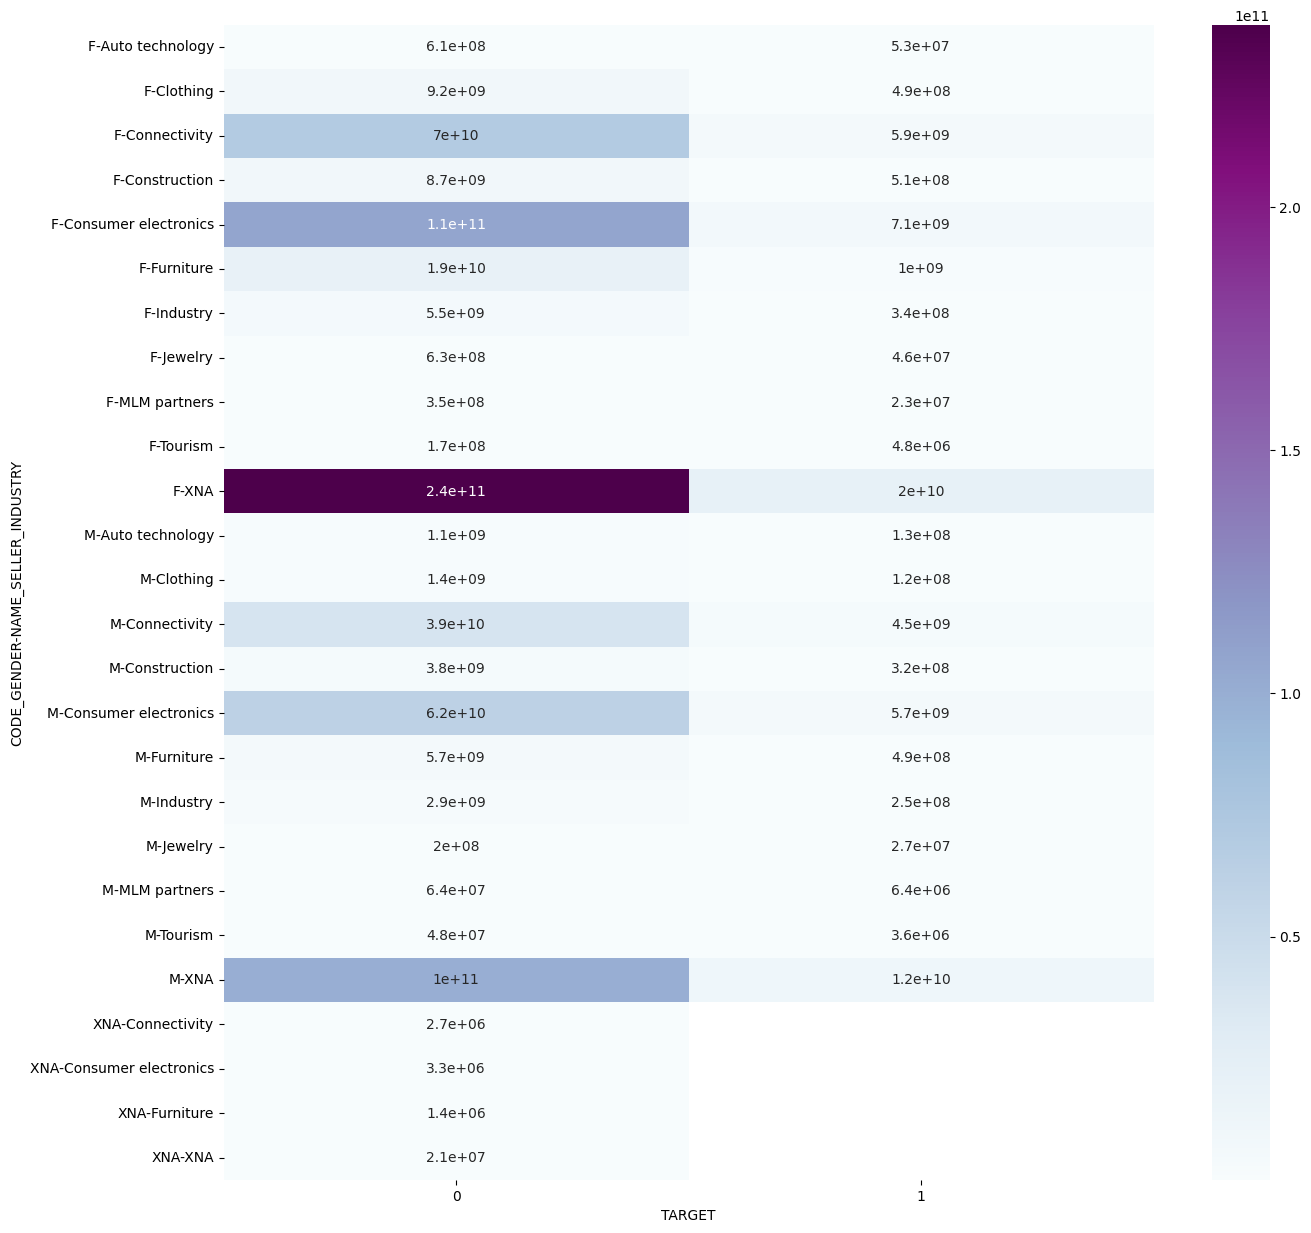

In [113]:
plt.figure(figsize=[15,15])
sns.heatmap(res2,annot=True,cmap="BuPu")
plt.show()

In [115]:
merge_df.columns.to_list()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE_x',
 'CODE_GENDER',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT_x',
 'AMT_ANNUITY_x',
 'AMT_GOODS_PRICE_x',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START_x',
 'HOUR_APPR_PROCESS_START_x',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WE

In [ ]:
imm_lst = ['DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL',
 'AMT_CREDIT_Category_y',
 'log_AMT_ANNUITY',
 'log_AMT_APPLICATION',
 'log_AMT_CREDIT']

In [117]:
for x in imm_lst:
    merge_df[str(x)] = pd.to_numeric(merge_df[str(x)],errors='coerce')

In [118]:
merge_df=merge_df.drop(columns=['AMT_CREDIT_Category_y'],axis=1)

In [120]:
# correlation between Contract status column and other columns
# It would take a lot of time to run this code. 

import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

# Function for Cramér's V (Categorical-Categorical)
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k, r) - 1)))

# Function for Correlation Ratio (Categorical-Numerical)
def correlation_ratio(categories, measurements):
    categories = np.array(categories)
    measurements = np.array(measurements)

    # Check if measurements are numeric, convert if necessary
    measurements = pd.to_numeric(measurements, errors='coerce')
    
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat) + 1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)

    for i in range(0, cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.nanmean(cat_measures)  # Handle NaN values with nanmean

    y_total_avg = np.nansum(np.multiply(y_avg_array, n_array)) / np.nansum(n_array)
    numerator = np.nansum(np.multiply(n_array, np.power(np.subtract(y_avg_array, y_total_avg), 2)))
    denominator = np.nansum(np.power(np.subtract(measurements, y_total_avg), 2))

    if denominator == 0:
        return 0.0
    else:
        return np.sqrt(numerator / denominator)

# Loop through the columns and calculate the association
for col in merge_df.columns:
    if merge_df[col].dtype == 'object' or merge_df[col].nunique() < 10:
        # Categorical column - compare using Cramér's V
        confusion_matrix = pd.crosstab(merge_df[col], merge_df['NAME_CONTRACT_STATUS'])
        eta = cramers_v(confusion_matrix.values)
    else:
        # Numerical column - ensure numeric conversion and compare using correlation ratio
        eta = correlation_ratio(merge_df[col], merge_df['NAME_CONTRACT_STATUS'])
    
    print(f"col: {col}, eta: {eta}")


col: SK_ID_CURR, eta: 0.0
col: TARGET, eta: 0.058467939912836275
col: NAME_CONTRACT_TYPE_x, eta: 0.018934656962600233
col: CODE_GENDER, eta: 0.015580519545945488
col: CNT_CHILDREN, eta: 0.0
col: AMT_INCOME_TOTAL, eta: 0.0
col: AMT_CREDIT_x, eta: 0.0
col: AMT_ANNUITY_x, eta: 0.0
col: AMT_GOODS_PRICE_x, eta: 0.0
col: NAME_TYPE_SUITE, eta: 0.014247324680249172
col: NAME_INCOME_TYPE, eta: 0.03157286068696949
col: NAME_EDUCATION_TYPE, eta: 0.015747332467916753
col: NAME_FAMILY_STATUS, eta: 0.02078907924261188
col: NAME_HOUSING_TYPE, eta: 0.01798990588616179
col: REGION_POPULATION_RELATIVE, eta: 0.0
col: DAYS_BIRTH, eta: 0.0
col: DAYS_EMPLOYED, eta: 0.0
col: DAYS_REGISTRATION, eta: 0.0
col: DAYS_ID_PUBLISH, eta: 0.0
col: OCCUPATION_TYPE, eta: 0.025653889402041233
col: CNT_FAM_MEMBERS, eta: nan
col: REGION_RATING_CLIENT, eta: 0.010373934810060229
col: REGION_RATING_CLIENT_W_CITY, eta: 0.00894037590343004
col: WEEKDAY_APPR_PROCESS_START_x, eta: 0.005347892361333744
col: HOUR_APPR_PROCESS_START

In [ ]:
# correlation between target column and other columns
# takes a lot of time to run the code

def correlation_ratio(categories, measurements):
    categories = np.array(categories)
    measurements = np.array(measurements)
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat) + 1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)

    for i in range(0, cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.mean(cat_measures)

    y_total_avg = np.sum(np.multiply(y_avg_array, n_array)) / np.sum(n_array)
    numerator = np.sum(np.multiply(n_array, np.power(np.subtract(y_avg_array, y_total_avg), 2)))
    denominator = np.sum(np.power(np.subtract(measurements, y_total_avg), 2))

    if numerator == 0:
        return 0.0
    else:
        return np.sqrt(numerator / denominator)

# Example usage:
for col in merge_df:
    eta = correlation_ratio(merge_df[str(col)], merge_df['TARGET'])
    print(f"col:{col},eta:{eta}")

col:SK_ID_CURR,eta:1.0000000000000002
col:TARGET,eta:1.0000000000000002
col:NAME_CONTRACT_TYPE_x,eta:0.03234185076801836
col:CODE_GENDER,eta:0.052901218338506174
col:CNT_CHILDREN,eta:0.02492964599901421
col:AMT_INCOME_TOTAL,eta:0.08607667037636053
col:AMT_CREDIT_x,eta:0.2105384147018374
col:AMT_ANNUITY_x,eta:0.3024215072766915
col:AMT_GOODS_PRICE_x,eta:0.11490165930196027
col:NAME_TYPE_SUITE,eta:0.008546493302056011
col:NAME_INCOME_TYPE,eta:0.06668107715483036
col:NAME_EDUCATION_TYPE,eta:0.050132337973940705
col:NAME_FAMILY_STATUS,eta:0.03647562425166126
col:NAME_HOUSING_TYPE,eta:0.03637086057423499
col:REGION_POPULATION_RELATIVE,eta:0.07644674818891051
col:DAYS_BIRTH,eta:0.3294606918385736
col:DAYS_EMPLOYED,eta:0.24789451058844086
col:DAYS_REGISTRATION,eta:0.29238106445574236
col:DAYS_ID_PUBLISH,eta:0.20134841948863896
col:OCCUPATION_TYPE,eta:0.0785489671099393
col:CNT_FAM_MEMBERS,eta:0.0
col:REGION_RATING_CLIENT,eta:0.056983393661315294
col:REGION_RATING_CLIENT_W_CITY,eta:0.059895876

In [ ]:
# Convert 'AGE' column to object type to allow modification
merge_df['AGE'] = merge_df['AGE'].astype('object')

# Map categorical values to numeric values using .loc
merge_df.loc[merge_df['AGE'] == "below 25", 'AGE'] = 0
merge_df.loc[merge_df['AGE'] == "25-45", 'AGE'] = 1
merge_df.loc[merge_df['AGE'] == "45-65", 'AGE'] = 2
merge_df.loc[merge_df['AGE'] == "65-85", 'AGE'] = 3

# View the updated AGE column
merge_df['AGE'].value_counts()


AGE
1    705583
2    624641
3     43659
0     39818
Name: count, dtype: int64

# Below is the list of columns with high correlation with TARGET and NAME_CONTRACT_STATUS columns. 

EDA end here. 

In [ ]:
# most correlated features from above analysis

important_features = [
    'NAME_CONTRACT_STATUS',
    'CODE_REJECT_REASON',
    'NAME_PORTFOLIO',
    'PRODUCT_COMBINATION',
    'NAME_YIELD_GROUP',
    'NAME_GOODS_CATEGORY',
    'CHANNEL_TYPE',
    'NAME_PAYMENT_TYPE',
    'NAME_CASH_LOAN_PURPOSE',
    'NAME_CONTRACT_TYPE_y',
    'NFLAG_LAST_APPL_IN_DAY',
    'AMT_REQ_CREDIT_BUREAU_YEAR',
    'NAME_INCOME_TYPE',
    'AGE',
    'AMT_GOODS_PRICE_y',
    'WEEKDAY_APPR_PROCESS_START_y',
    'OCCUPATION_TYPE',
    'NAME_FAMILY_STATUS',
    'REG_CITY_NOT_WORK_CITY',
    'AMT_CREDIT_Category_x',
    'NAME_TYPE_SUITE',
    'CODE_GENDER',
    'NAME_EDUCATION_TYPE',
    'REG_CITY_NOT_LIVE_CITY'
]
imp_feature_df = merge_df[important_features]
imp_cat_features = [feature for feature in important_features if merge_df[feature].dtype == 'object' or merge_df[feature].dtype.name == 'category']
X_encoded = pd.get_dummies(imp_feature_df, columns=imp_cat_features)

In [123]:
imp_cat_features

['NAME_CONTRACT_STATUS',
 'CODE_REJECT_REASON',
 'NAME_PORTFOLIO',
 'PRODUCT_COMBINATION',
 'NAME_YIELD_GROUP',
 'NAME_GOODS_CATEGORY',
 'CHANNEL_TYPE',
 'NAME_PAYMENT_TYPE',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_TYPE_y',
 'NAME_INCOME_TYPE',
 'AGE',
 'AMT_GOODS_PRICE_y',
 'WEEKDAY_APPR_PROCESS_START_y',
 'OCCUPATION_TYPE',
 'NAME_FAMILY_STATUS',
 'AMT_CREDIT_Category_x',
 'NAME_TYPE_SUITE',
 'CODE_GENDER',
 'NAME_EDUCATION_TYPE']

In [124]:
imp_df_copy = imp_feature_df.copy()
imp_df_copy=imp_df_copy.drop(columns=['NAME_CONTRACT_STATUS','CODE_REJECT_REASON','NAME_PORTFOLIO','PRODUCT_COMBINATION','NAME_YIELD_GROUP','NAME_GOODS_CATEGORY','CHANNEL_TYPE','NAME_PAYMENT_TYPE','NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_TYPE_y','NAME_INCOME_TYPE','AGE','AMT_GOODS_PRICE_y','WEEKDAY_APPR_PROCESS_START_y','OCCUPATION_TYPE','NAME_FAMILY_STATUS','AMT_CREDIT_Category_x','NAME_TYPE_SUITE','CODE_GENDER','NAME_EDUCATION_TYPE'])
final_df = pd.concat([imp_df_copy, X_encoded], axis=1)
final_df

NFLAG_LAST_APPL_IN_DAY  AMT_REQ_CREDIT_BUREAU_YEAR  \
0                             1                         1.0   
1                             1                         0.0   
2                             1                         0.0   
3                             1                         0.0   
4                             1                         0.0   
...                         ...                         ...   
1413696                       1                         1.0   
1413697                       1                         1.0   
1413698                       1                         1.0   
1413699                       1                         1.0   
1413700                       1                         1.0   

         REG_CITY_NOT_WORK_CITY  REG_CITY_NOT_LIVE_CITY  \
0                             0                       0   
1                             0                       0   
2                             0                       0   
3                             0                       0   
4                             0                       0   
...                         ...                     ...   
1413696                       1                       0   
1413697                       1                       0   
1413698                       1                       0   
1413699                       1                       0   
1413700                       1                       0   

         NFLAG_LAST_APPL_IN_DAY  AMT_REQ_CREDIT_BUREAU_YEAR  \
0                             1                         1.0   
1                             1                         0.0   
2                             1                         0.0   
3                             1                         0.0   
4                             1                         0.0   
...                         ...                         ...   
1413696                       1                         1.0   
1413697                       1                         1.0   
1413698                       1                         1.0   
1413699                       1                         1.0   
1413700                       1                         1.0   

         REG_CITY_NOT_WORK_CITY  REG_CITY_NOT_LIVE_CITY  \
0                             0                       0   
1                             0                       0   
2                             0                       0   
3                             0                       0   
4                             0                       0   
...                         ...                     ...   
1413696                       1                       0   
1413697                       1                       0   
1413698                       1                       0   
1413699                       1                       0   
1413700                       1                       0   

         NAME_CONTRACT_STATUS_Approved  NAME_CONTRACT_STATUS_Canceled  \
0                                 True                          False   
1                                 True                          False   
2                                 True                          False   
3                                 True                          False   
4                                 True                          False   
...                                ...                            ...   
1413696                           True                          False   
1413697                          False                          False   
1413698                          False                          False   
1413699                           True                          False   
1413700                           True                          False   

         NAME_CONTRACT_STATUS_Refused  NAME_CONTRACT_STATUS_Unused offer  \
0                               False                              False   
1                               False           

In [126]:
# calculating variances between columns 

import pandas as pd
import numpy as np

def calculate_vif(X):
    vif = pd.DataFrame()
    vif['Feature'] = X.columns
    vif['VIF'] = [1 / (1 - r2_score(X.drop(col, axis=1), X[col])) for col in X.columns]
    return vif

def r2_score(X, y):
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    model.fit(X, y)
    return model.score(X, y)

vif_df = calculate_vif(final_df)
print(vif_df.sort_values('VIF', ascending=False))


KeyboardInterrupt: 

In [127]:
y=merge_df['NAME_CONTRACT_STATUS']

In [128]:
# final data frame to observe from full dataframe
final_df=final_df.drop(columns=['NAME_CONTRACT_STATUS_Approved','NAME_CONTRACT_STATUS_Canceled','NAME_CONTRACT_STATUS_Refused','NAME_CONTRACT_STATUS_Unused offer'])

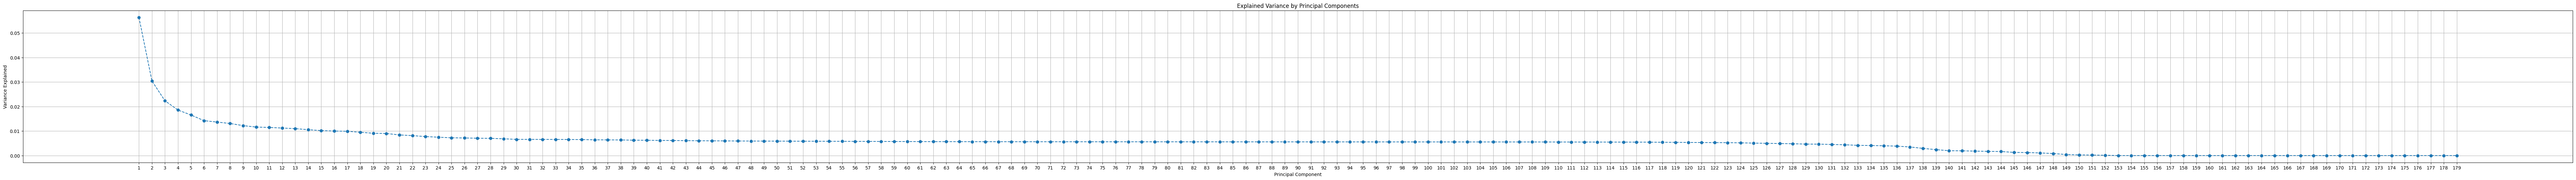

In [129]:
# performing PCA on these columns to make the variance 1 

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
data_scaled = scaler.fit_transform(final_df)
pca = PCA()
pca.fit(data_scaled)
explained_variance = pca.explained_variance_ratio_

# Plot the explained variance
plt.figure(figsize=(100, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid()
plt.show()

In [130]:
# knee of the curve shows 21 which is the ideal components for analysis
n_components = 21 

pca = PCA(n_components=n_components)
data_pca = pca.fit_transform(data_scaled)

pca_df = pd.DataFrame(data_pca, columns=[f'PC{i+1}' for i in range(n_components)])
pca_df

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0       -2.931219  1.264372  0.021997 -0.307032  2.981481 -1.075210 -1.791553   
1        2.874546 -1.826796 -0.655416  0.522990  0.823284  3.487616  1.054762   
2       -3.539205 -0.885146 -2.672784  0.668284  3.600402  3.070854  1.952470   
3       -3.878832 -0.861478 -1.666998  0.153742  1.381426  2.772108 -0.409835   
4       -3.919660 -0.156553  0.283955 -0.779317 -1.154143 -1.322616 -1.505144   
...           ...       ...       ...       ...       ...       ...       ...   
1413696  2.267321 -2.537589  1.717142  0.587465  1.293122  0.506156  0.636028   
1413697  0.782062  5.016617  0.316559  3.681006 -0.914829  0.810660  1.040977   
1413698  2.236691 -2.806212  3.041355  3.593404 -0.007576  2.297939  1.604874   
1413699  1.985220 -2.541660  1.658439  1.504435  0.838377  1.042482  1.408245   
1413700 -3.773665  0.237255  1.146681 -0.548845 -1.256652  0.799923  1.004072   

              PC8       PC9      PC10      PC11      PC12      PC13      PC14  \
0        3.413431  0.372707  4.271091  1.533916  1.136783 -1.668740 -0.526822   
1        0.166438  0.283955 -3.914137 -0.165306 -0.970079 -0.585244  0.323577   
2        3.518408 -0.721643 -2.953761  0.384608  0.088628 -0.189799 -1.792349   
3       -2.163718 -2.062520 -3.256866 -0.395301  0.293388  0.335162 -2.090790   
4        0.434428 -0.711353  1.693188  1.711726  0.398079  0.278823  0.592446   
...           ...       ...       ...       ...       ...       ...       ...   
1413696 -0.491426 -2.422108 -2.378602  1.839595  0.266941  0.346991  0.179082   
1413697 -1.188999  0.408507 -1.307300  0.857614 -1.622440 -0.378917  0.086090   
1413698 -0.417085  4.336000  0.264262 -0.575563 -0.963044 -1.407402 -1.807846   
1413699 -0.280190  0.941317 -2.173731  0.822452 -0.622244 -0.682266  2.191200   
1413700 -0.949012 -0.034703 -1.975138  1.165502 -0.600953 -0.326189  0.242812   

             PC15      PC16      PC17      PC18      PC19      PC20      PC21  
0       -3.178600  0.865303  2.008840  7.956978  1.521395 -0.047461 -1.319452  
1       -4.064376 -0.733599 -0.495384  0.467691  1.043554  0.950047  0.399353  
2       -1.137364 -0.145541 -1.694902 -1.219344 -1.162846  0.023133  0.315968  
3       -1.096398  0.003540 -0.989709 -0.001326  0.866747  1.548436 -0.317271  
4       -2.098411  1.209445  2.133064 -0.990707  0.315041 -0.501855 -0.481580  
...           ...       ...       ...       ...       ...       ...       ...  
1413696  0.372187  0.695079  2.004667 -0.468962 -0.569535 -0.433486 -0.884515  
1413697  0.525313  0.519212  1.545002 -0.110003  0.155640 -0.359558  1.105309  
1413698  0.921315 -0.030349  2.542925 -0.481224  0.871011  1.555126 -1.546622  
1413699 -1.813150 -0.325356  1.577553  0.081684  1.342523  0.241485  0.389897  
1413700  0.814950 -0.992486  0.647411  0.078037  0.433596 -0.786865  0.409631  

[1413701 rows x 21 columns]

In [131]:
import pandas as pd
import numpy as np

def calculate_vif(X):
    vif = pd.DataFrame()
    vif['Feature'] = X.columns
    vif['VIF'] = [1 / (1 - r2_score(X.drop(col, axis=1), X[col])) for col in X.columns]
    return vif

def r2_score(X, y):
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    model.fit(X, y)
    return model.score(X, y)

vif_df_f = calculate_vif(pca_df)
print(vif_df_f.sort_values('VIF', ascending=False))


   Feature  VIF
12    PC13  1.0
18    PC19  1.0
5      PC6  1.0
8      PC9  1.0
15    PC16  1.0
11    PC12  1.0
20    PC21  1.0
2      PC3  1.0
16    PC17  1.0
14    PC15  1.0
19    PC20  1.0
17    PC18  1.0
7      PC8  1.0
13    PC14  1.0
0      PC1  1.0
1      PC2  1.0
6      PC7  1.0
4      PC5  1.0
3      PC4  1.0
10    PC11  1.0
9     PC10  1.0


In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pca_df, y, test_size=0.33, random_state=42)

In [133]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

# Create a dictionary to map class labels to their corresponding weights
weight_dict = {i: class_weights[i] for i in range(len(class_weights))}
print("Class Weights:", weight_dict)

Class Weights: {0: 0.3988982045813666, 1: 1.3607173230970797, 2: 1.440208433434499, 3: 15.663100277814525}


In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

model1 = LogisticRegression(class_weight={'Approved': 0.3988982045813666, 'Canceled': 1.3607173230970797, 'Refused': 1.440208433434499, 'Unused offer': 15.663100277814525})
# model2=SVC()
model1.fit(X_train, y_train)
# model2.fit(X_train, y_train)

y_pred1 = model1.predict(X_test)
accuracy1= accuracy_score(y_test, y_pred1)
print(f"Accuracy1: {accuracy1:.2f}")
# y_pred2 = model2.predict(X_test)
# accuracy2= accuracy_score(y_test, y_pred2)
# print(f"Accuracy2: {accuracy2:.2f}")

Accuracy1: 0.98


In [135]:
from sklearn.model_selection import cross_val_score, KFold
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cross_val_results = cross_val_score(model1, pca_df, y, cv=kf)
print(cross_val_results)

[0.97998875 0.97907972 0.97987904 0.98012662 0.97991795]


In [136]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
conf_matrix1 = confusion_matrix(y_test, y_pred1)
class_report1 = classification_report(y_test, y_pred1)
# conf_matrix2 = confusion_matrix(y_test, y_pred2)
# class_report2 = classification_report(y_test, y_pred2)

In [137]:
print("For logistic regression:")
print(conf_matrix1)
print(class_report1)
# print("For SVM:")
# print(conf_matrix2)
# print(class_report2)

For logistic regression:
[[286519   1907   4046      5]
 [  1674  83416    329      0]
 [  1045    189  79493    246]
 [     0      0     27   7626]]
              precision    recall  f1-score   support

    Approved       0.99      0.98      0.99    292477
    Canceled       0.98      0.98      0.98     85419
     Refused       0.95      0.98      0.96     80973
Unused offer       0.97      1.00      0.98      7653

    accuracy                           0.98    466522
   macro avg       0.97      0.98      0.98    466522
weighted avg       0.98      0.98      0.98    466522



# Conclusion:

- A lot of good predications can be seen by a simple logistic regression from the **confusion matrix**
- There is high *recall* and *precision* score. 
- The ROC AUC curve is very impressive

In [138]:
y_pred_proba = model1.predict_proba(X_test)

In [139]:
mapping_new = {
    'Approved': 0,
    'Canceled': 1,
    'Refused': 2,
    'Unused offer': 3
}
y_true_binarized=y_test.replace(mapping_new)

In [140]:
roc_auc = roc_auc_score(y_true_binarized, y_pred_proba, average='macro', multi_class='ovr')

print(f'Macro ROC AUC: {roc_auc:.3f}')

Macro ROC AUC: 0.998
